## Importing the relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import probplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

## Loading the dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

## Understanding and examining the dataset

In [3]:
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [6]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Feature Engineering

### Data Cleansing

In [8]:
# The features "Delay_from_due_date" and "Num_Bank_Accounts" have negative values which is not possible.
df = df[df.Delay_from_due_date >= 0]
df = df[df.Num_Bank_Accounts >= 0]
df.shape

(99388, 28)

Skewness of Monthly_Inhand_Salary: 1.1297108607919126
Kurtosis of Monthly_Inhand_Salary: 0.6247005119590794


posx and posy should be finite values
posx and posy should be finite values


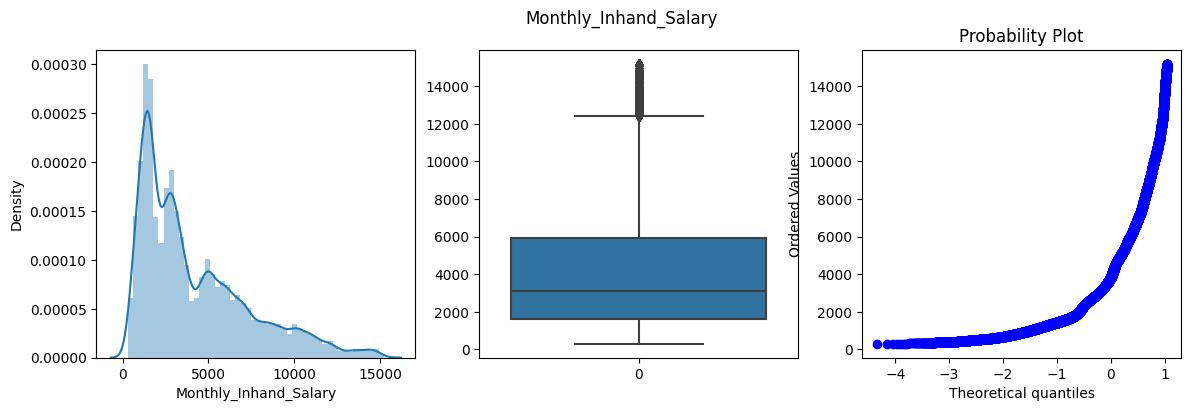

Skewness of Num_Bank_Accounts: 11.203154969101302
Kurtosis of Num_Bank_Accounts: 132.54303640103976


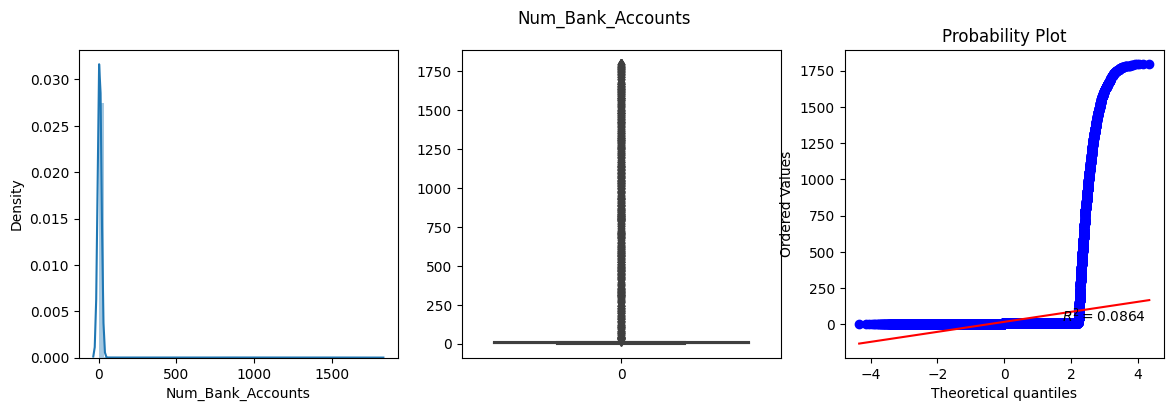

Skewness of Num_Credit_Card: 8.461639049589559
Kurtosis of Num_Credit_Card: 74.59934574253393


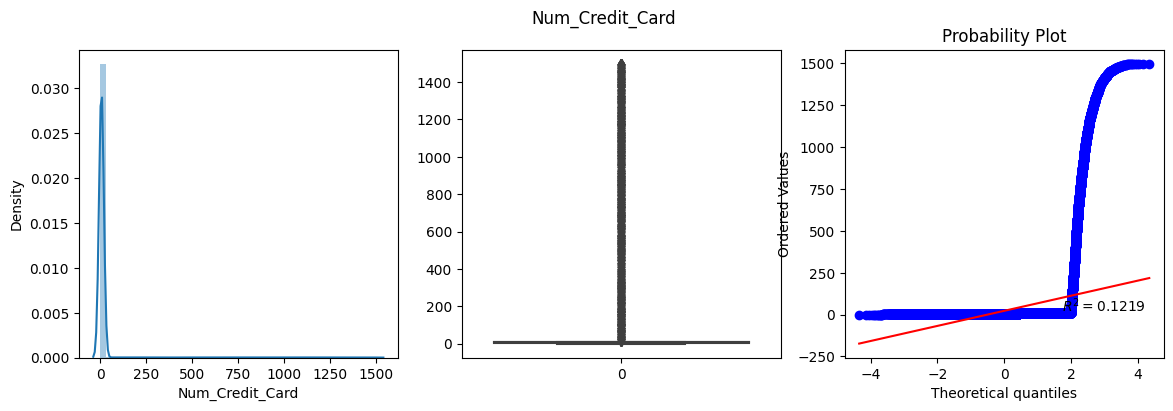

Skewness of Interest_Rate: 9.0069520313847
Kurtosis of Interest_Rate: 85.20332631801504


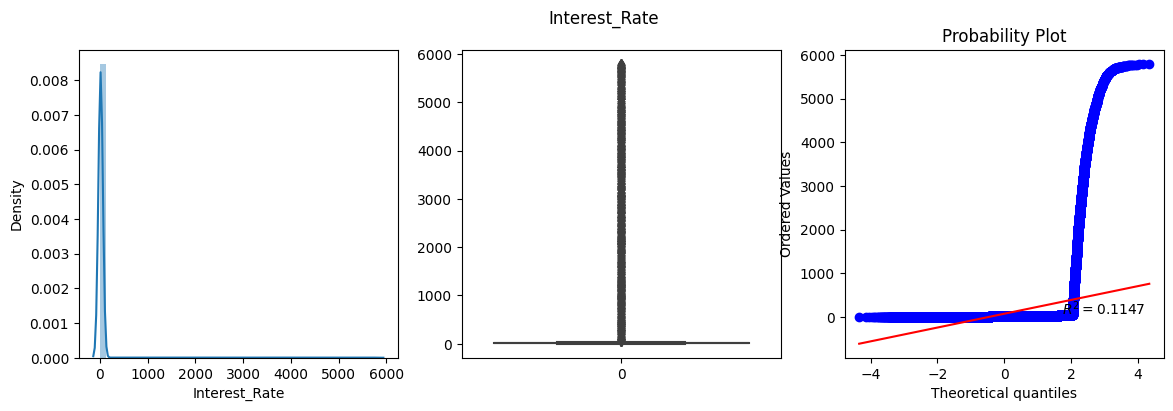

Skewness of Delay_from_due_date: 0.9802816782055186
Kurtosis of Delay_from_due_date: 0.3534575301144458


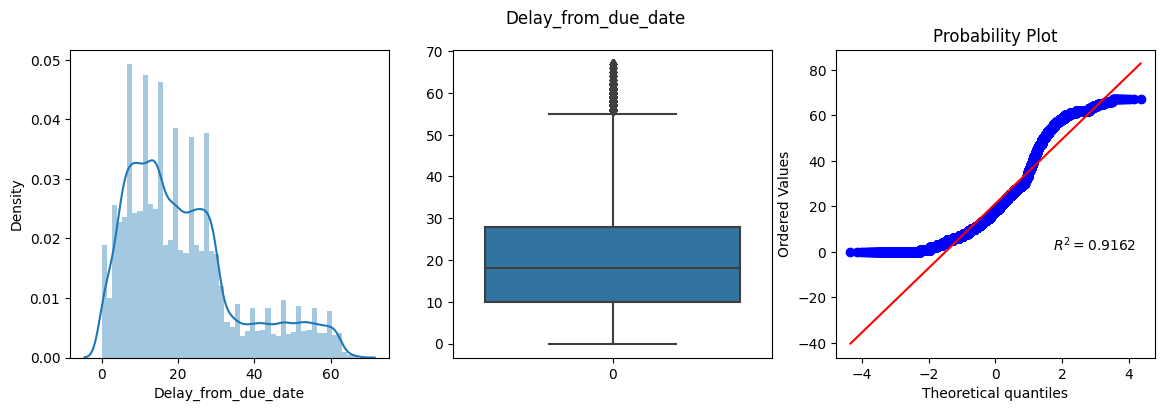

Skewness of Num_Credit_Inquiries: 9.795833655787508
Kurtosis of Num_Credit_Inquiries: 100.79510061365934


posx and posy should be finite values
posx and posy should be finite values


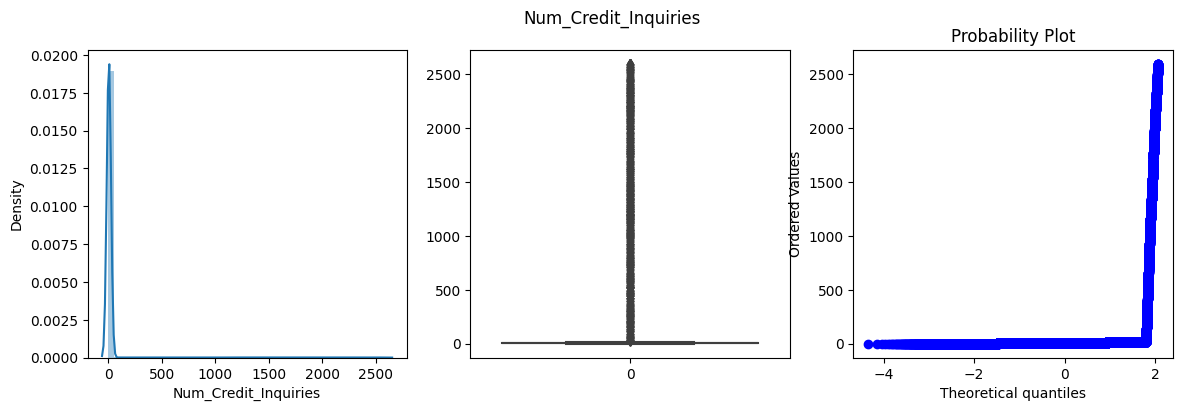

Skewness of Credit_Utilization_Ratio: 0.02824152097518821
Kurtosis of Credit_Utilization_Ratio: -0.9451947720878859


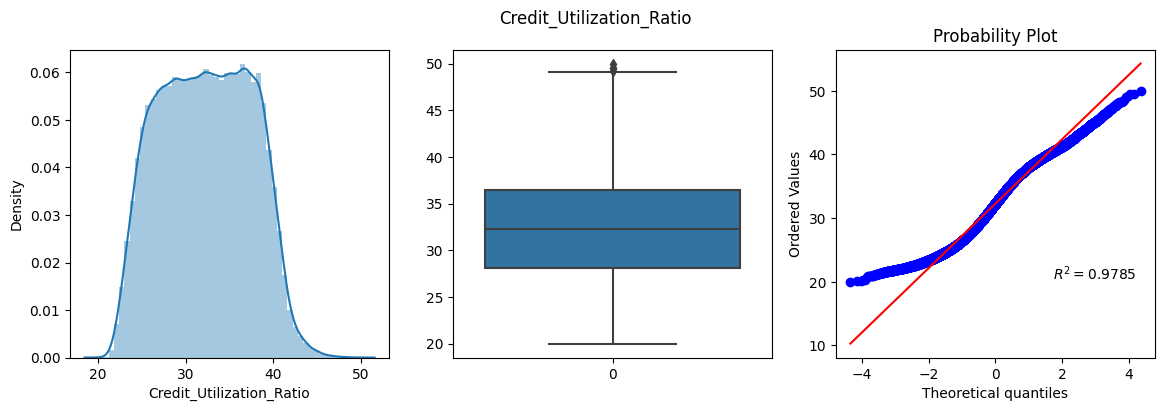

Skewness of Total_EMI_per_month: 7.09797645313809
Kurtosis of Total_EMI_per_month: 52.15856000355844


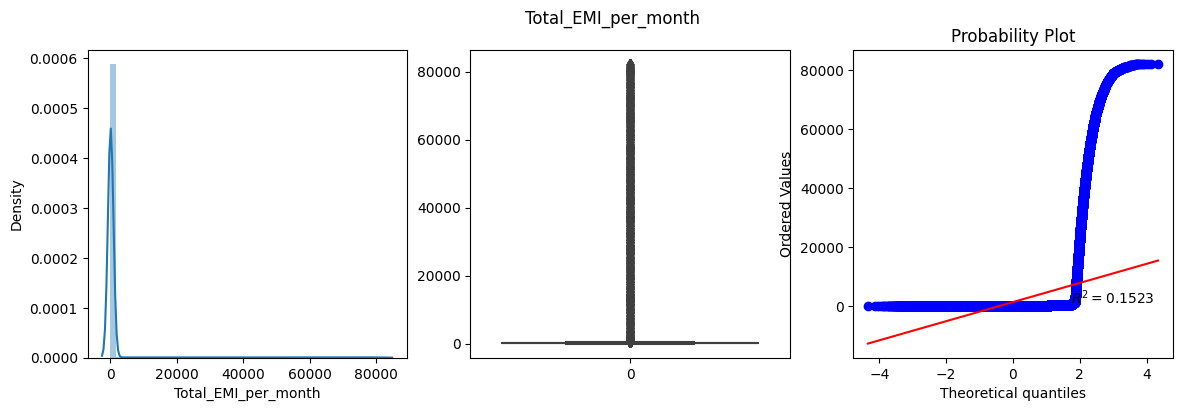

In [9]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show();

Most of the features have highly right-skewed distributions having several outliers so they need to be transformed appropriately in order to make them resemble the normal distribution to a larger extent.

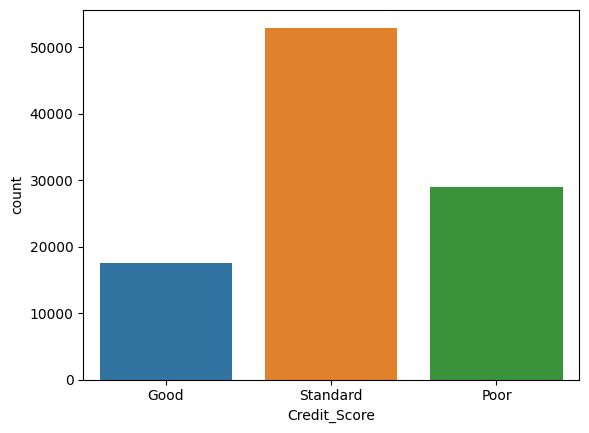

In [10]:
sns.countplot(x='Credit_Score',data=df);

The target label classes of the feature "Credit_Score" are quite imbalanced as clearly indicated by the above figure. Hence, they need to be balanced out later by using over-sampling techniques to prevent degradation of the performance of machine learning algorithms.

In [11]:
missing_value_cols = ['Name','Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age']


for col in missing_value_cols:
    if df[col].dtypes == object:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])
    else:
        imputer = IterativeImputer()
        df[col] = imputer.fit_transform(df[[col]])

In [12]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4455
Payment_Behaviour              0
Monthly_Balance             1192
Credit_Score                   0
dtype: int64

### Feature Transformation

In [13]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} Before Transform")
    plt.show()
    transformed_col = transformer.fit_transform(df[[col]])
    transformed_col = np.array(transformed_col).reshape(transformed_col.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(transformed_col)
    plt.subplot(132)
    sns.boxplot(transformed_col)
    plt.subplot(133)
    probplot(transformed_col,rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} After Transform")
    plt.show();

### Log Transform

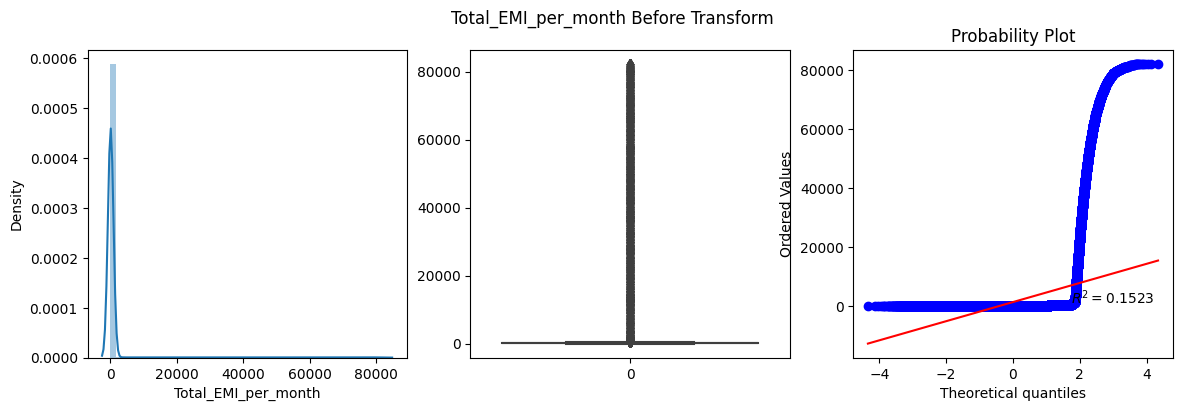

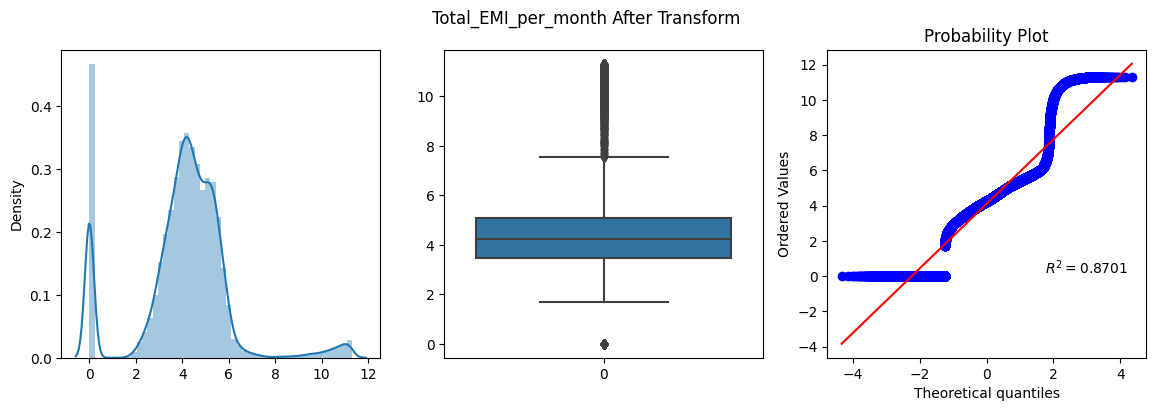

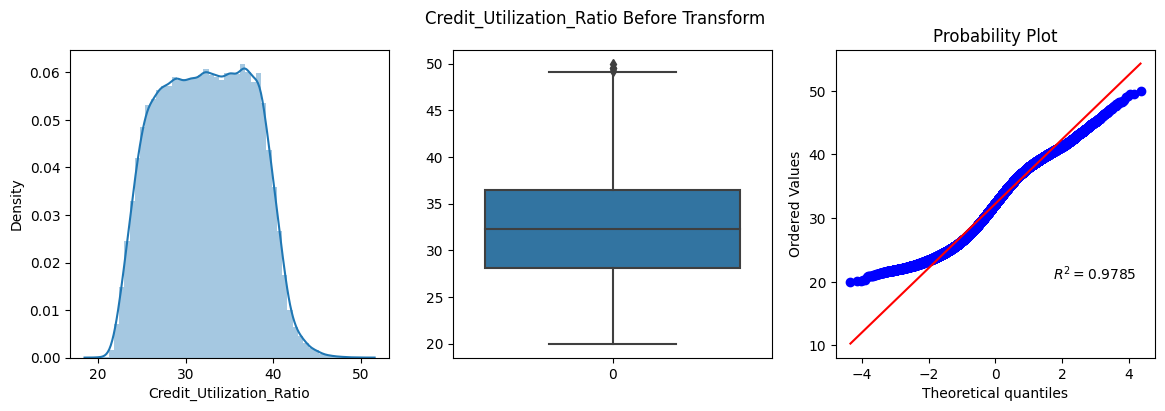

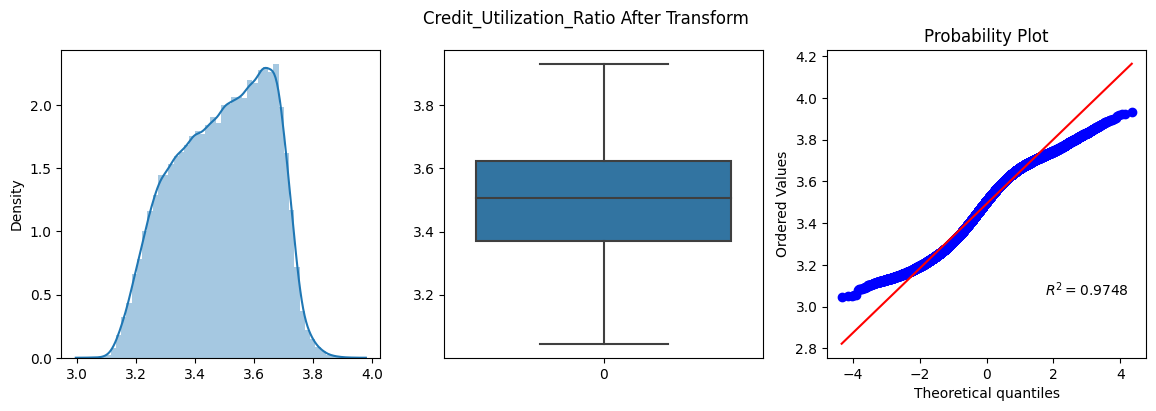

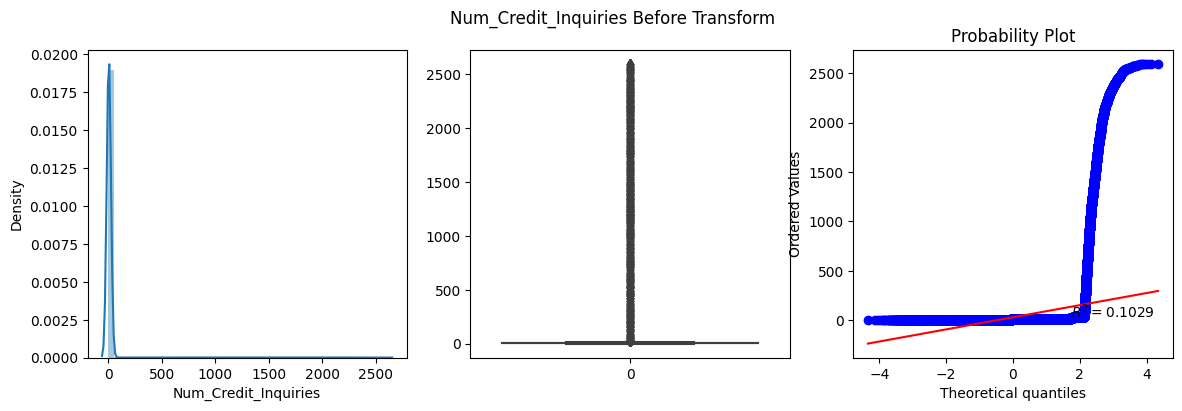

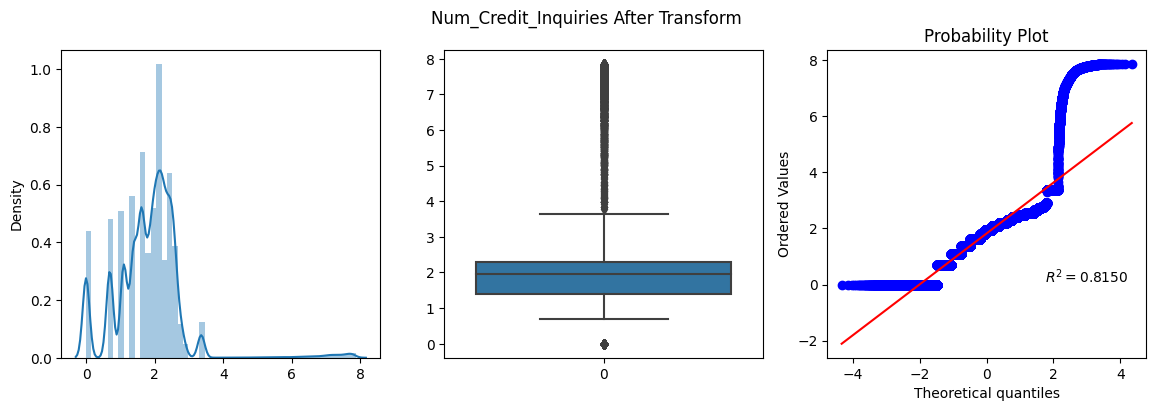

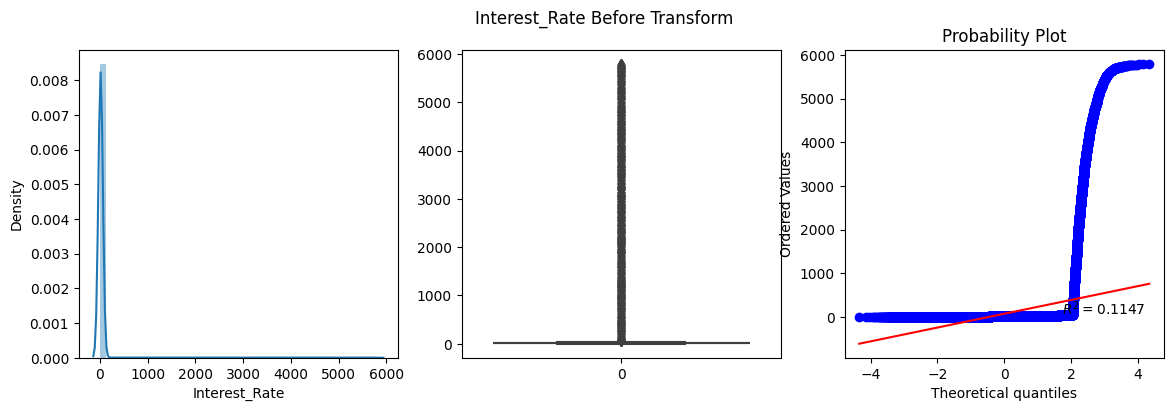

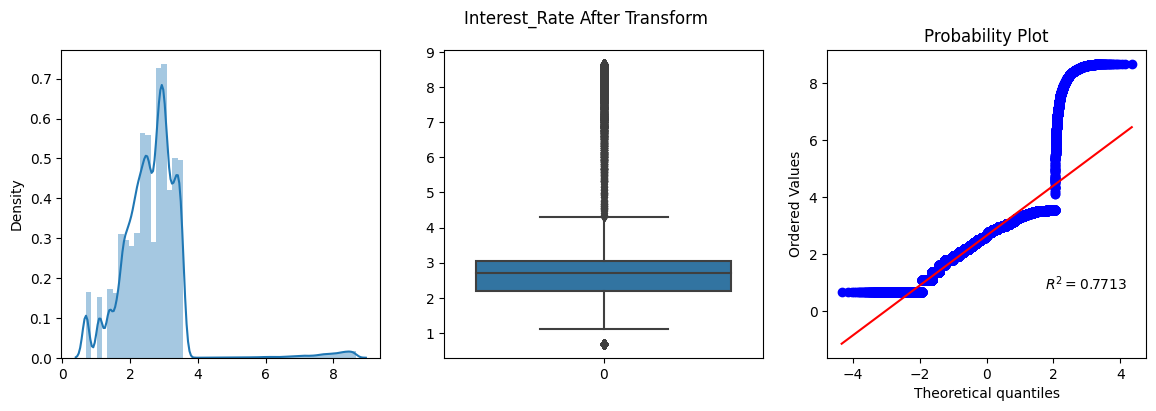

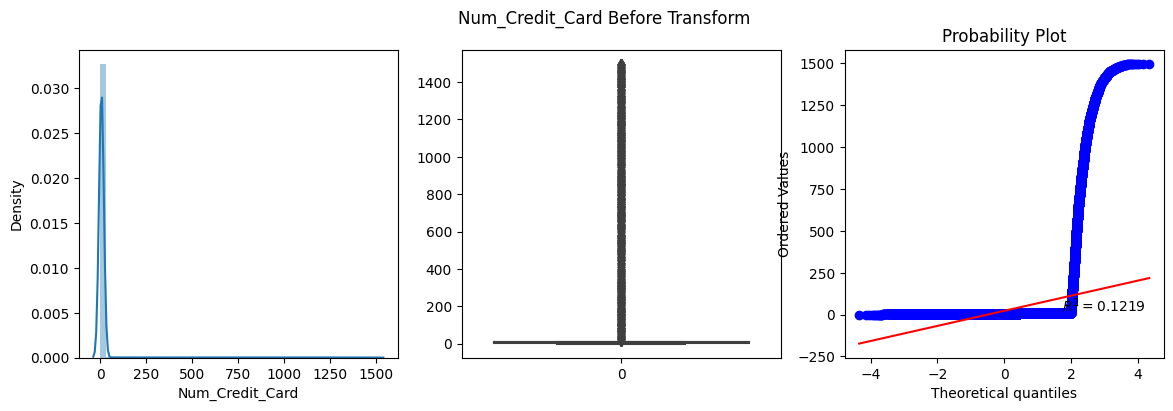

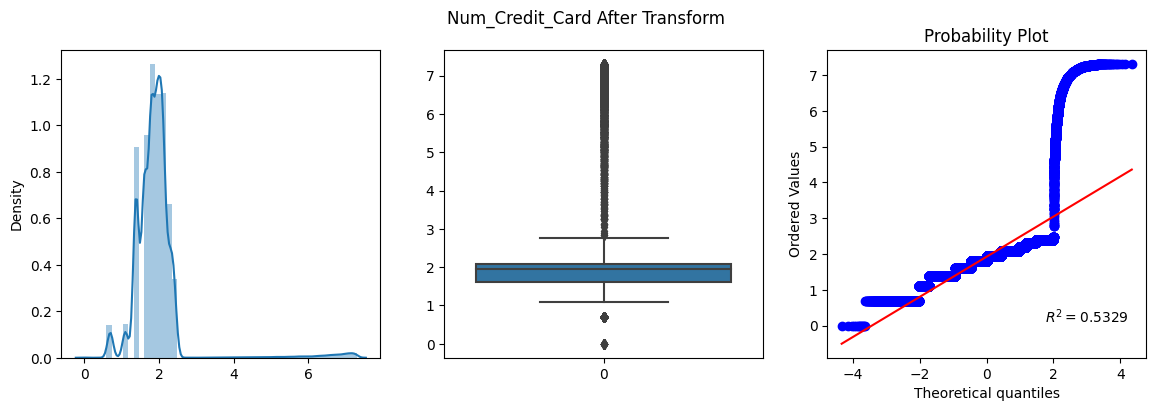

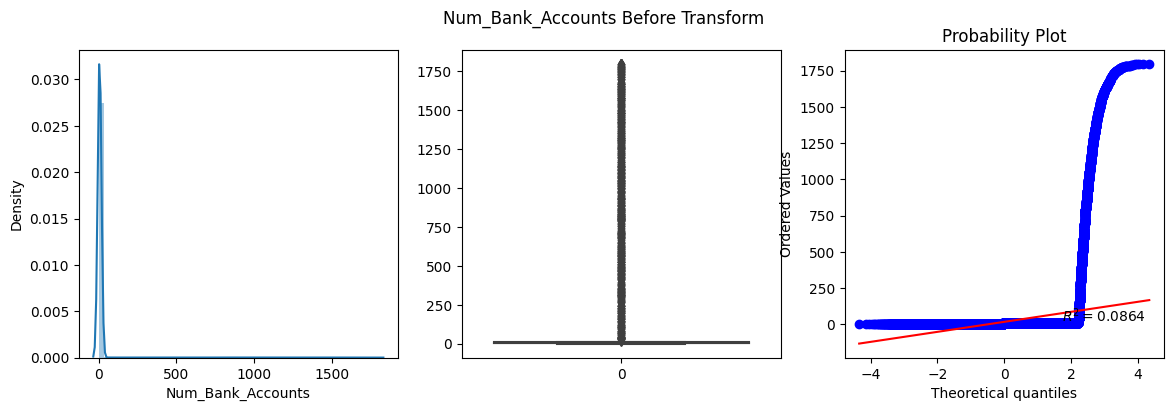

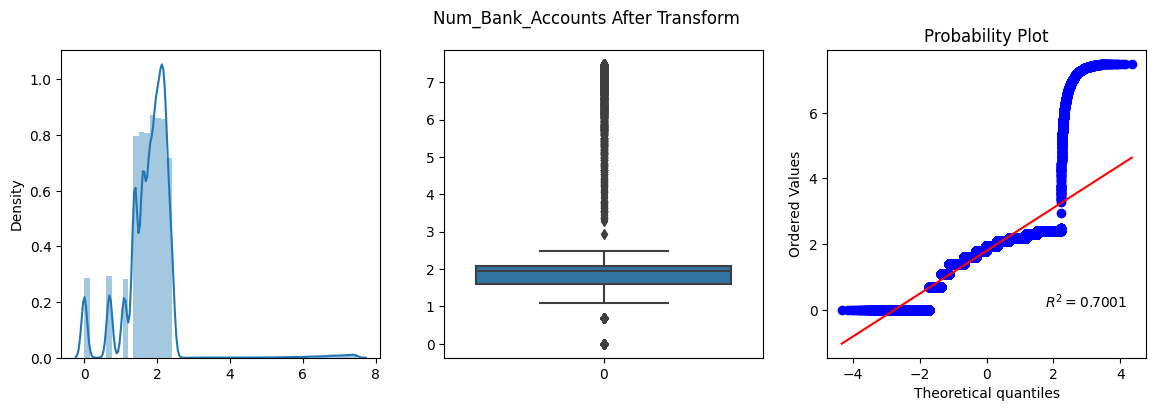

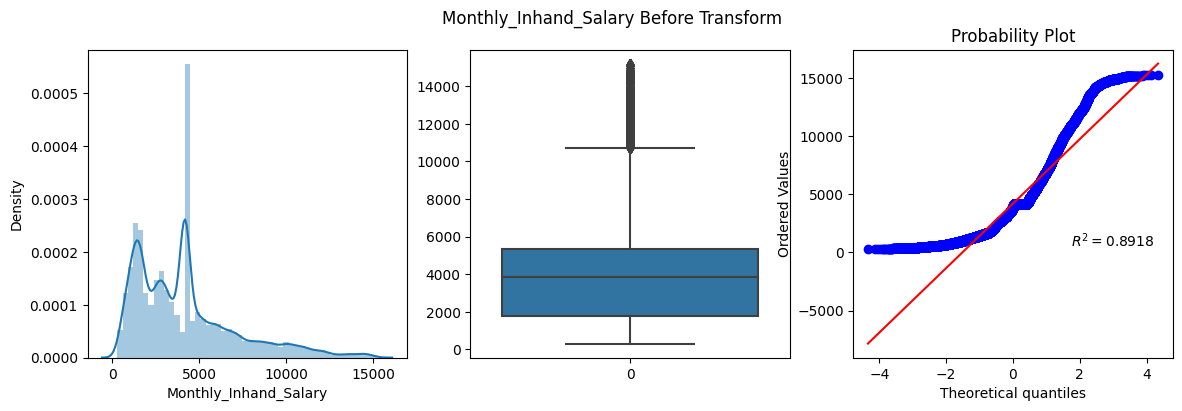

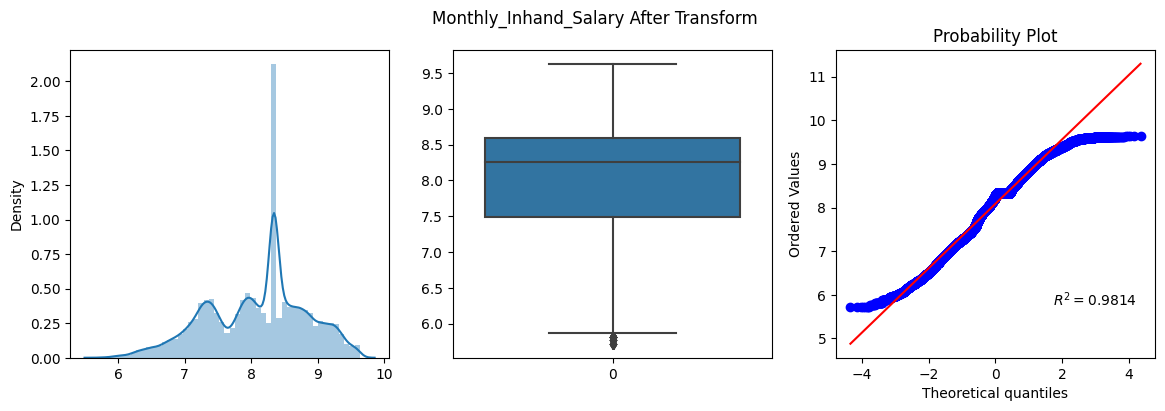

In [14]:
skewed_cols = ['Total_EMI_per_month','Credit_Utilization_Ratio','Num_Credit_Inquiries','Delay_from_due_date','Interest_Rate','Num_Credit_Card','Num_Bank_Accounts','Monthly_Inhand_Salary']

for col in skewed_cols:
    if col != "Delay_from_due_date":
        apply_transform(FunctionTransformer(np.log1p),col)

### Square Root Transform

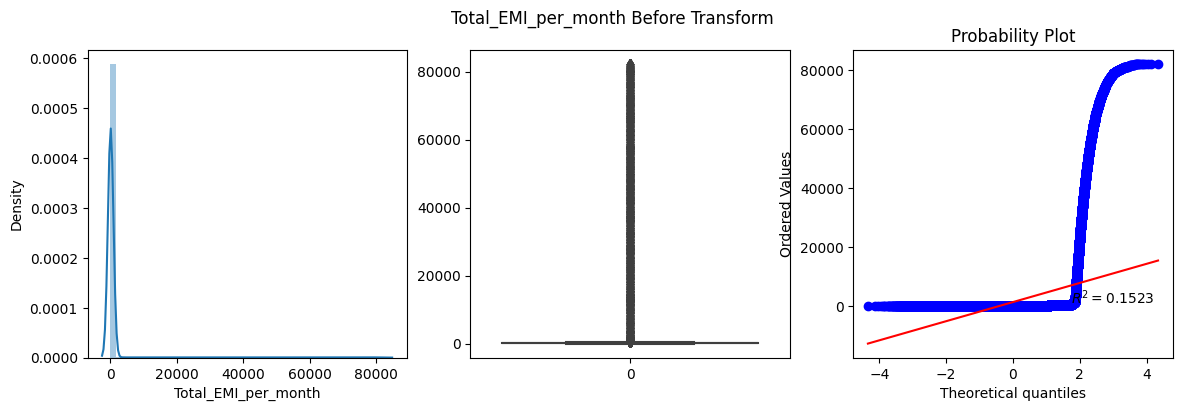

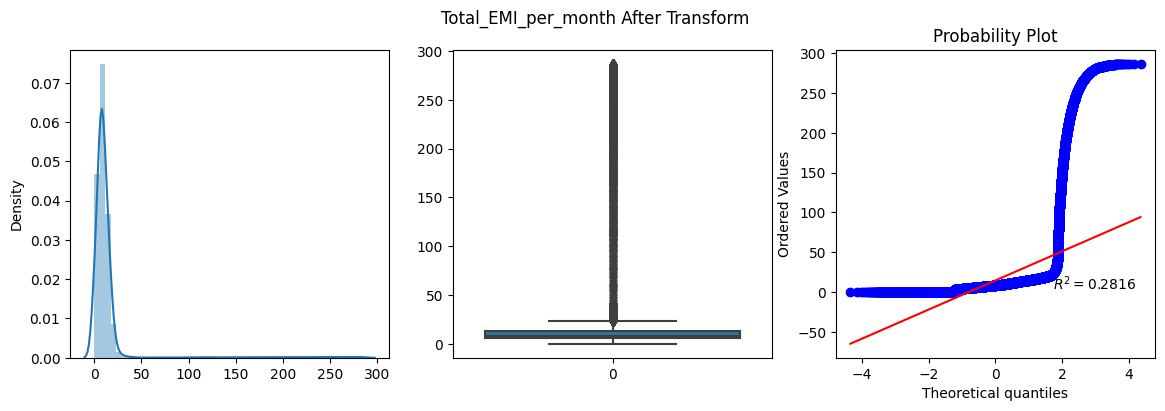

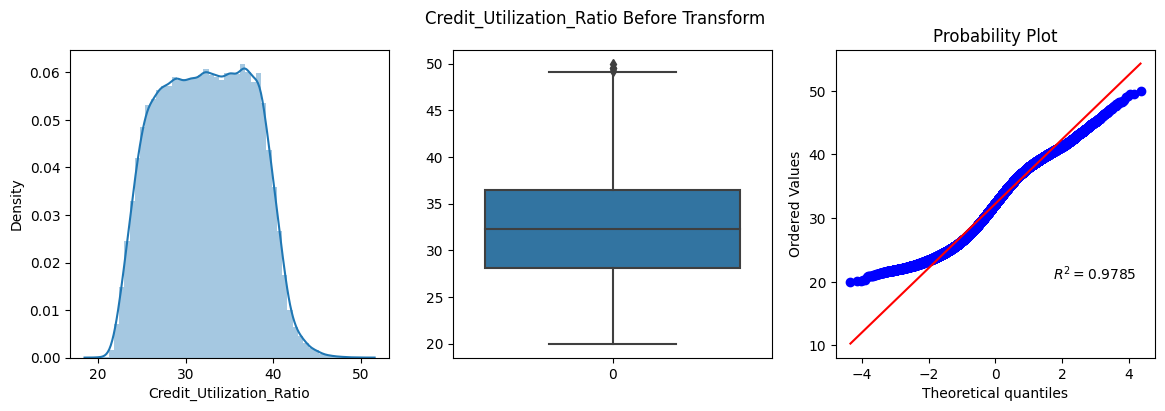

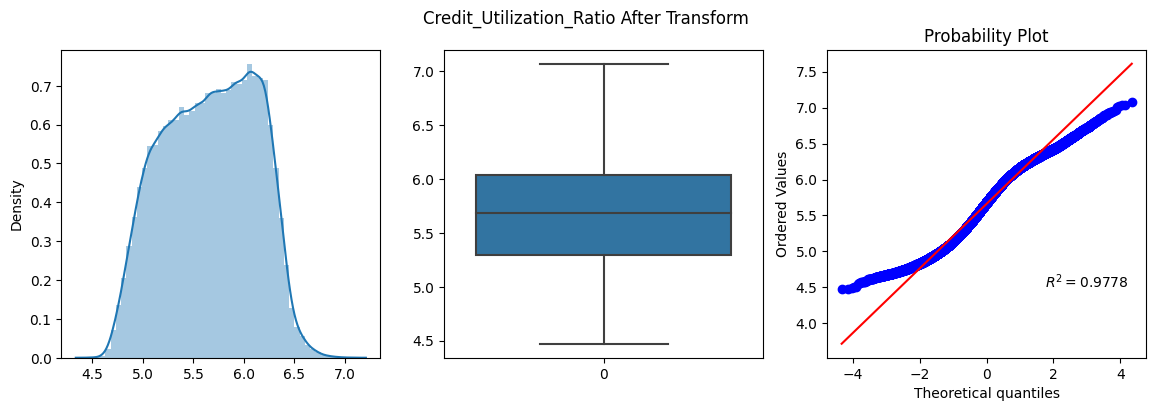

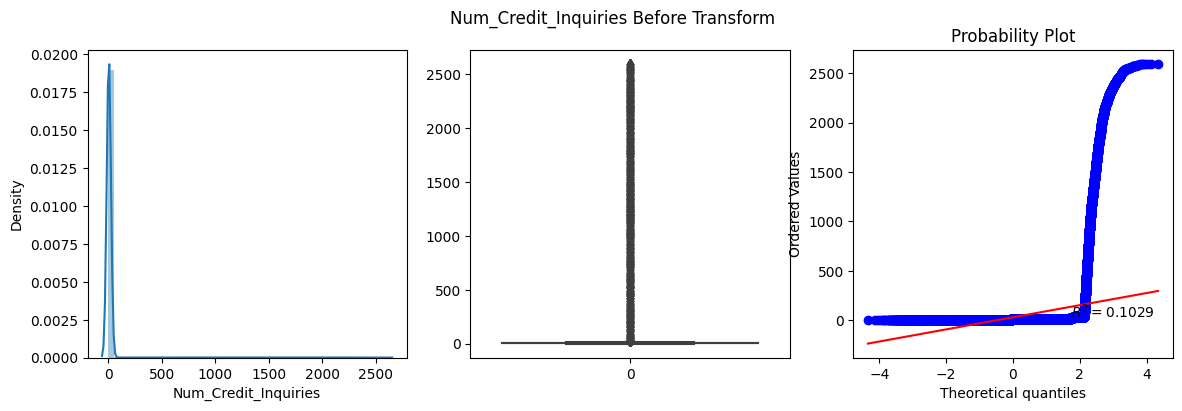

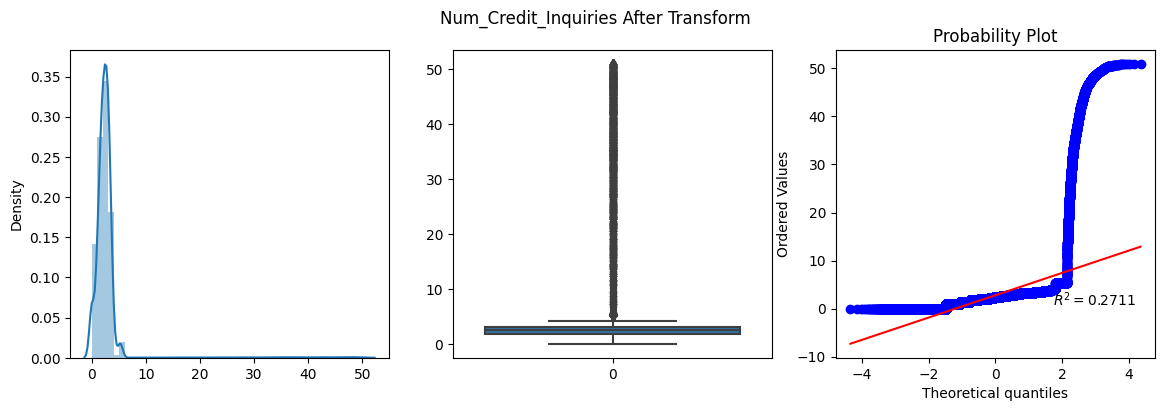

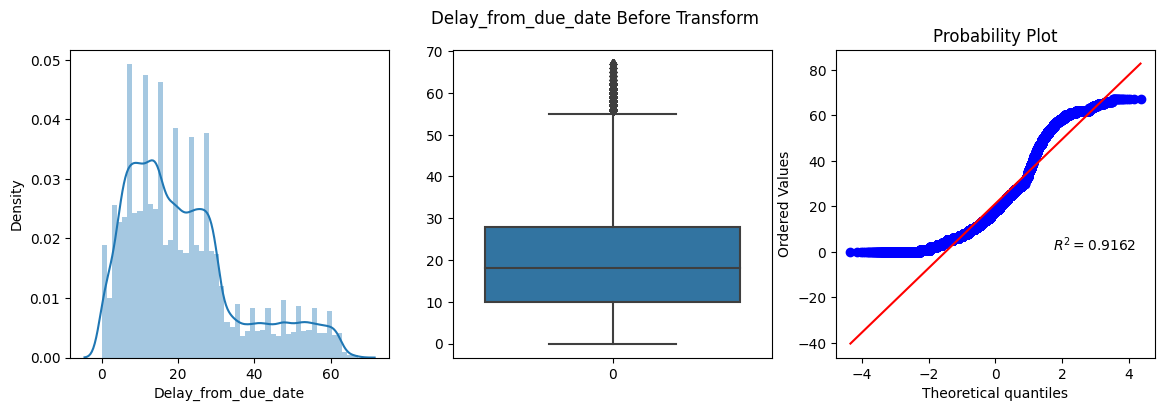

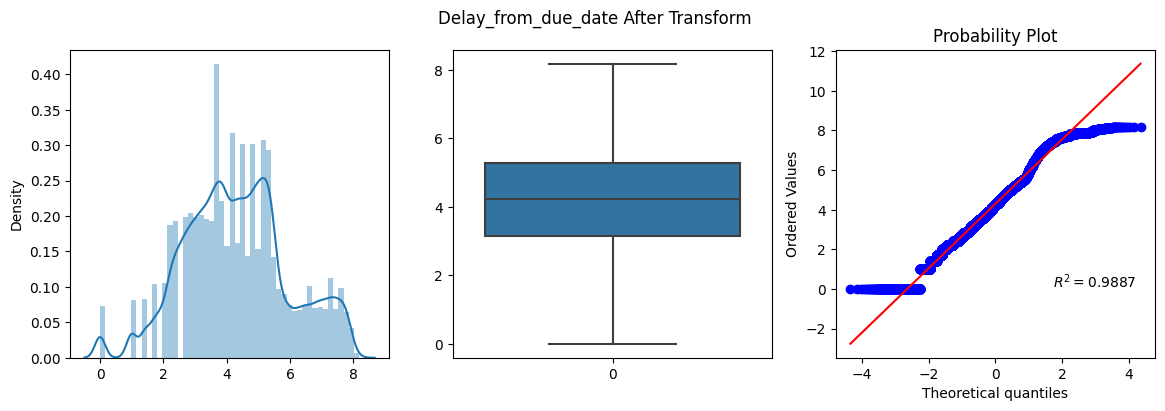

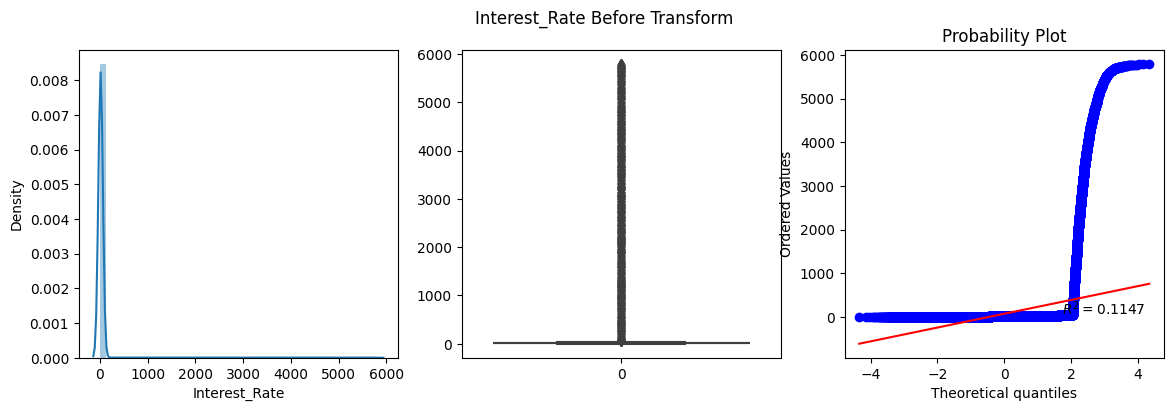

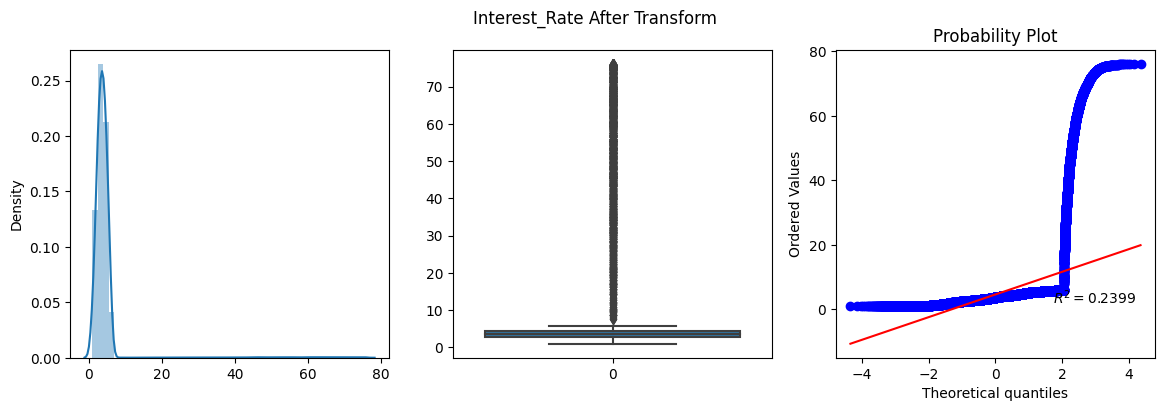

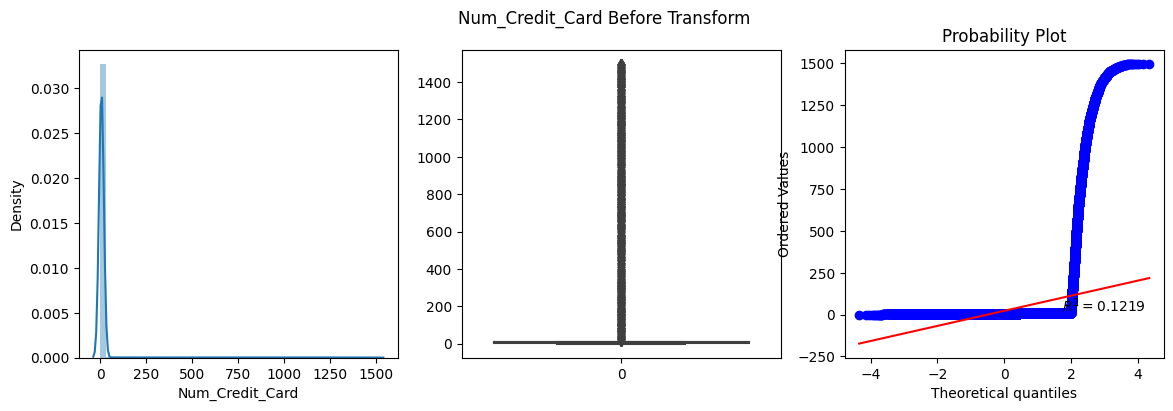

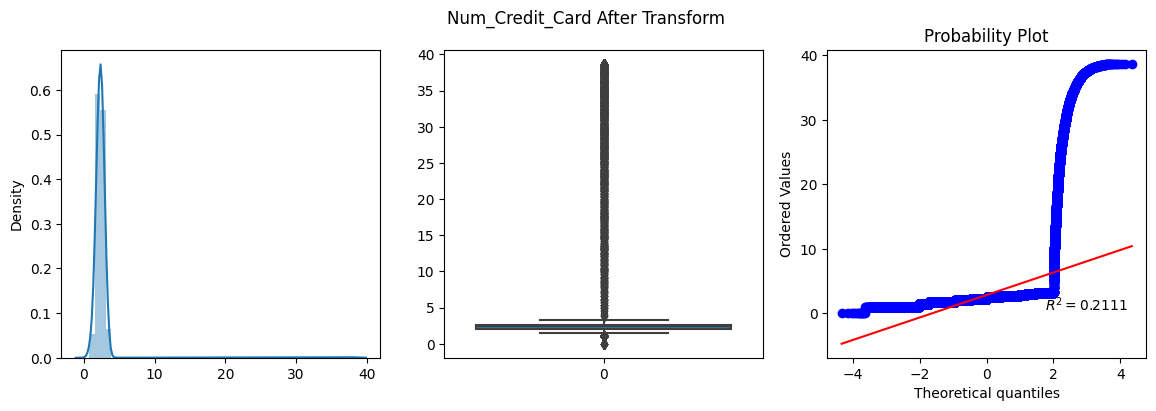

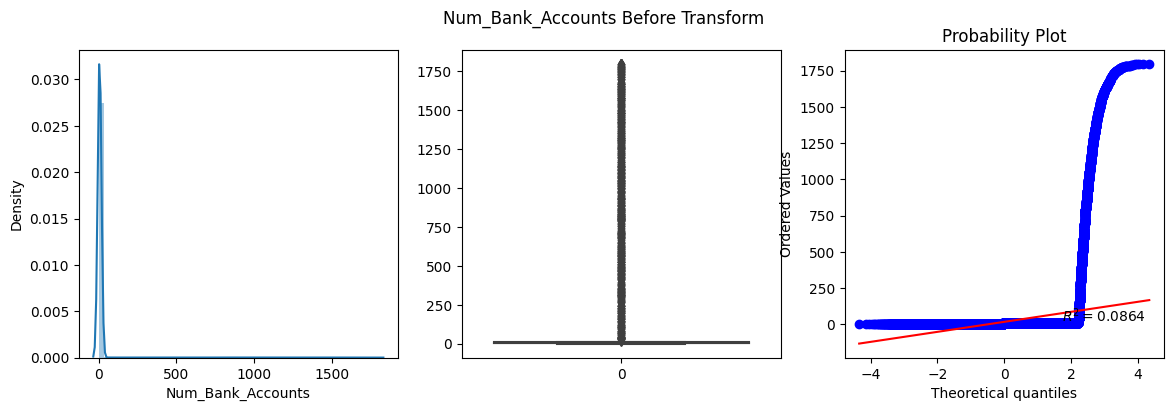

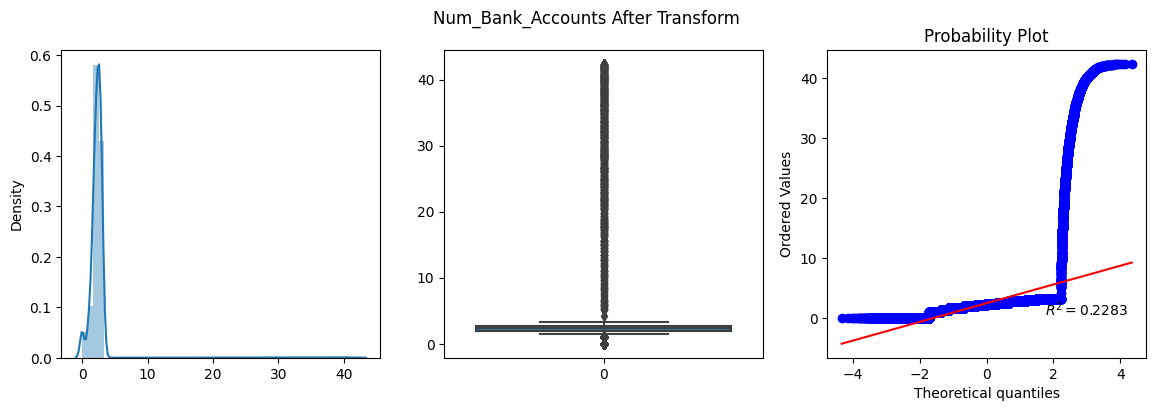

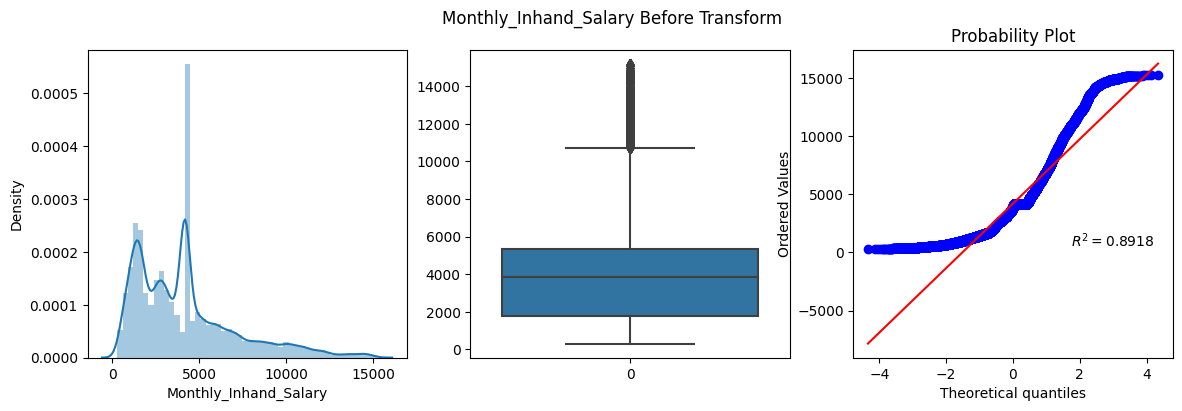

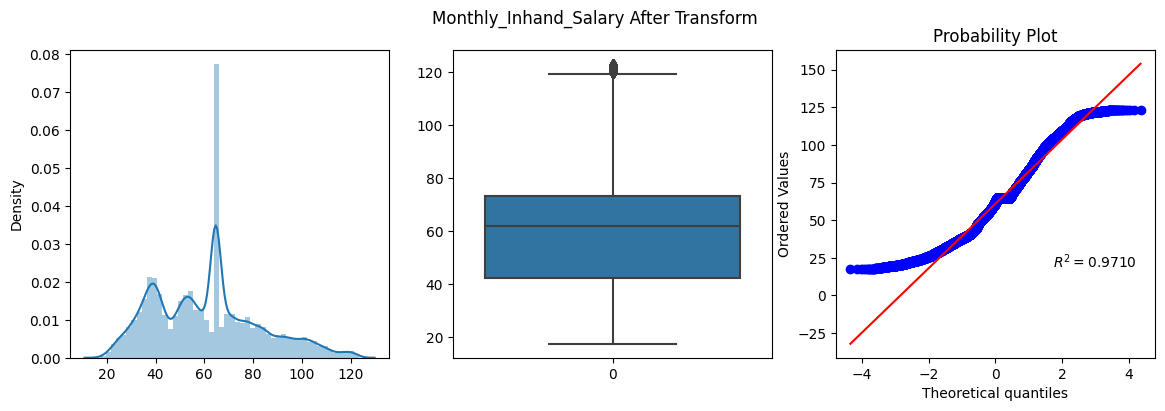

In [15]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.sqrt),col)

### Square Transform

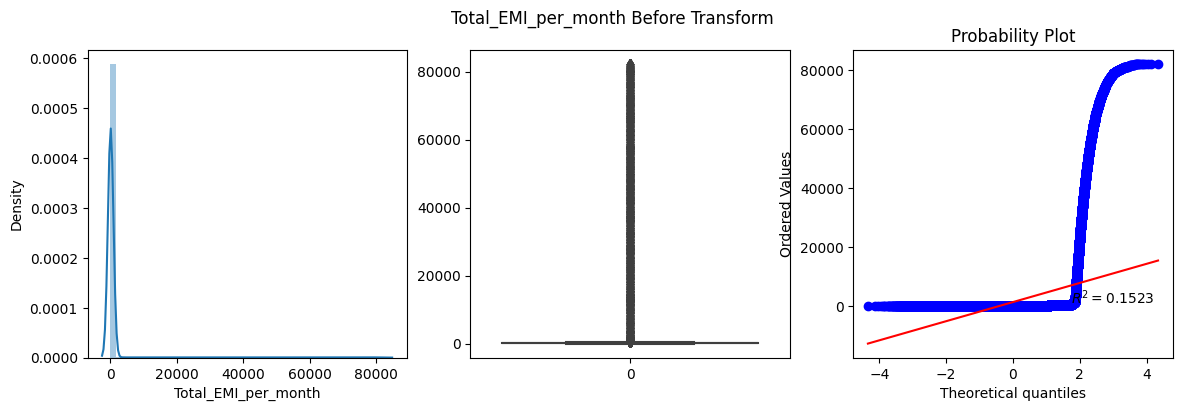

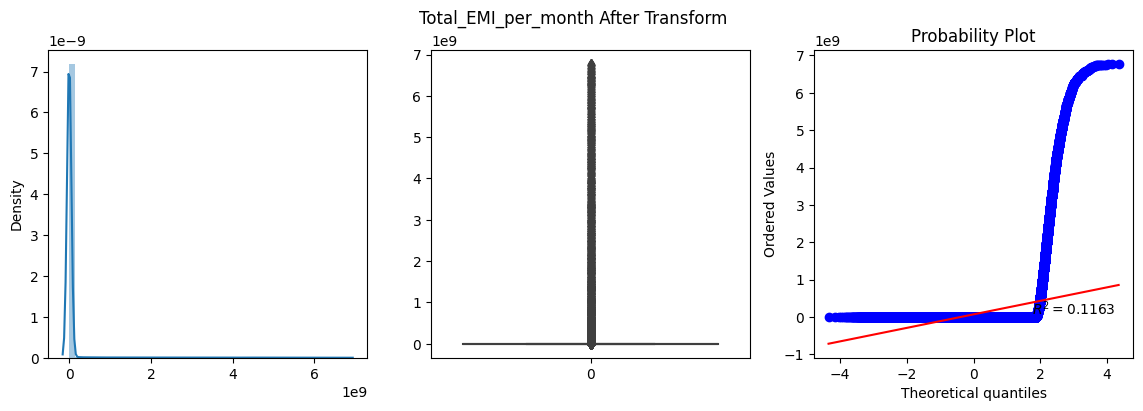

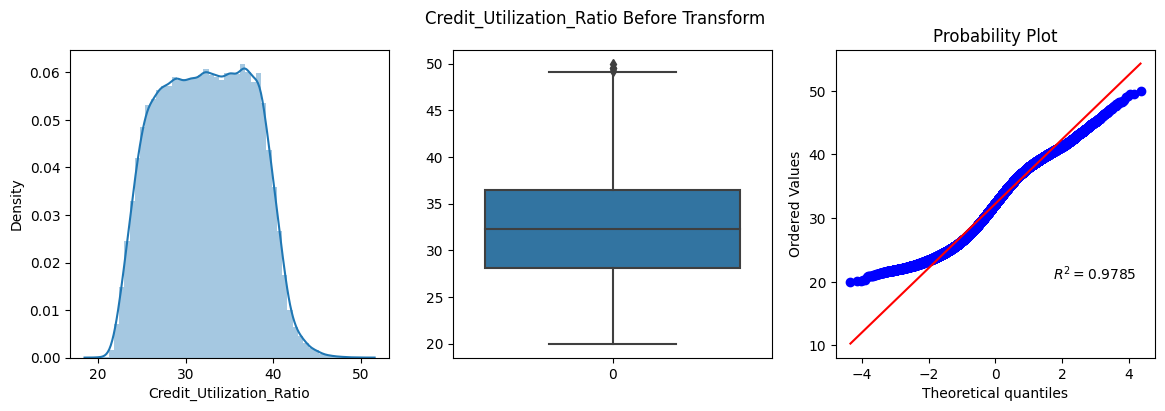

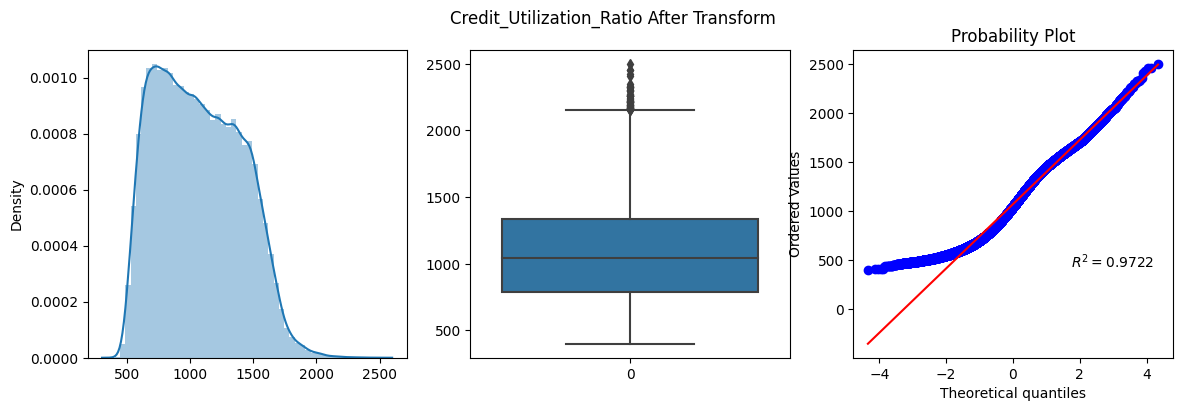

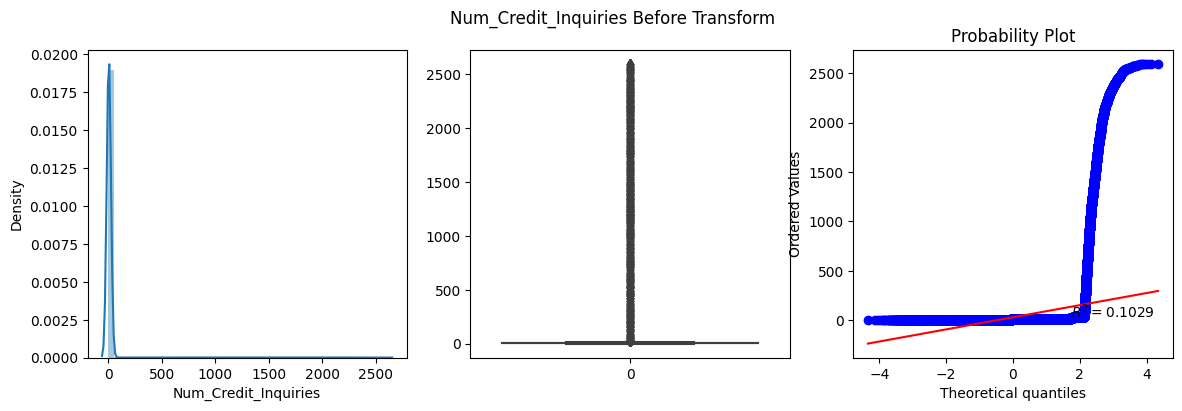

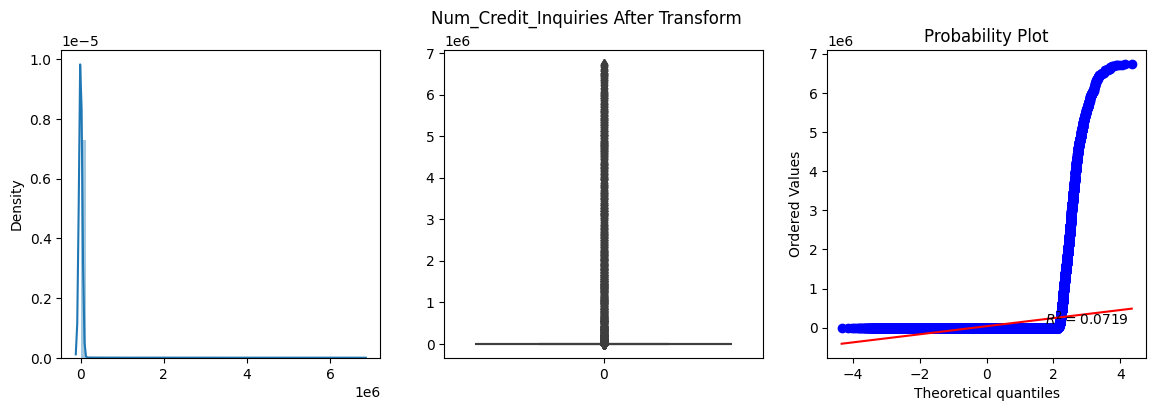

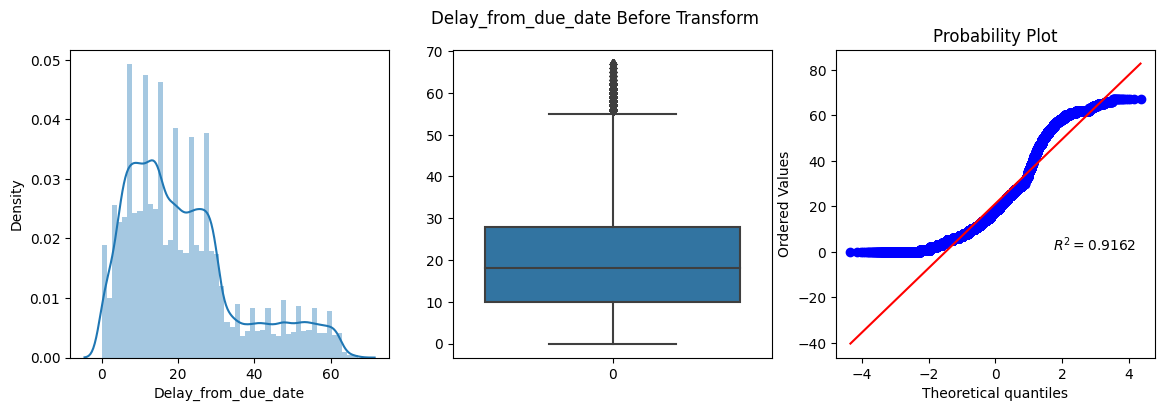

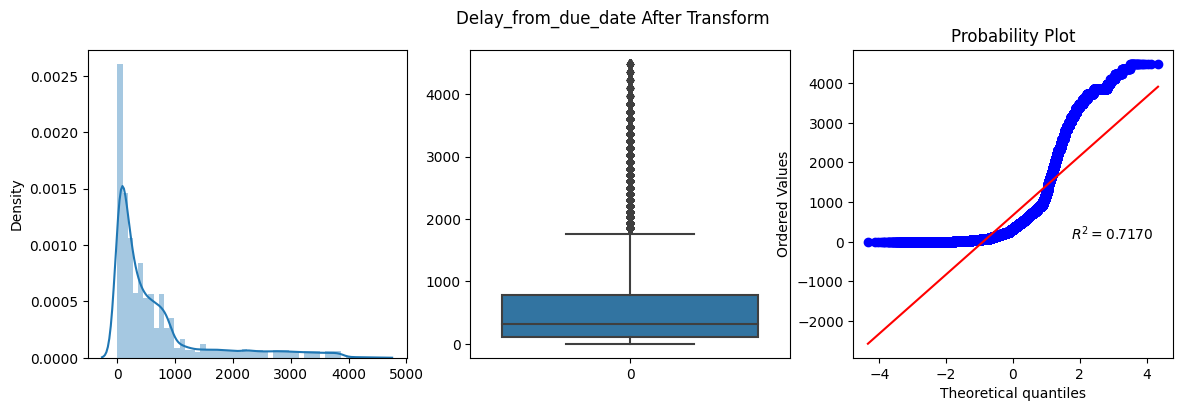

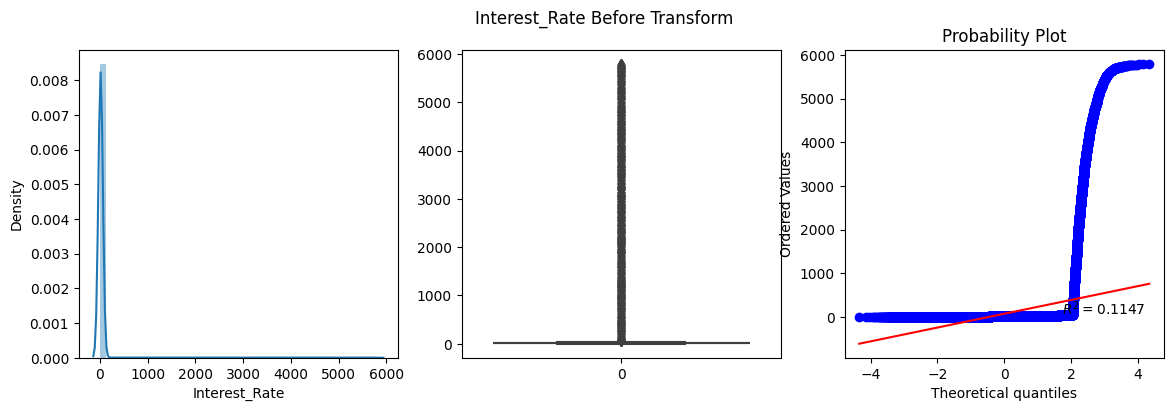

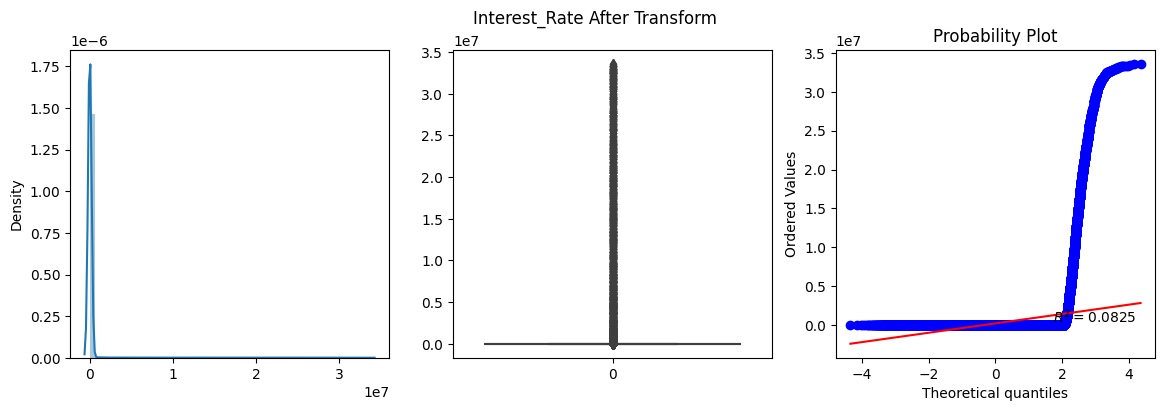

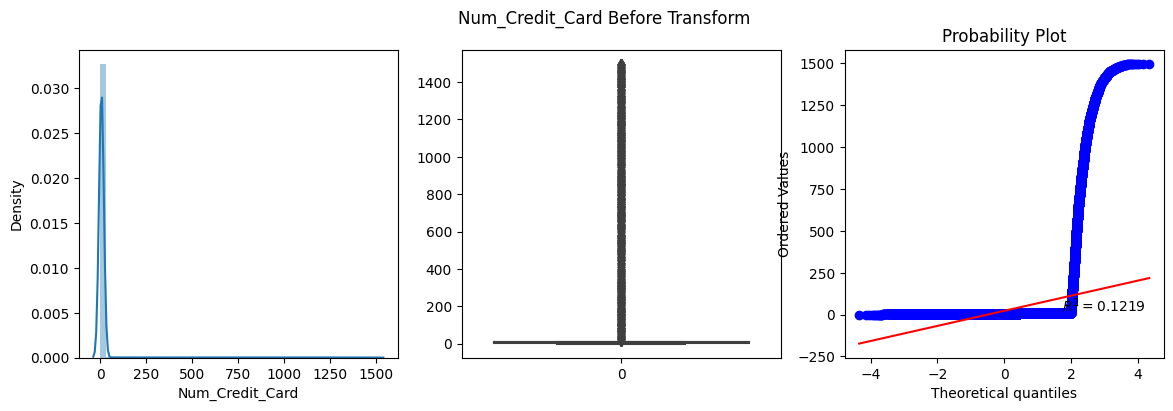

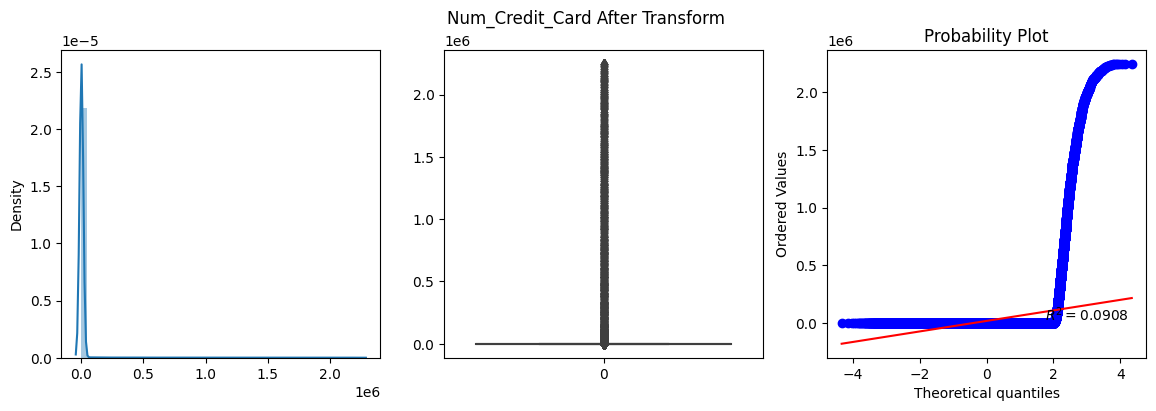

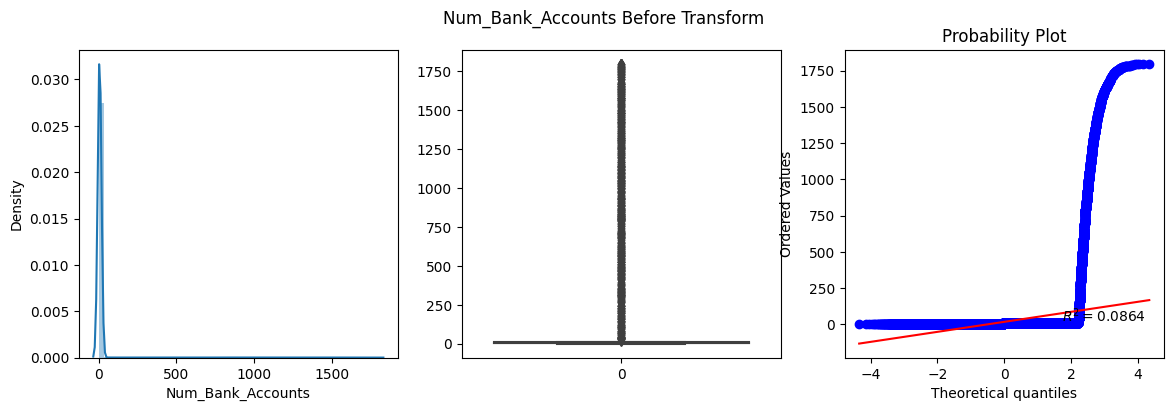

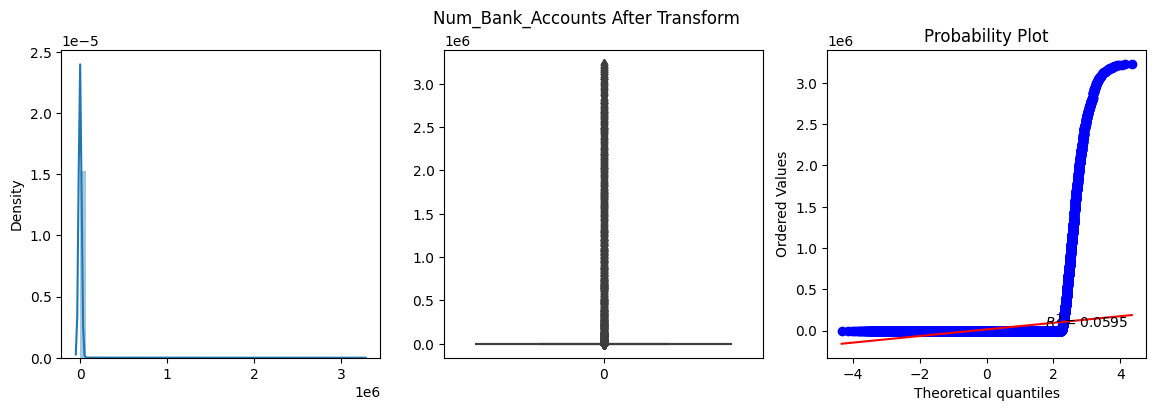

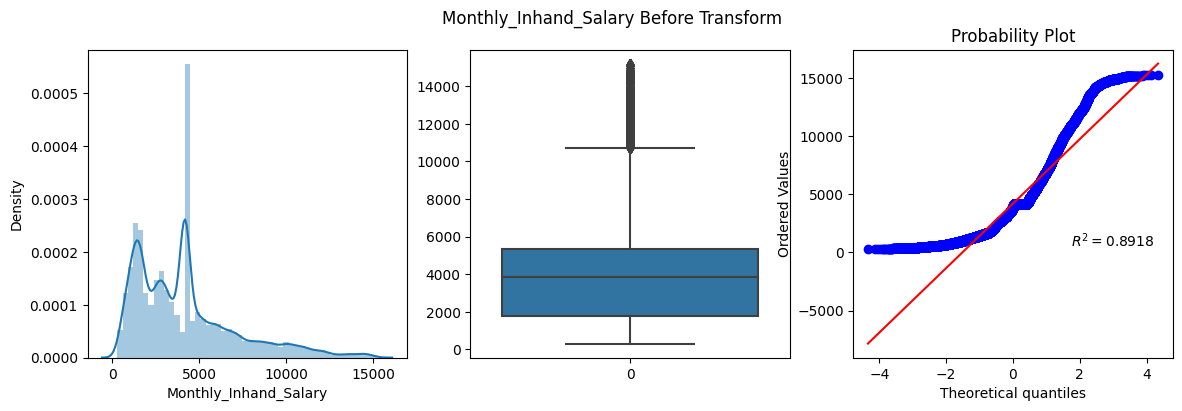

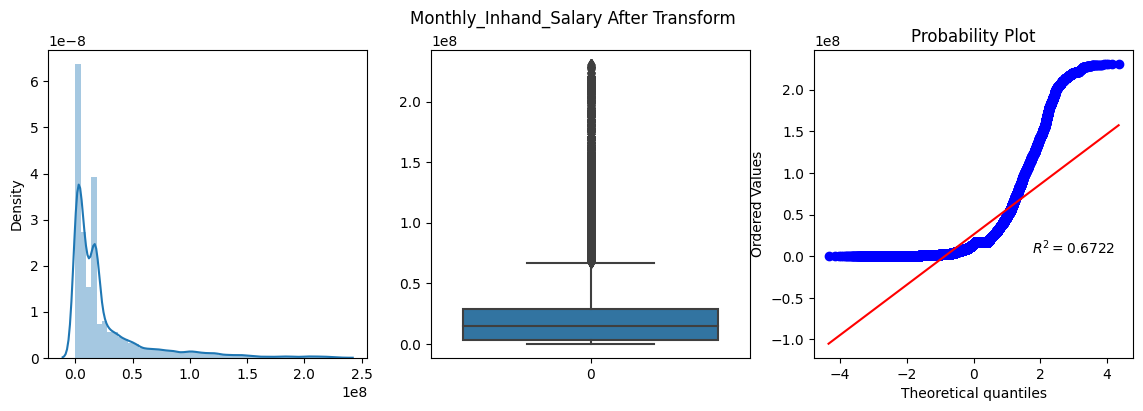

In [16]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: x**2),col)

### Reciprocal Transform

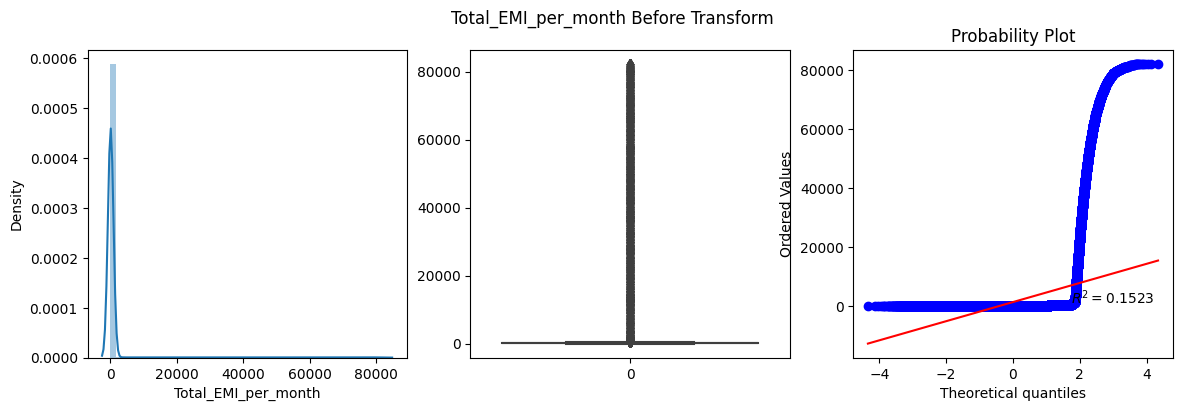

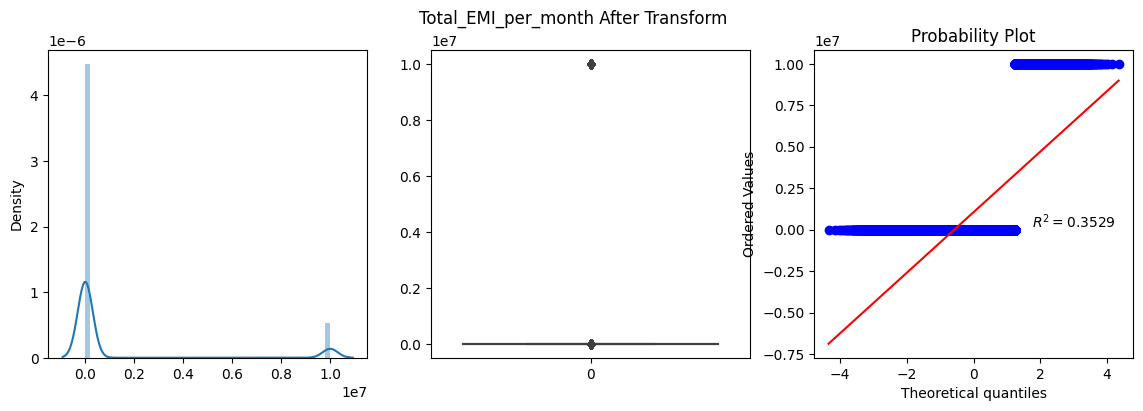

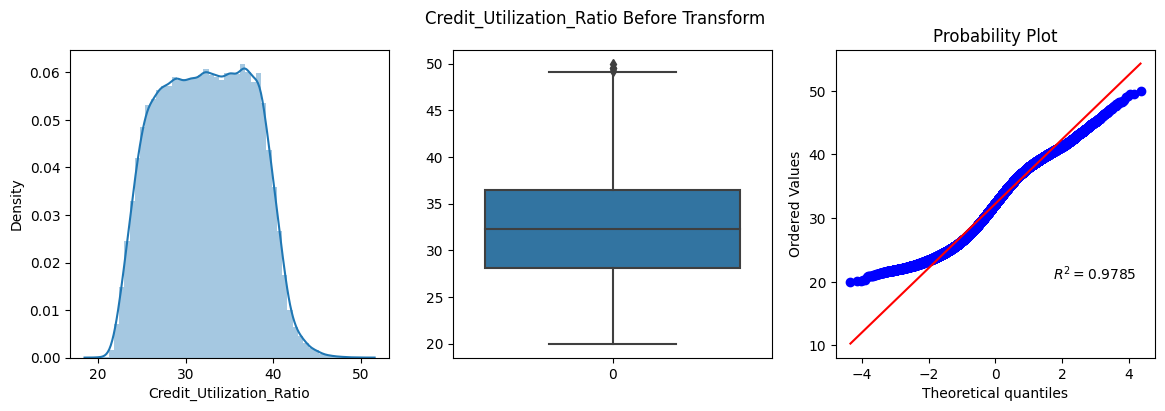

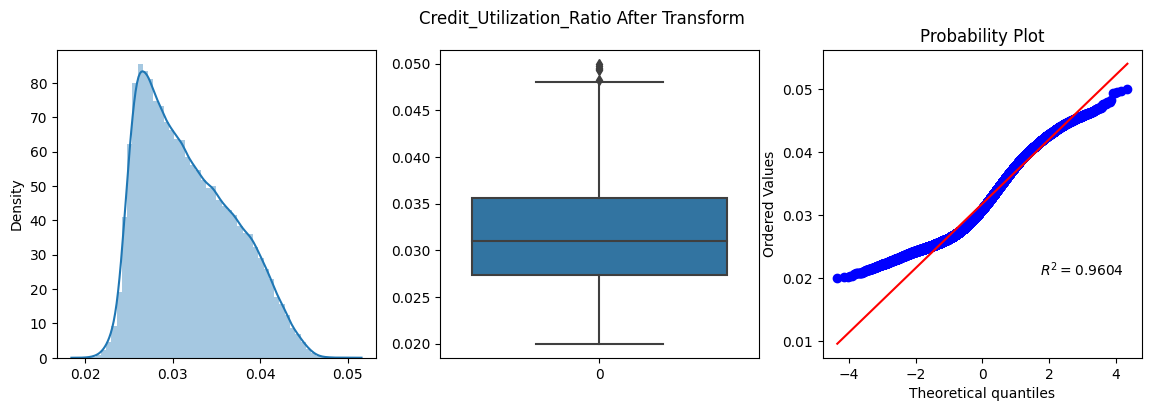

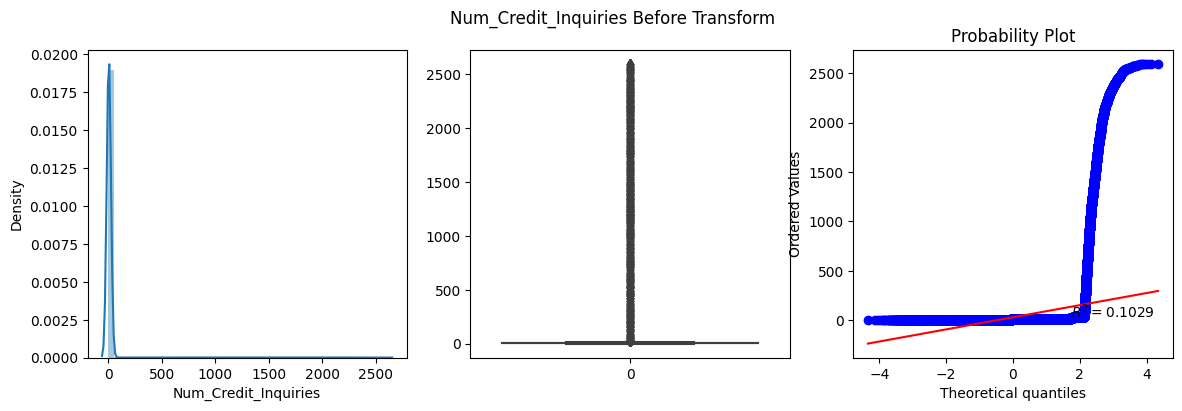

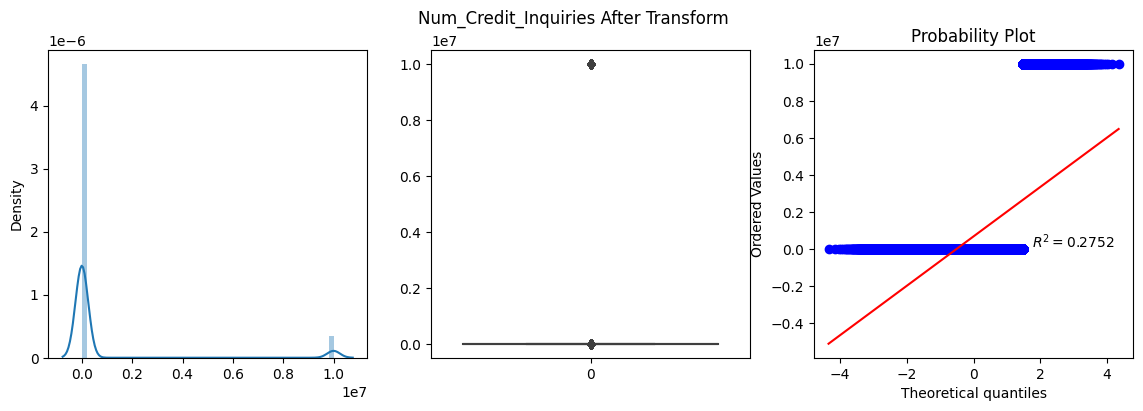

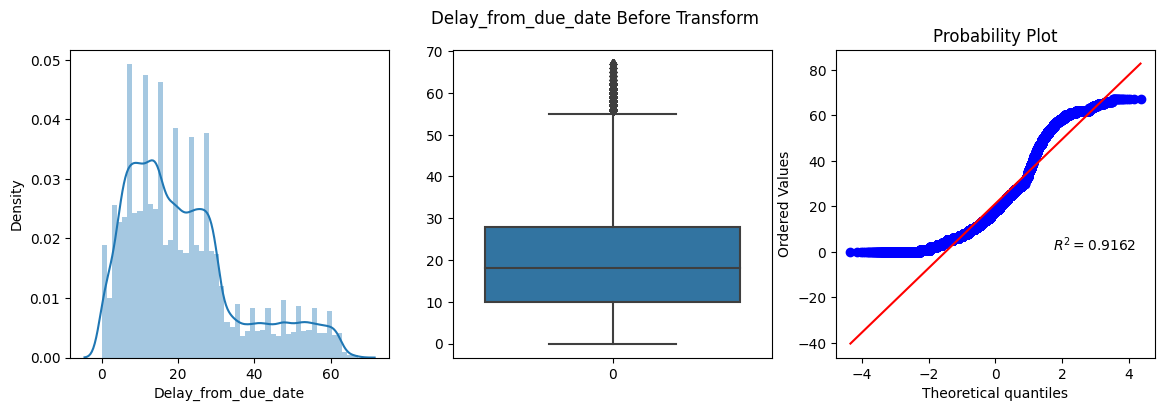

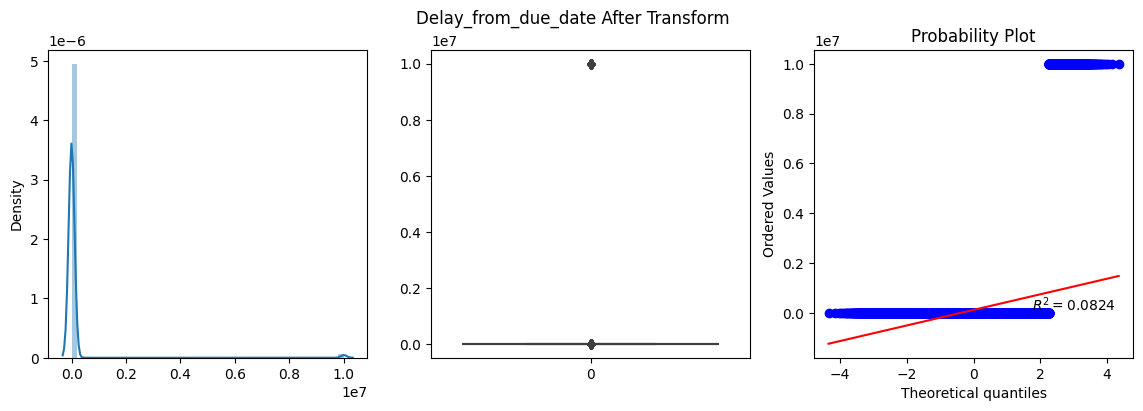

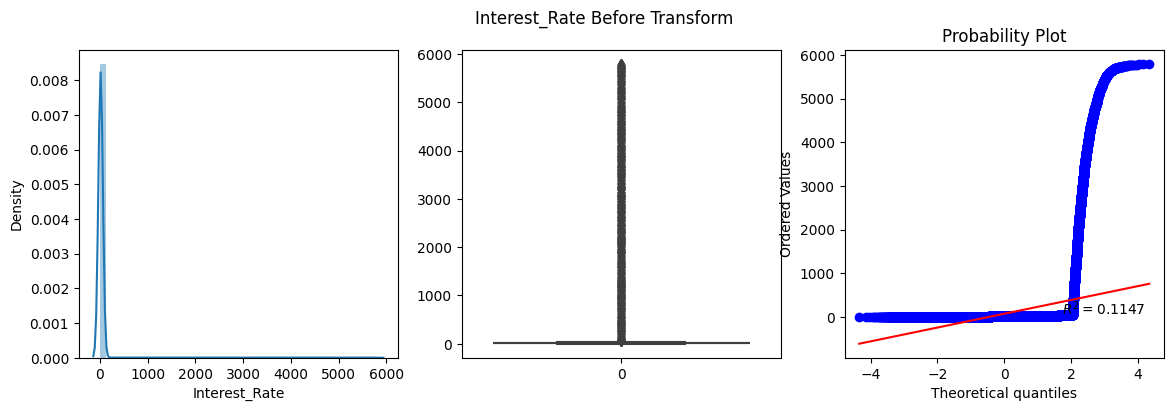

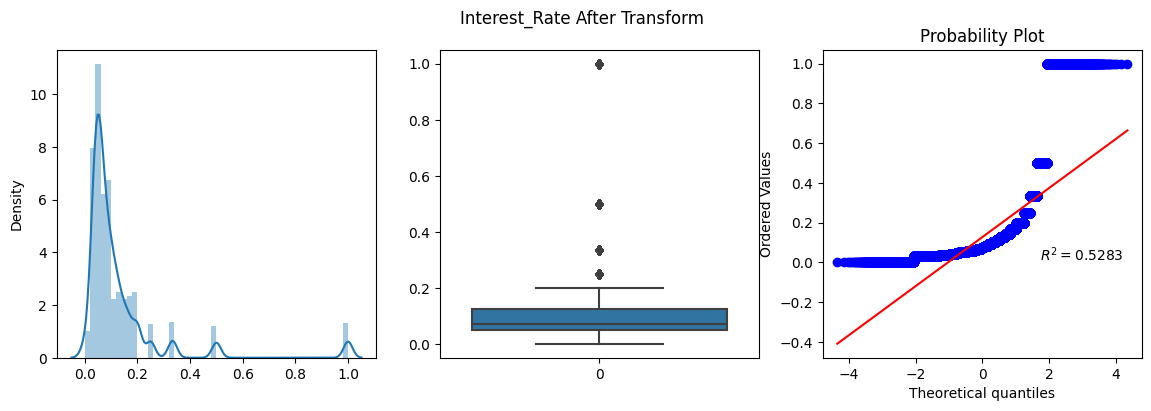

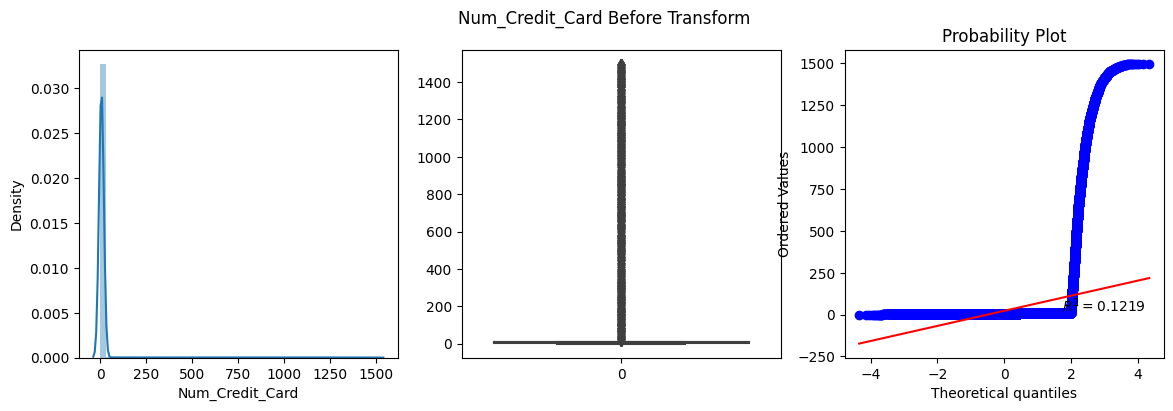

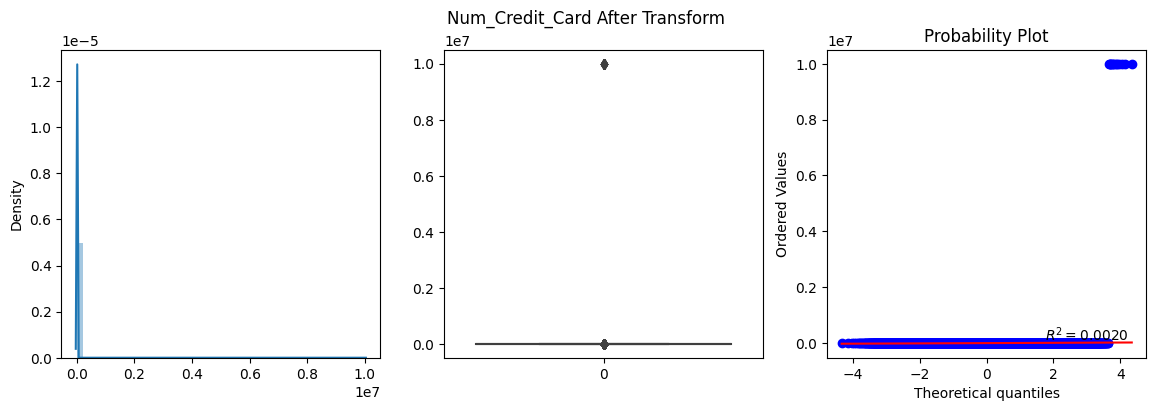

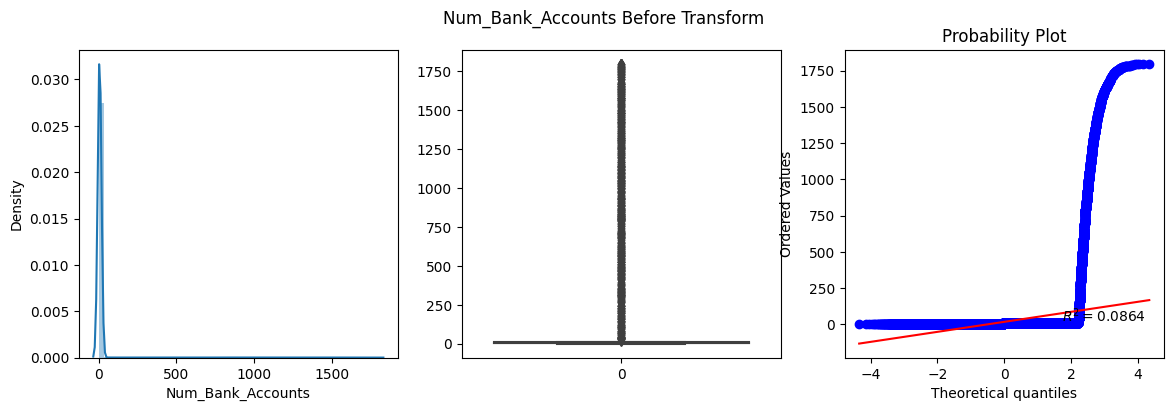

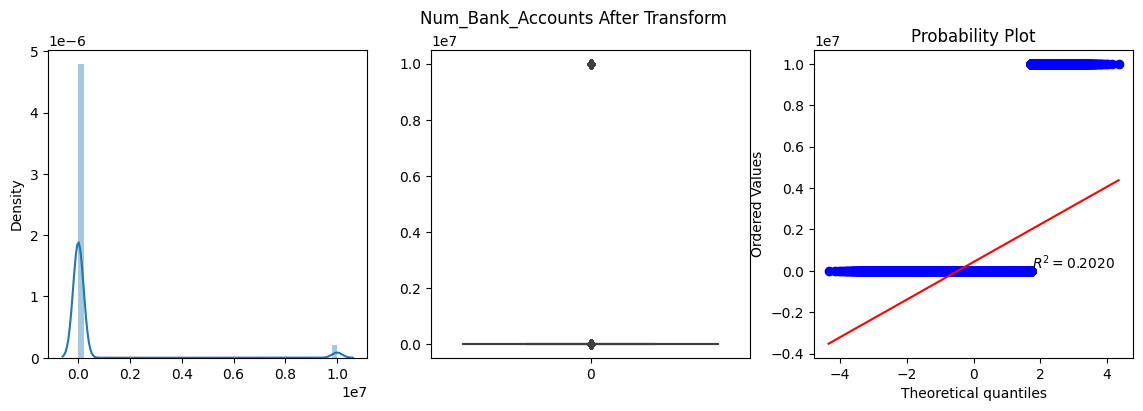

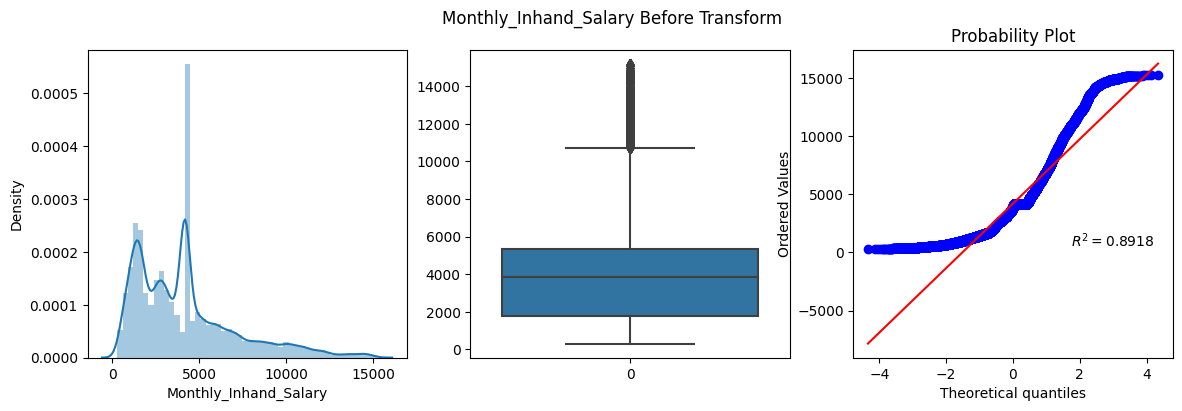

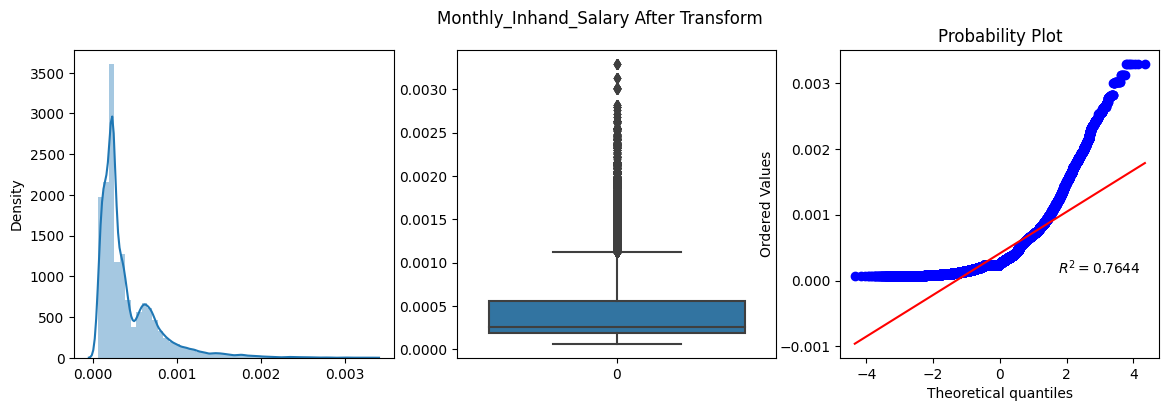

In [17]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: 1/(x+0.0000001)),col)

### Yeo-Johnson Power Transform

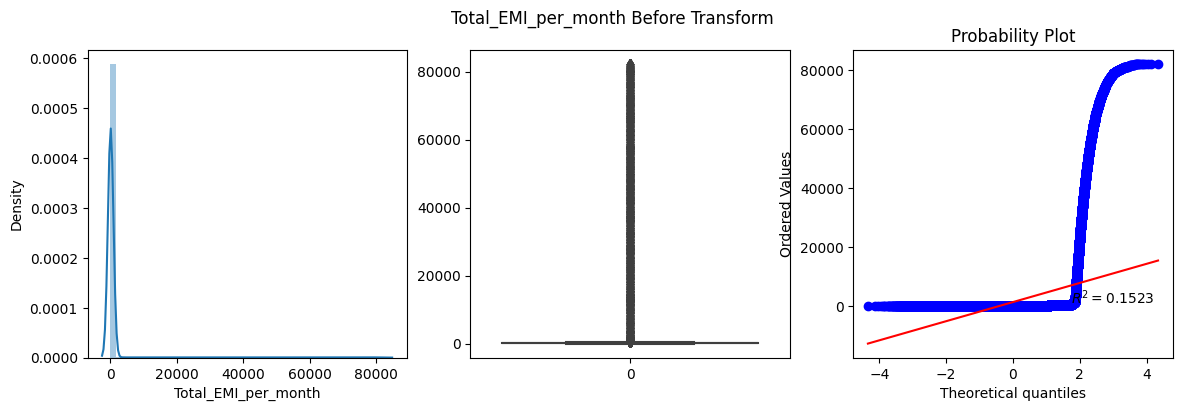

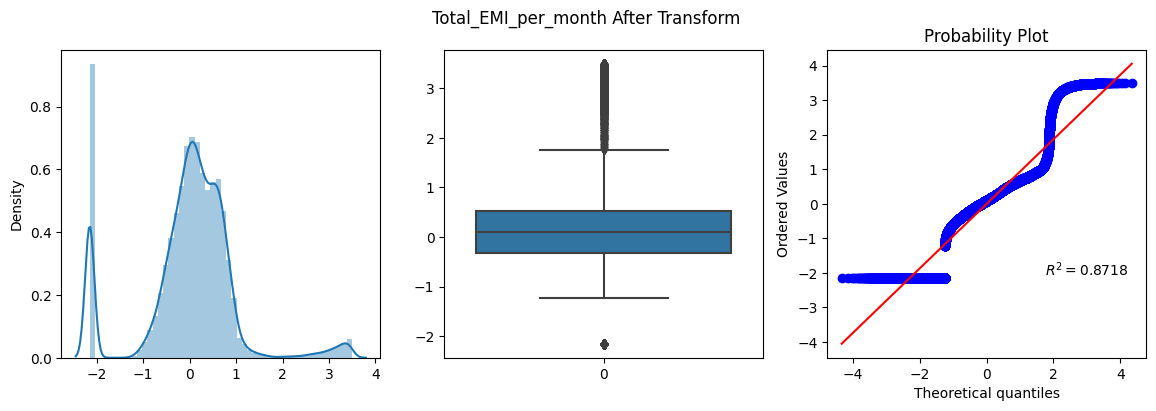

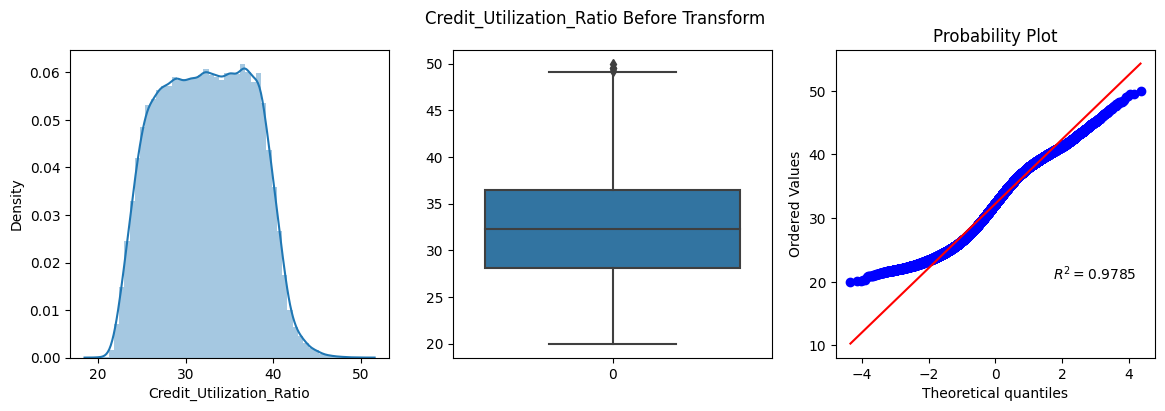

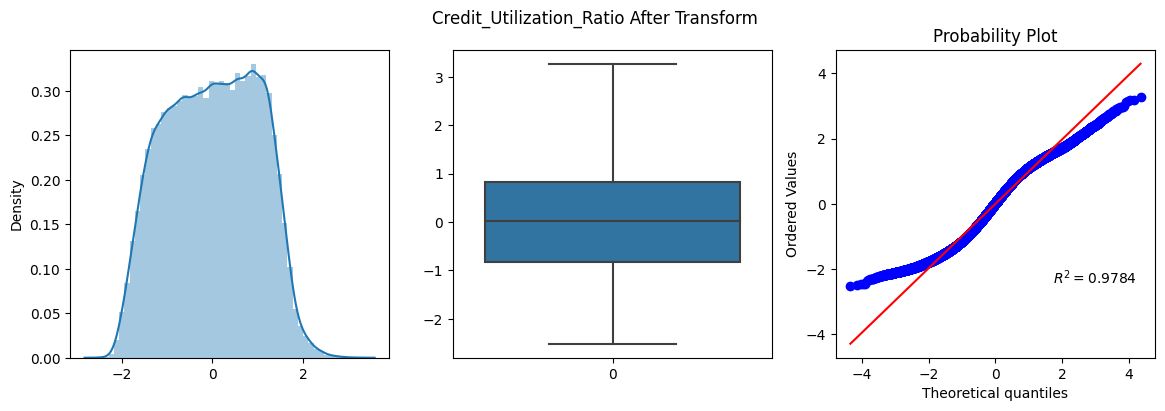

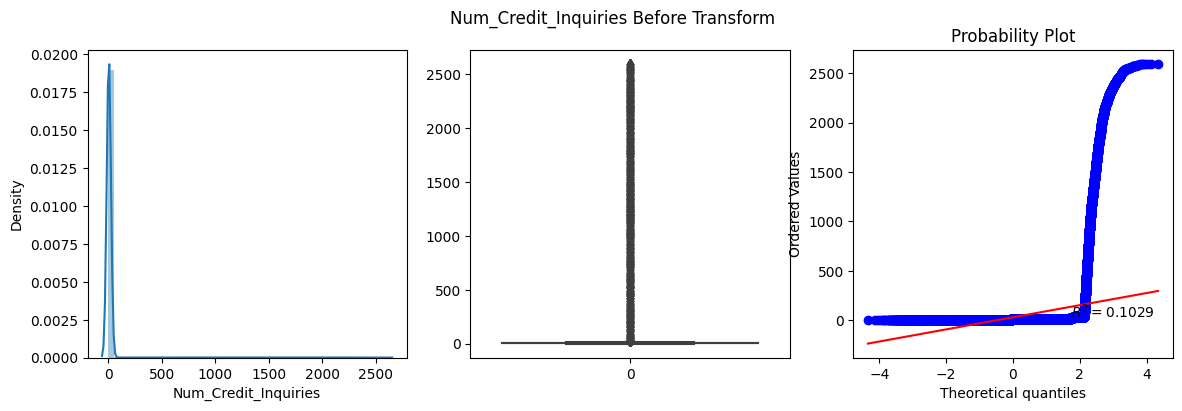

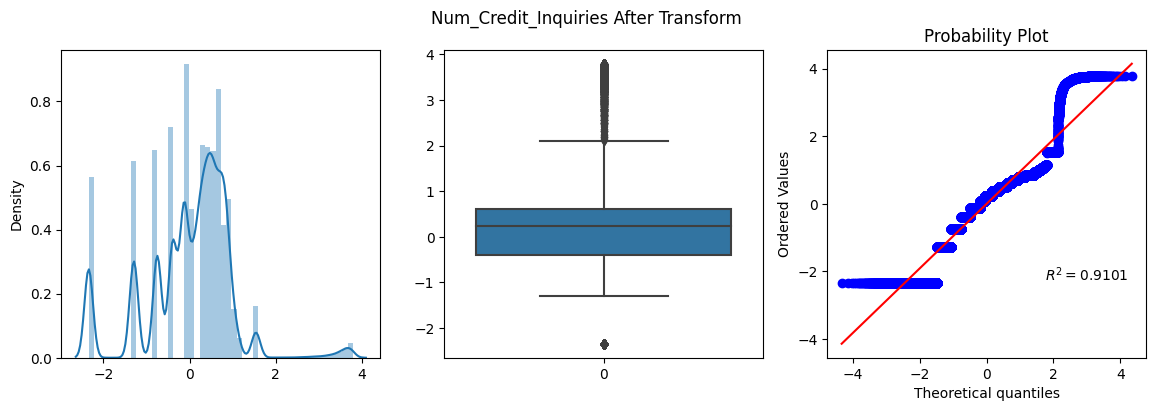

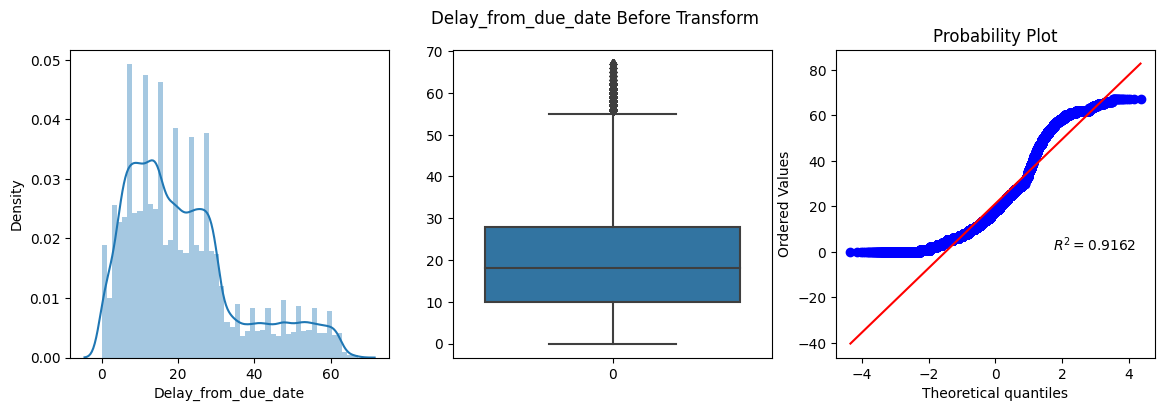

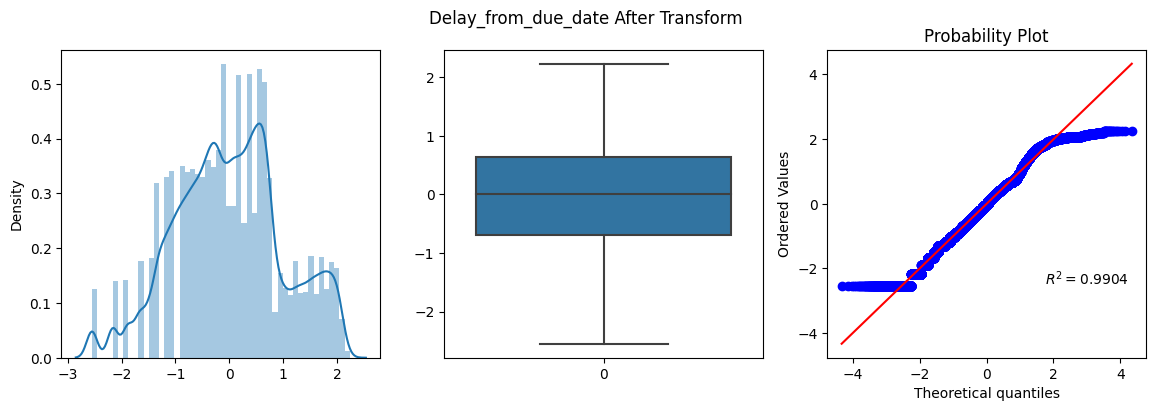

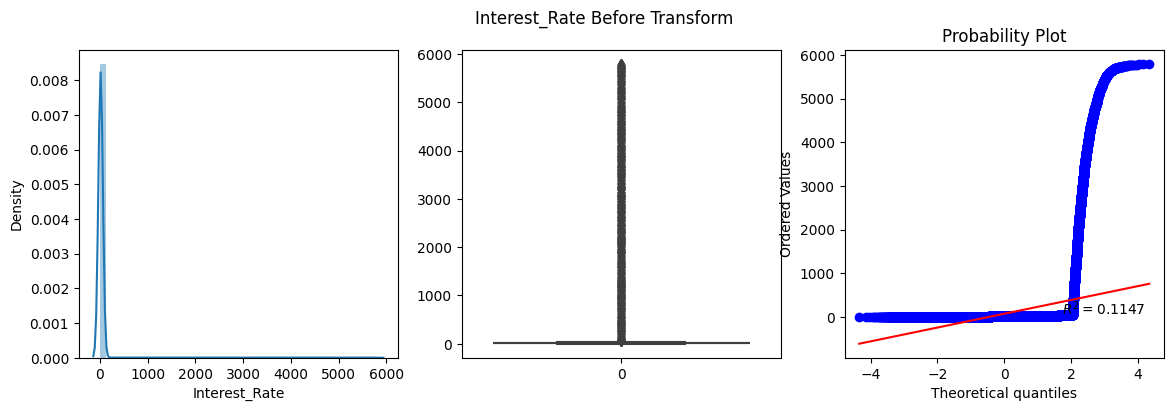

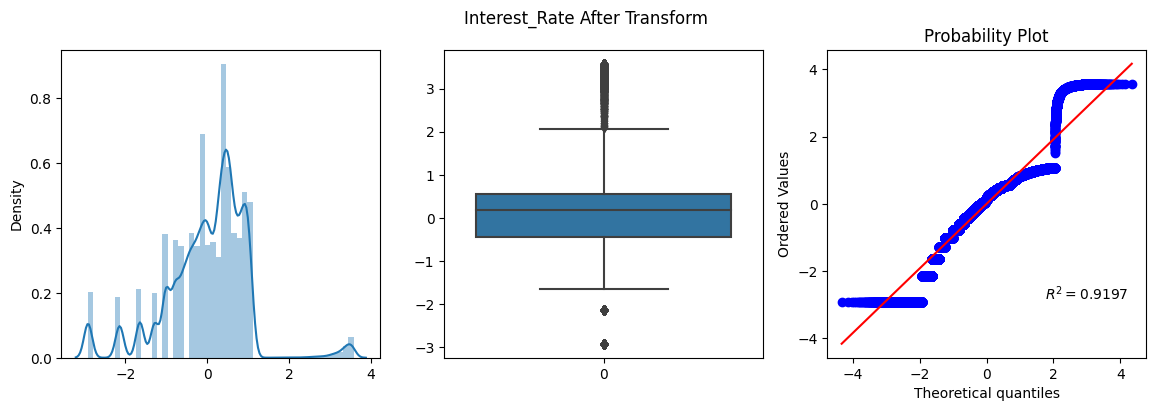

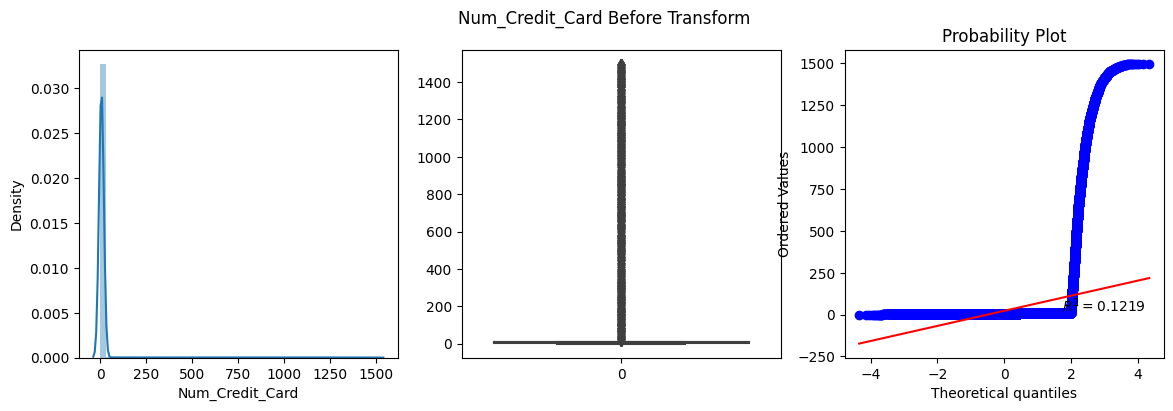

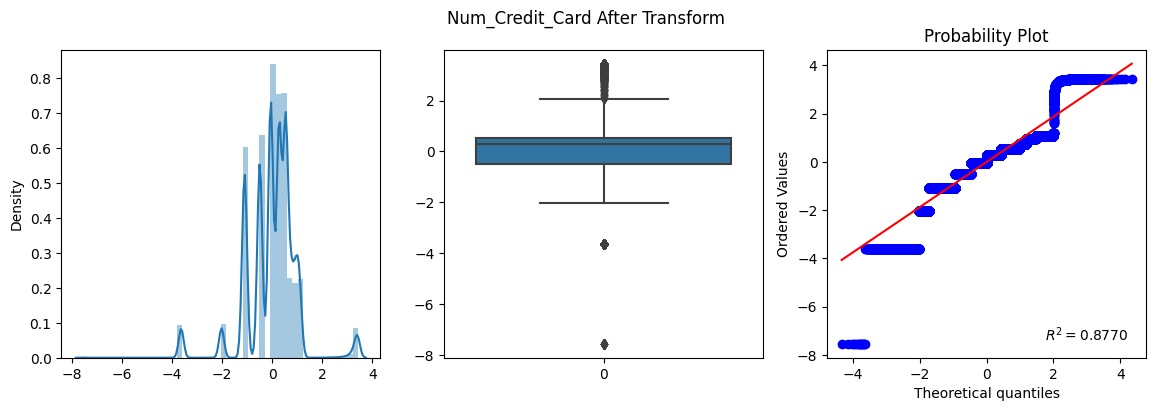

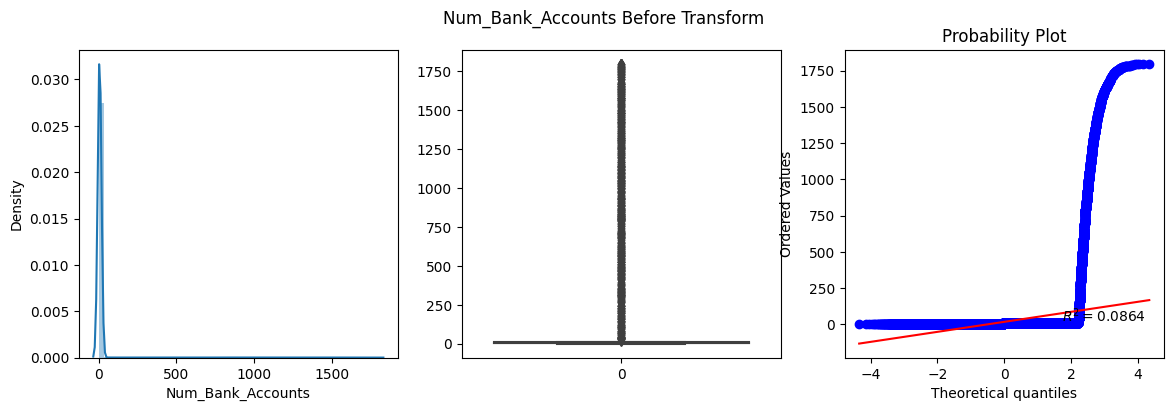

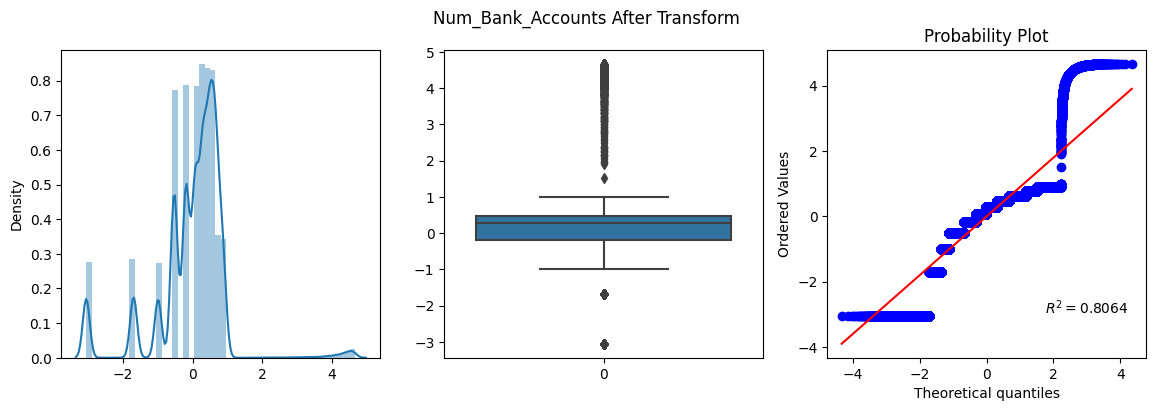

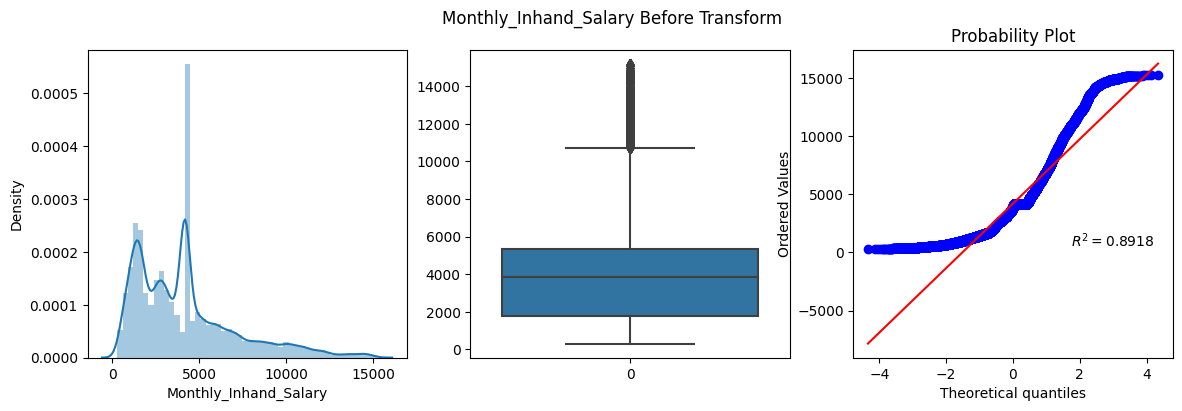

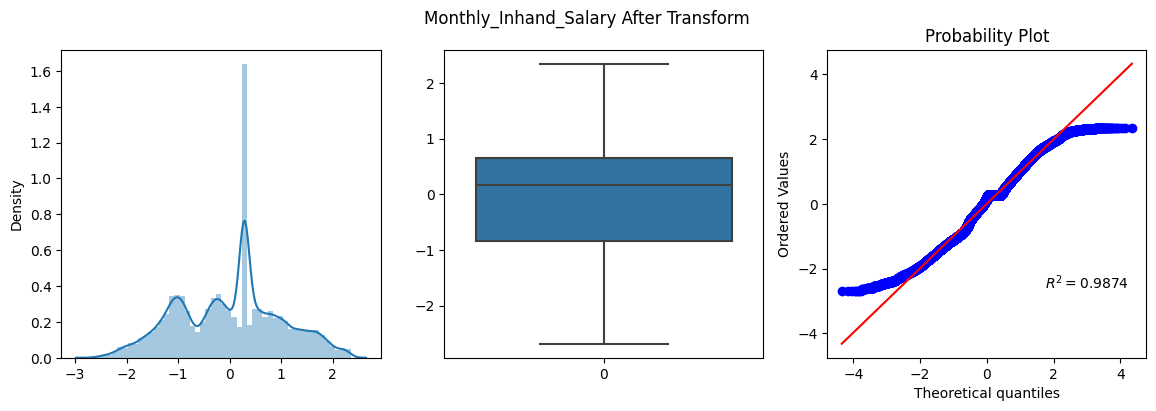

In [18]:
for col in skewed_cols:
    apply_transform(PowerTransformer(),col)

Log Transform: None <br>
Reciprocal Transform: Num_Bank_Accounts <br>
Sqrt Transform: None <br>
Square Transform: None <br>
Power Transform(Yeo-Johnson Transform): Monthly_Inhand_Salary, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_Credit_Inquiries, Total_EMI_per_month

In [19]:
temp = df.copy() # Creating a copy of the original dataset
temp.head()

ID Customer_ID    Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40    March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40    April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40      May  Aaron Maashoh    23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40     June  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
2      19114.12            4184.712202                  3  ...        Good   
3      19114.12            4184.712202                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   
5      19114.12            4184.712202                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   
5            809.98                27.262259  22 Years and 6 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   
5                     No           49.574949      62.430172331195294   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  
5                            !@9#%8   340.4792117872438         Good  

[5 rows x 28 columns]

In [20]:
reciprocal_transformer = FunctionTransformer(lambda x: 1/(x+0.0000001))
df.Num_Bank_Accounts = reciprocal_transformer.fit_transform(df.Num_Bank_Accounts)

In [21]:
power_transform_cols = ['Monthly_Inhand_Salary','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_Credit_Inquiries','Total_EMI_per_month']
pt = PowerTransformer()

for col in power_transform_cols:
    col_tf = pt.fit_transform(df[[col]])
    df[col] = np.array(col_tf).reshape(col_tf.shape[0])

Skewness of Monthly_Inhand_Salary: -0.025749883234370056
Kurtosis of Monthly_Inhand_Salary: -0.5626355092173378


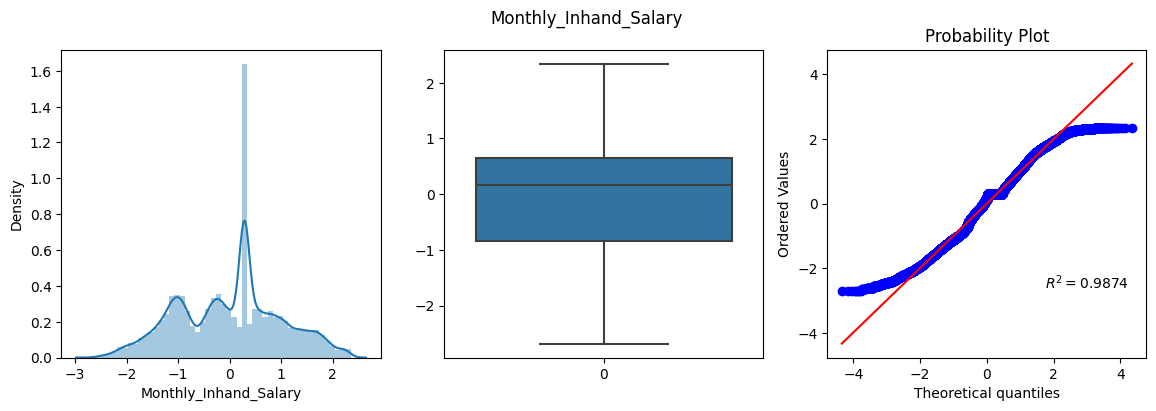

Skewness of Num_Bank_Accounts: 4.5230731800792645
Kurtosis of Num_Bank_Accounts: 18.458562436436704


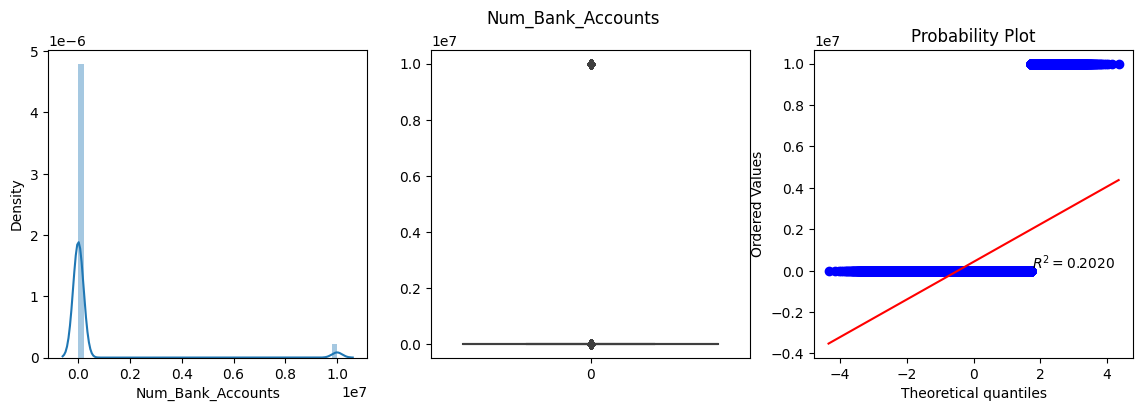

Skewness of Num_Credit_Card: -0.4472420485137146
Kurtosis of Num_Credit_Card: 4.493560477045806


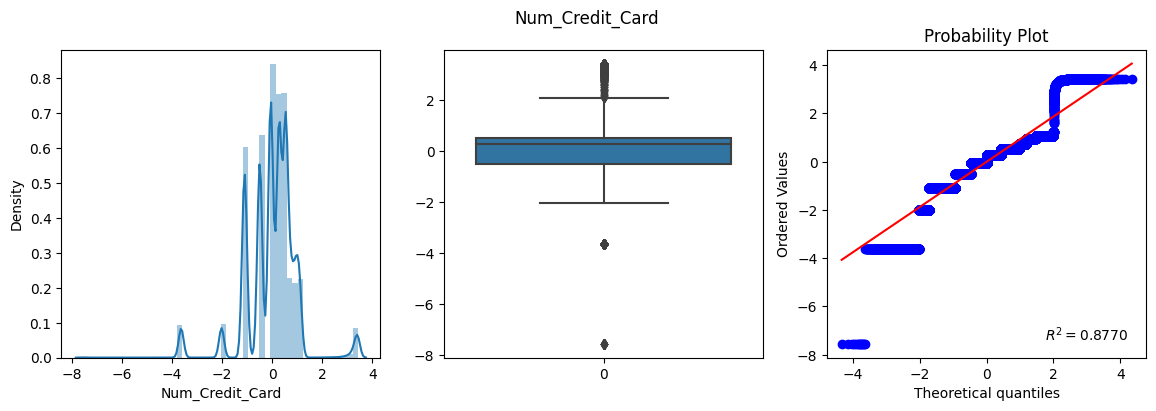

Skewness of Interest_Rate: -0.24057910254564283
Kurtosis of Interest_Rate: 2.3995513393134


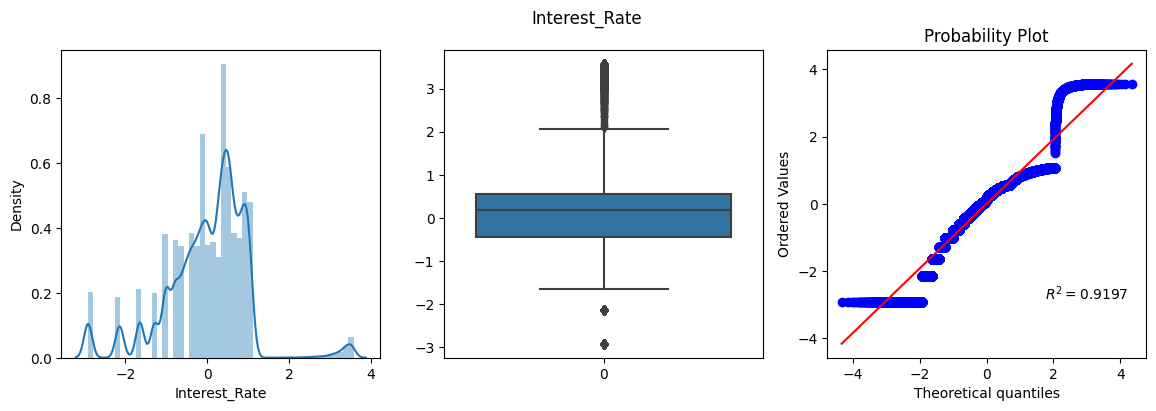

Skewness of Delay_from_due_date: -0.027433049629658812
Kurtosis of Delay_from_due_date: -0.3165881921151965


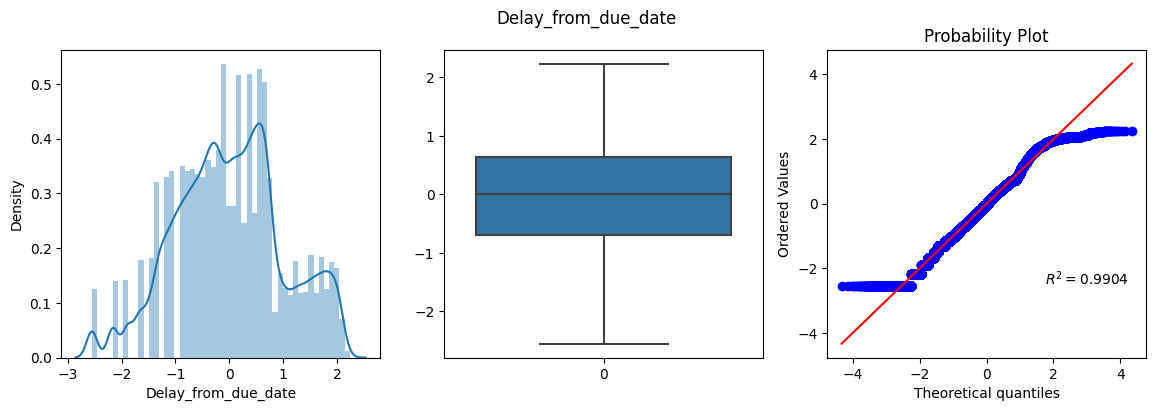

Skewness of Num_Credit_Inquiries: -0.18429135391023854
Kurtosis of Num_Credit_Inquiries: 2.026727365211061


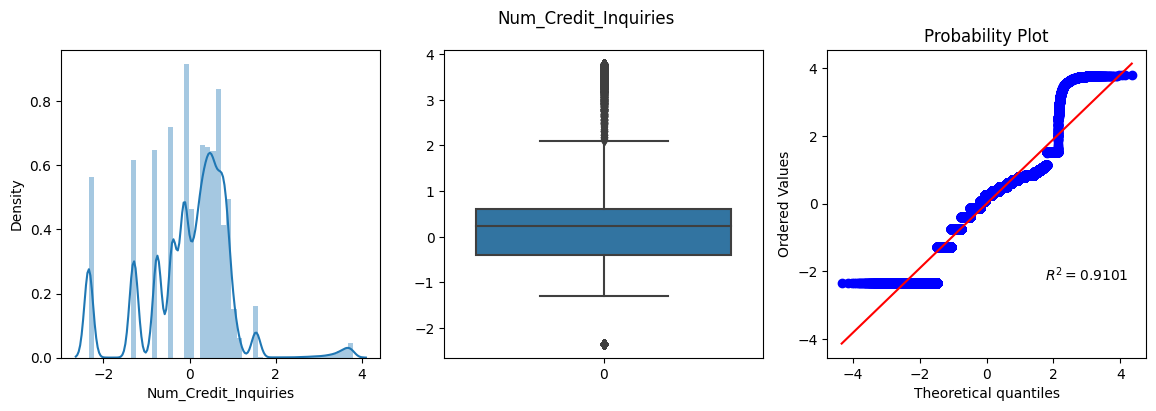

Skewness of Credit_Utilization_Ratio: 0.02824152097518821
Kurtosis of Credit_Utilization_Ratio: -0.9451947720878859


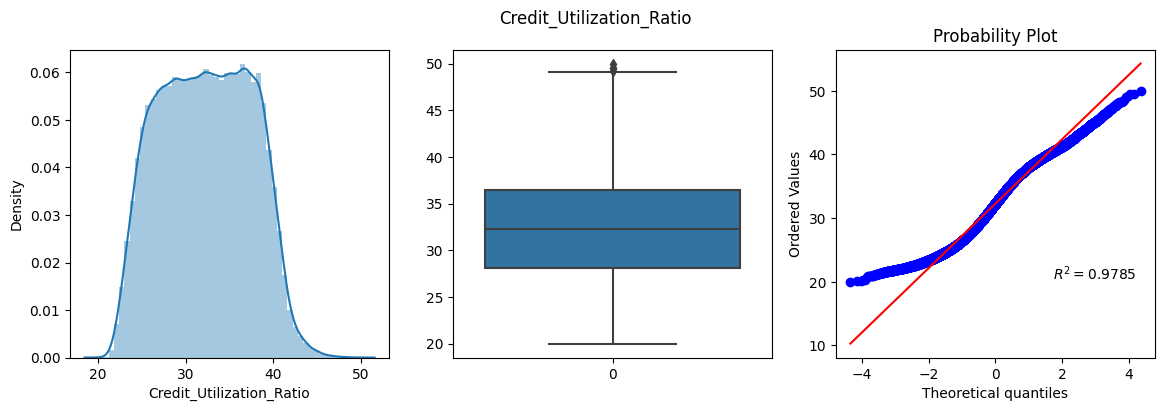

Skewness of Total_EMI_per_month: -0.026122360279588298
Kurtosis of Total_EMI_per_month: 2.3941462681340693


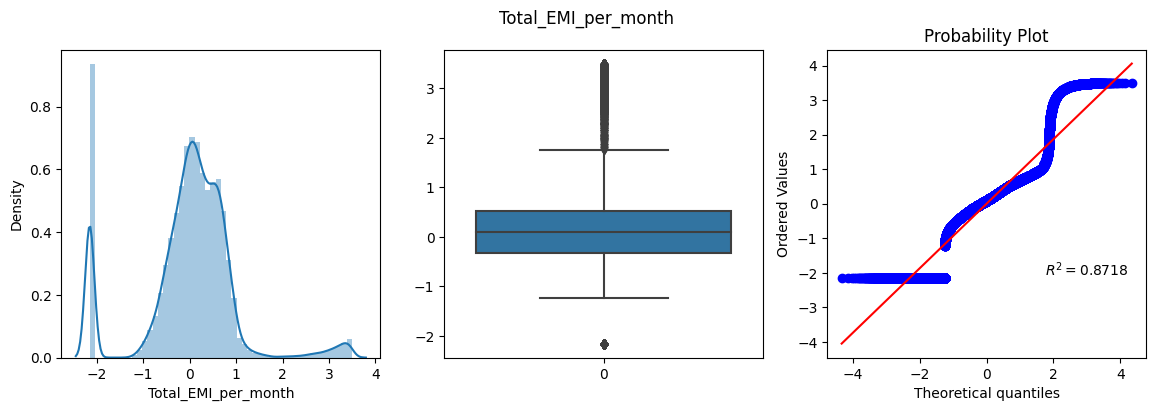

In [22]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show();

It is eloquently evident that all the highly skewed features are relatively more closer to the normal distribution.

### Outlier Treatment

In [23]:
# Capping the outliers with the extreme values in the data distribution range: Winsorization
def treat_outliers(col):
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR   
    return np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [24]:
outlier_cols = ['Total_EMI_per_month','Credit_Utilization_Ratio','Num_Credit_Inquiries','Interest_Rate','Num_Credit_Card']

for col in outlier_cols:
    df[col] = treat_outliers(col)

Skewness of Monthly_Inhand_Salary: -0.025749883234370056
Kurtosis of Monthly_Inhand_Salary: -0.5626355092173378


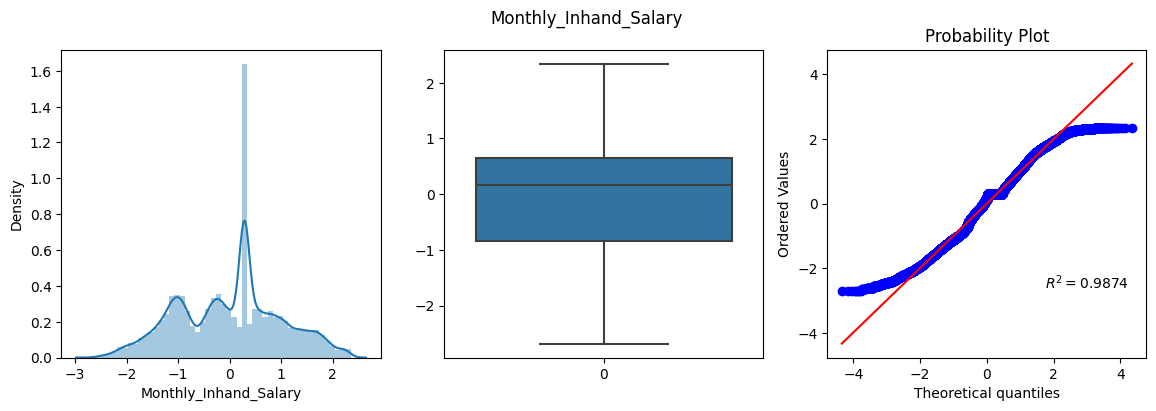

Skewness of Num_Bank_Accounts: 4.5230731800792645
Kurtosis of Num_Bank_Accounts: 18.458562436436704


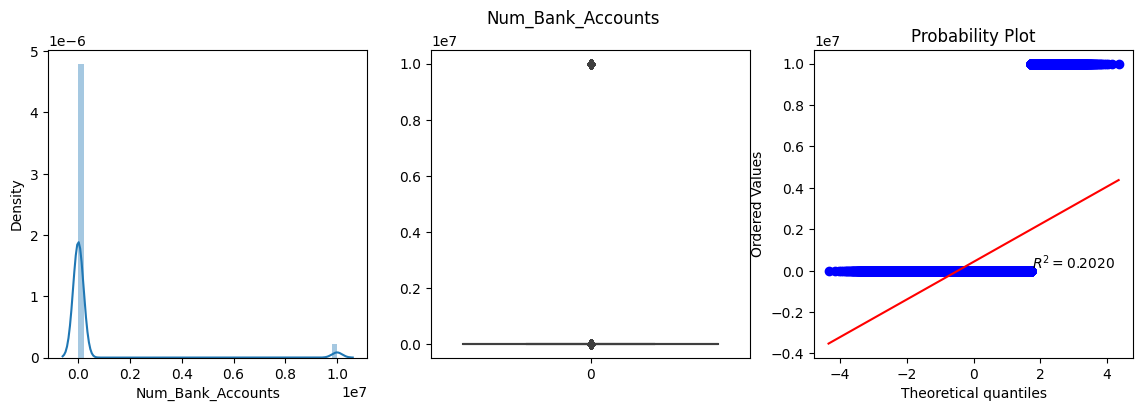

Skewness of Num_Credit_Card: -0.3801526683290456
Kurtosis of Num_Credit_Card: 0.4658279502442966


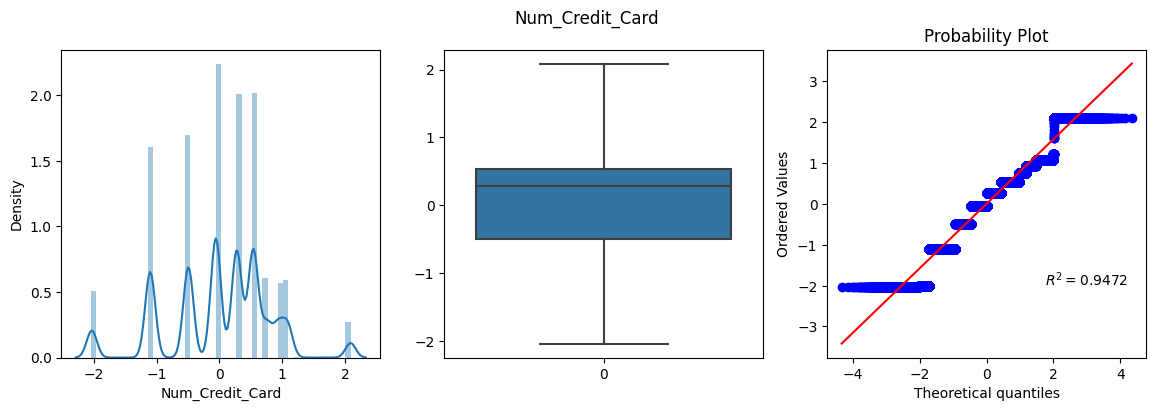

Skewness of Interest_Rate: -0.4834443296065442
Kurtosis of Interest_Rate: 0.07737925945951618


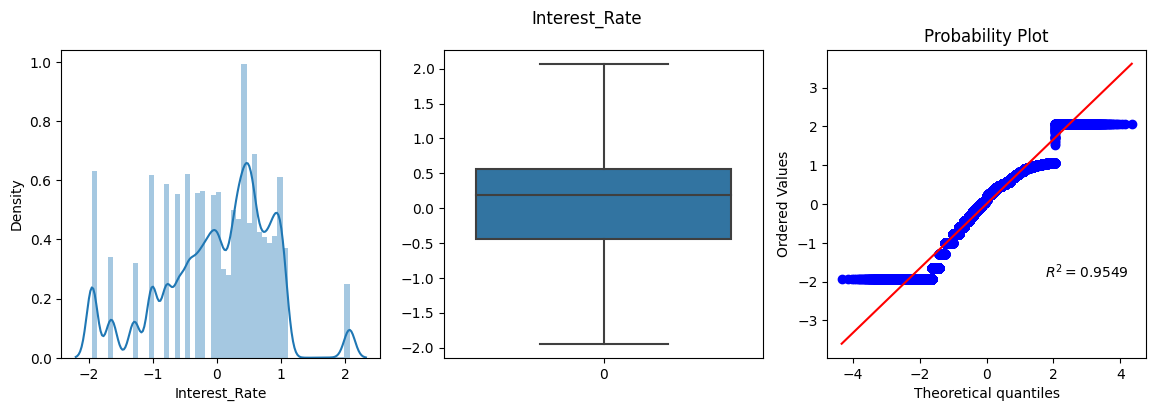

Skewness of Delay_from_due_date: -0.027433049629658812
Kurtosis of Delay_from_due_date: -0.3165881921151965


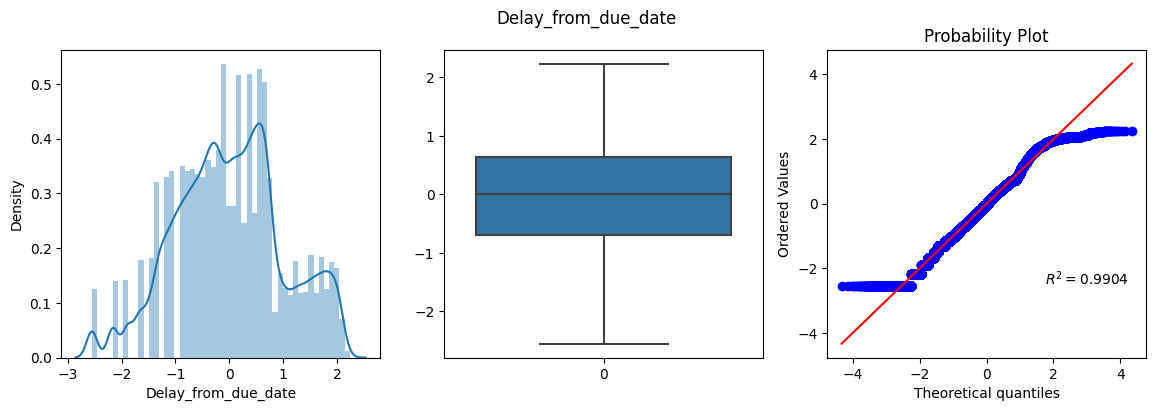

Skewness of Num_Credit_Inquiries: -0.5121840277464517
Kurtosis of Num_Credit_Inquiries: 0.06529177943713105


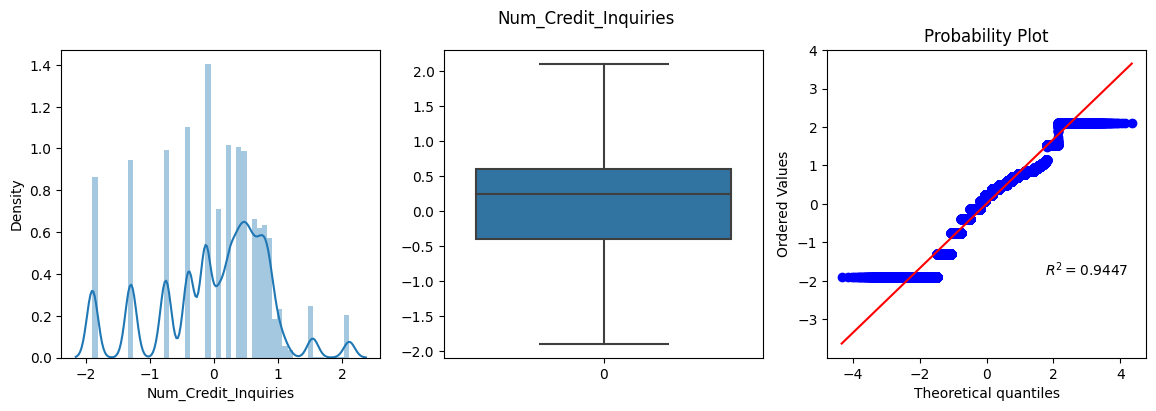

Skewness of Credit_Utilization_Ratio: 0.02813964876002828
Kurtosis of Credit_Utilization_Ratio: -0.9456075439505947


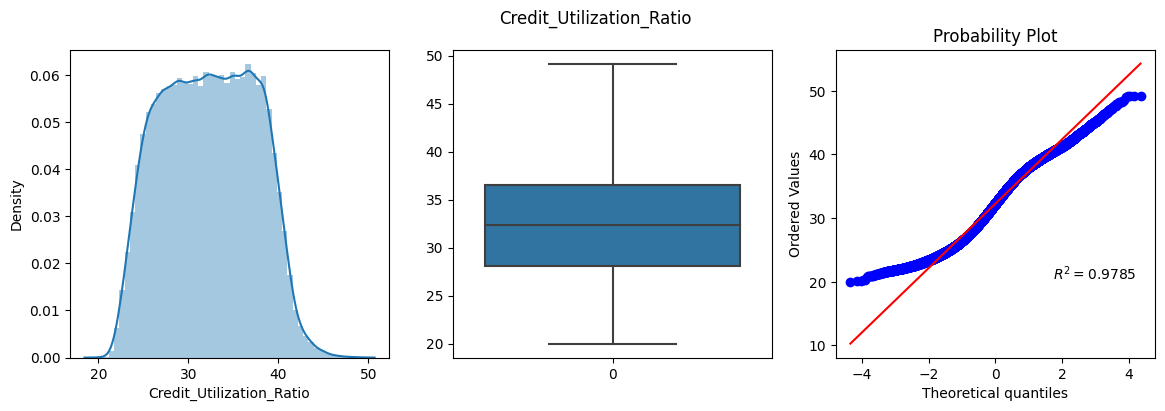

Skewness of Total_EMI_per_month: -0.4363164946399576
Kurtosis of Total_EMI_per_month: 0.38329475088448284


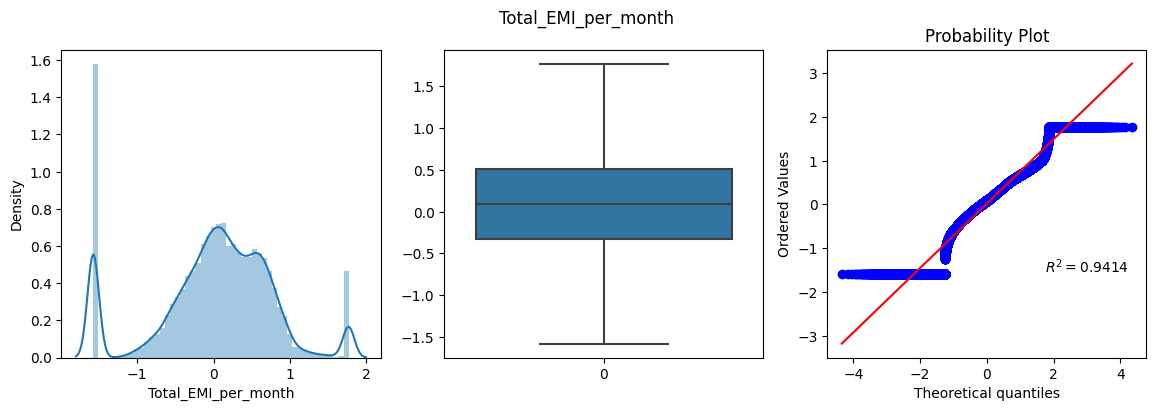

In [25]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show();

Perfect! All the outliers have been removed by applying the winsorization technique.

### Data Preprocessing

In [26]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [27]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)
df.head()

ID Customer_ID    Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40    March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40    April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40      May  Aaron Maashoh    23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40     June  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12              -0.810562           0.333333  ...         NaN   
2      19114.12               0.283245           0.333333  ...        Good   
3      19114.12               0.283245           0.333333  ...        Good   
4      19114.12              -0.810562           0.333333  ...        Good   
5      19114.12               0.283245           0.333333  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   
5            809.98                27.262259  22 Years and 6 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           -0.077036       80.41529543900253   
2                     No           -0.077036         81.699521264648   
3                     No           -0.077036       199.4580743910713   
4                     No           -0.077036      41.420153086217326   
5                     No           -0.077036      62.430172331195294   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  
5                               NaN   340.4792117872438         Good  

[5 rows x 28 columns]

In [28]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [29]:
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.apply(lambda x: re.search('\d+',x).group()).astype(np.int64)
df.Num_of_Loan = df.Num_of_Loan.apply(lambda x: re.search('\d+',x).group()).astype(np.int64)
df.Outstanding_Debt = df.Outstanding_Debt.apply(lambda x: re.search('\d+.\d+',x).group()).astype(np.float64)
df.Annual_Income = df.Annual_Income.apply(lambda x: re.search('\d+.\d+',str(x)).group()).astype(np.float64)
df.SSN = df.SSN.apply(lambda x: int(''.join(x.split('-'))) if pd.notna(x) else x).astype(np.float64)
df.ID = df.ID.apply(lambda x: int(x,16)).astype(np.int64)
df.Customer_ID = df.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)
df.Credit_History_Age = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)
df.Type_of_Loan = df.Type_of_Loan.apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [30]:
df.Month = pd.to_datetime(df.Month,format="%B").dt.month
df.Month = df.Month.astype(np.int64)

In [31]:
df.Amount_invested_monthly = df.Amount_invested_monthly.apply(lambda x: re.search('(\d+(?:\.\d+)?)',str(x)).group() if pd.notna(x) else x).astype(np.float64)
df.Monthly_Balance = df.Monthly_Balance.apply(lambda x: re.search('(\d+(?:\.\d+)?)',str(x)).group() if pd.notna(x) else x).astype(np.float64)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.apply(lambda x: re.search('(\d+(?:\.\d+)?)',str(x)).group() if pd.notna(x) else x).astype(np.float64)

In [32]:
df.Age = df.Age.apply(lambda x: re.search('\d+',x).group() if pd.notna(x) else x).astype(np.int64)
df[df.Age <= 120].shape

(96631, 28)

### Categorical Encoding

In [33]:
counts = df.Name.value_counts()
counts

Langep                9958
Stevex                  44
Vaughanl                39
Deepa Seetharamanm      38
Jessicad                38
                      ... 
ewichp                   3
Timothyl                 3
Aileen Wangg             2
Alina Selyukhi           2
Margaretf                2
Name: Name, Length: 10128, dtype: int64

In [34]:
threshold = 36
remaining_categories = counts[counts <= threshold].index
names_encoded = pd.get_dummies(df.Name.replace(remaining_categories,'Uncommon_Customers'))
df = pd.concat([df,names_encoded],axis=1)
df.head()

ID  Customer_ID  Month           Name  Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  500  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265.0  Scientist   
5  5639         3392      6  Aaron Maashoh   23  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12              -0.810562           0.333333  ...   
2       19114.12               0.283245           0.333333  ...   
3       19114.12               0.283245           0.333333  ...   
4       19114.12              -0.810562           0.333333  ...   
5       19114.12               0.283245           0.333333  ...   

   Jonathan Stempelr  Langep  Lucia Mutikanip Nate Raymondw  Nicko  Raymondr  \
0                  0       0                0             0      0         0   
2                  0       0                0             0      0         0   
3                  0       0                0             0      0         0   
4                  0       0                0             0      0         0   
5                  0       0                0             0      0         0   

   Stevex  Strupczewskid Uncommon_Customers  Vaughanl  
0       0              0                  1         0  
2       0              0                  1         0  
3       0              0                  1         0  
4       0              0                  1         0  
5       0              0                  1         0  

[5 rows x 43 columns]

In [35]:
df[names_encoded.columns] = df[names_encoded.columns].astype(np.int64)

In [37]:
temp = df.copy() ## Creating a copy of the dataset to save its current state
temp.head()

ID  Customer_ID  Month           Name  Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  500  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265.0  Scientist   
5  5639         3392      6  Aaron Maashoh   23  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12              -0.810562           0.333333  ...   
2       19114.12               0.283245           0.333333  ...   
3       19114.12               0.283245           0.333333  ...   
4       19114.12              -0.810562           0.333333  ...   
5       19114.12               0.283245           0.333333  ...   

   Jonathan Stempelr  Langep  Lucia Mutikanip Nate Raymondw  Nicko  Raymondr  \
0                  0       0                0             0      0         0   
2                  0       0                0             0      0         0   
3                  0       0                0             0      0         0   
4                  0       0                0             0      0         0   
5                  0       0                0             0      0         0   

   Stevex  Strupczewskid Uncommon_Customers  Vaughanl  
0       0              0                  1         0  
2       0              0                  1         0  
3       0              0                  1         0  
4       0              0                  1         0  
5       0              0                  1         0  

[5 rows x 43 columns]

In [38]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                          5529
Occupation                   7007
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2084
Num_Credit_Inquiries            0
Credit_Mix                  20079
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4455
Payment_Behaviour            7551
Monthly_Balance              1192
Credit_Score                    0
Danielz                         0
Deepa Seethara

In [39]:
missing_value_cols = ['SSN','Changed_Credit_Limit','Amount_invested_monthly','Monthly_Balance','Occupation','Credit_Mix','Payment_Behaviour']


for col in missing_value_cols:
    if df[col].dtypes == object:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])
    else:
        imputer = IterativeImputer()
        df[col] = imputer.fit_transform(df[[col]])

In [40]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Danielz                     0
Deepa Seetharamanm          0
Jessica Wohlt               0
Jessicad                    0
Johnc                       0
Jonathan S

In [41]:
df = temp
temp = df.copy()
df.head()

ID  Customer_ID  Month           Name  Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  500  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265.0  Scientist   
5  5639         3392      6  Aaron Maashoh   23  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12              -0.810562           0.333333  ...   
2       19114.12               0.283245           0.333333  ...   
3       19114.12               0.283245           0.333333  ...   
4       19114.12              -0.810562           0.333333  ...   
5       19114.12               0.283245           0.333333  ...   

   Jonathan Stempelr  Langep  Lucia Mutikanip Nate Raymondw  Nicko  Raymondr  \
0                  0       0                0             0      0         0   
2                  0       0                0             0      0         0   
3                  0       0                0             0      0         0   
4                  0       0                0             0      0         0   
5                  0       0                0             0      0         0   

   Stevex  Strupczewskid Uncommon_Customers  Vaughanl  
0       0              0                  1         0  
2       0              0                  1         0  
3       0              0                  1         0  
4       0              0                  1         0  
5       0              0                  1         0  

[5 rows x 43 columns]

In [42]:
missing_value_cols = ['SSN','Occupation','Changed_Credit_Limit','Credit_Mix','Amount_invested_monthly','Payment_Behaviour','Monthly_Balance']


for col in missing_value_cols:
    if df[col].dtypes == object:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])
    else:
        imputer = IterativeImputer()
        df[col] = imputer.fit_transform(df[[col]])

In [43]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Danielz                     0
Deepa Seetharamanm          0
Jessica Wohlt               0
Jessicad                    0
Johnc                       0
Jonathan S

In [44]:
credit_mix_encoder = OrdinalEncoder(categories=[['_','Bad','Standard','Good']])
df.Credit_Mix = credit_mix_encoder.fit_transform(df[['Credit_Mix']])
df.Credit_Mix

0        2.0
2        3.0
3        3.0
4        3.0
5        3.0
        ... 
99995    2.0
99996    2.0
99997    3.0
99998    3.0
99999    3.0
Name: Credit_Mix, Length: 99388, dtype: float64

In [45]:
payment_of_min_amount_encoder = OrdinalEncoder(categories=[['NM','No','Yes']])
df.Payment_of_Min_Amount = payment_of_min_amount_encoder.fit_transform(df[['Payment_of_Min_Amount']])
df.Payment_of_Min_Amount

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: Payment_of_Min_Amount, Length: 99388, dtype: float64

In [46]:
payment_behaviour_encoder = OrdinalEncoder(categories=[['Low_spent_Small_value_payments', 'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments', 'High_spent_Large_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments']])
df.Payment_Behaviour = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])
df.Payment_Behaviour

0        4.0
2        2.0
3        0.0
4        1.0
5        0.0
        ... 
99995    3.0
99996    1.0
99997    3.0
99998    5.0
99999    0.0
Name: Payment_Behaviour, Length: 99388, dtype: float64

In [47]:
df.Credit_Mix = df.Credit_Mix.astype(np.float64)
df.Payment_Behaviour = df.Payment_Behaviour.astype(np.float64)
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.astype(np.float64)

#### Occupation

In [48]:
occ_encoded = pd.get_dummies(df.Occupation,drop_first=True,sparse=False,dtype=np.int64)
df = pd.concat([df,occ_encoded],axis=1)
df.head()

ID  Customer_ID  Month           Name  Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  500  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265.0  Scientist   
5  5639         3392      6  Aaron Maashoh   23  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Entrepreneur  \
0       19114.12              -0.810562           0.333333  ...             0   
2       19114.12               0.283245           0.333333  ...             0   
3       19114.12               0.283245           0.333333  ...             0   
4       19114.12              -0.810562           0.333333  ...             0   
5       19114.12               0.283245           0.333333  ...             0   

   Journalist  Lawyer Manager  Mechanic  Media_Manager  Musician  Scientist  \
0           0       0       0         0              0         0          1   
2           0       0       0         0              0         0          1   
3           0       0       0         0              0         0          1   
4           0       0       0         0              0         0          1   
5           0       0       0         0              0         0          1   

   Teacher  Writer  
0        0       0  
2        0       0  
3        0       0  
4        0       0  
5        0       0  

[5 rows x 57 columns]

In [49]:
df.drop('Occupation',axis=1,inplace=True)

In [50]:
temp = df.copy()

#### Name

In [51]:
counts = df.Name.value_counts()
counts

Langep                9958
Stevex                  44
Vaughanl                39
Deepa Seetharamanm      38
Jessicad                38
                      ... 
ewichp                   3
Timothyl                 3
Aileen Wangg             2
Alina Selyukhi           2
Margaretf                2
Name: Name, Length: 10128, dtype: int64

In [52]:
threshold = 36
remaining_categories = counts[counts <= threshold].index
names_encoded = pd.get_dummies(df.Name.replace(remaining_categories,'Uncommon_Customer'),dtype=np.int64)
names_encoded

Danielz  Deepa Seetharamanm  Jessica Wohlt  Jessicad  Johnc  \
0            0                   0              0         0      0   
2            0                   0              0         0      0   
3            0                   0              0         0      0   
4            0                   0              0         0      0   
5            0                   0              0         0      0   
...        ...                 ...            ...       ...    ...   
99995        0                   0              0         0      0   
99996        0                   0              0         0      0   
99997        0                   0              0         0      0   
99998        0                   0              0         0      0   
99999        0                   0              0         0      0   

       Jonathan Stempelr  Langep  Lucia Mutikanip  Nate Raymondw  Nicko  \
0                      0       0                0              0      0   
2                      0       0                0              0      0   
3                      0       0                0              0      0   
4                      0       0                0              0      0   
5                      0       0                0              0      0   
...                  ...     ...              ...            ...    ...   
99995                  0       0                0              0      0   
99996                  0       0                0              0      0   
99997                  0       0                0              0      0   
99998                  0       0                0              0      0   
99999                  0       0                0              0      0   

       Raymondr  Stevex  Strupczewskid  Uncommon_Customer  Vaughanl  
0             0       0              0                  1         0  
2             0       0              0                  1         0  
3             0       0              0                  1         0  
4             0       0              0                  1         0  
5             0       0              0                  1         0  
...         ...     ...            ...                ...       ...  
99995         0       0              0                  1         0  
99996         0       0              0                  1         0  
99997         0       0              0                  1         0  
99998         0       0              0                  1         0  
99999         0       0              0                  1         0  

[99388 rows x 15 columns]

In [53]:
df = pd.concat([df,names_encoded],axis=1)
df.head()

ID  Customer_ID  Month           Name  Age          SSN  Annual_Income  \
0  5634         3392      1  Aaron Maashoh   23  821000265.0       19114.12   
2  5636         3392      3  Aaron Maashoh  500  821000265.0       19114.12   
3  5637         3392      4  Aaron Maashoh   23  821000265.0       19114.12   
4  5638         3392      5  Aaron Maashoh   23  821000265.0       19114.12   
5  5639         3392      6  Aaron Maashoh   23  821000265.0       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  \
0              -0.810562           0.333333        -0.493833  ...   
2               0.283245           0.333333        -0.493833  ...   
3               0.283245           0.333333        -0.493833  ...   
4              -0.810562           0.333333        -0.493833  ...   
5               0.283245           0.333333        -0.493833  ...   

   Jonathan Stempelr  Langep Lucia Mutikanip  Nate Raymondw  Nicko  Raymondr  \
0                  0       0               0              0      0         0   
2                  0       0               0              0      0         0   
3                  0       0               0              0      0         0   
4                  0       0               0              0      0         0   
5                  0       0               0              0      0         0   

   Stevex  Strupczewskid  Uncommon_Customer  Vaughanl  
0       0              0                  1         0  
2       0              0                  1         0  
3       0              0                  1         0  
4       0              0                  1         0  
5       0              0                  1         0  

[5 rows x 71 columns]

In [54]:
df.drop('Name',axis=1,inplace=True)

#### Type of Loan

In [55]:
counts = df.Type_of_Loan.value_counts()
counts

not specified                                                              12659
credit-builder loan                                                         1267
personal loan                                                               1261
debt consolidation loan                                                     1243
student loan                                                                1217
                                                                           ...  
payday loan,credit-builder loan,payday loan,mortgage loan                      6
auto loan,student loan,debt consolidation loan,student loan                    6
credit-builder loan,credit-builder loan,credit-builder loan,payday loan        5
debt consolidation loan,credit-builder loan,not specified                      5
home equity loan,debt consolidation loan,student loan                          4
Name: Type_of_Loan, Length: 6260, dtype: int64

In [56]:
threshold = 1000
remaining_categories = counts[counts <= threshold].index
loan_type_encoded = pd.get_dummies(df.Type_of_Loan.replace(remaining_categories,'Uncommon_Loan_Type'),dtype=np.int64)
loan_type_encoded

Uncommon_Loan_Type  auto loan  credit-builder loan  \
0                       1          0                    0   
2                       1          0                    0   
3                       1          0                    0   
4                       1          0                    0   
5                       1          0                    0   
...                   ...        ...                  ...   
99995                   1          0                    0   
99996                   1          0                    0   
99997                   1          0                    0   
99998                   1          0                    0   
99999                   1          0                    0   

       debt consolidation loan  home equity loan  mortgage loan  \
0                            0                 0              0   
2                            0                 0              0   
3                            0                 0              0   
4                            0                 0              0   
5                            0                 0              0   
...                        ...               ...            ...   
99995                        0                 0              0   
99996                        0                 0              0   
99997                        0                 0              0   
99998                        0                 0              0   
99999                        0                 0              0   

       not specified  payday loan  personal loan  student loan  
0                  0            0              0             0  
2                  0            0              0             0  
3                  0            0              0             0  
4                  0            0              0             0  
5                  0            0              0             0  
...              ...          ...            ...           ...  
99995              0            0              0             0  
99996              0            0              0             0  
99997              0            0              0             0  
99998              0            0              0             0  
99999              0            0              0             0  

[99388 rows x 10 columns]

In [57]:
df = pd.concat([df,loan_type_encoded],axis=1)
df.head()

ID  Customer_ID  Month  Age          SSN  Annual_Income  \
0  5634         3392      1   23  821000265.0       19114.12   
2  5636         3392      3  500  821000265.0       19114.12   
3  5637         3392      4   23  821000265.0       19114.12   
4  5638         3392      5   23  821000265.0       19114.12   
5  5639         3392      6   23  821000265.0       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0              -0.810562           0.333333        -0.493833      -1.646128   
2               0.283245           0.333333        -0.493833      -1.646128   
3               0.283245           0.333333        -0.493833      -1.646128   
4              -0.810562           0.333333        -0.493833      -1.646128   
5               0.283245           0.333333        -0.493833      -1.646128   

   ...  Uncommon_Loan_Type auto loan  credit-builder loan  \
0  ...                   1         0                    0   
2  ...                   1         0                    0   
3  ...                   1         0                    0   
4  ...                   1         0                    0   
5  ...                   1         0                    0   

   debt consolidation loan  home equity loan  mortgage loan  not specified  \
0                        0                 0              0              0   
2                        0                 0              0              0   
3                        0                 0              0              0   
4                        0                 0              0              0   
5                        0                 0              0              0   

   payday loan  personal loan  student loan  
0            0              0             0  
2            0              0             0  
3            0              0             0  
4            0              0             0  
5            0              0             0  

[5 rows x 80 columns]

In [58]:
df.drop('Type_of_Loan',axis=1,inplace=True)

### Feature Splitting

In [59]:
X = df.drop('Credit_Score',axis=1)
y = df.Credit_Score

### Balancing out the imbalanced classes using the SMOTE technique

In [60]:
smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [61]:
y.value_counts()

Good        52955
Standard    52955
Poor        52955
Name: Credit_Score, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=101)

### Feature Selection

In [63]:
kbest = SelectKBest(k=12,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest(k=12)

In [64]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Uncommon_Loan_Type', 'not specified'], dtype=object)

In [65]:
percentile = SelectPercentile(percentile=20,score_func=f_classif)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=20)

In [66]:
selected_features = percentile.get_feature_names_out()
selected_features

array(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Langep', 'Langep', 'Uncommon_Loan_Type',
       'not specified'], dtype=object)

In [67]:
sfm = SelectFromModel(estimator=RandomForestClassifier(),max_features=12,threshold='1.25*mean')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=12,
                threshold='1.25*mean')

In [68]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['ID', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount'],
      dtype=object)

In [69]:
final_selected_features = ['Annual_Income','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Credit_Mix',
                           'Monthly_Balance','Credit_History_Age','Num_Credit_Inquiries','Changed_Credit_Limit','Num_of_Delayed_Payment',
                           'Outstanding_Debt','Monthly_Inhand_Salary','Payment_of_Min_Amount','Uncommon_Loan_Type','Total_EMI_per_month','Payment_Behaviour']
final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

### Feature Scaling and Normalization

In [70]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)
final_X_train.head()

Annual_Income  Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
0      -0.101194        -0.503592      -1.032763            -0.929609   
1      -0.108643         0.005595       0.976385             0.643512   
2      -0.091684         0.707507      -2.116229            -2.028231   
3      -0.117804         0.397386       0.670387             0.150716   
4      -0.117304         0.960335       1.134211             1.485642   

   Credit_Mix  Monthly_Balance  Credit_History_Age  Num_Credit_Inquiries  \
0   -0.192895        -0.008605            0.379778              0.132331   
1   -0.202250        -0.008605           -0.352170              0.959914   
2    1.268498        -0.008605            0.319848              0.753387   
3   -1.672999        -0.008605           -0.565509              1.269576   
4   -0.202250        -0.008605           -0.970853              0.959914   

   Changed_Credit_Limit  Num_of_Delayed_Payment  Outstanding_Debt  \
0             -0.170358               -0.079526         -0.832706   
1             -0.316634               -0.074326          0.751355   
2             -0.004044               -0.105528         -1.081922   
3             -0.757102               -0.037923          2.779772   
4             -0.338736               -0.043124          0.094357   

   Monthly_Inhand_Salary  Payment_of_Min_Amount  Uncommon_Loan_Type  \
0              -0.357381              -0.512501           -1.723424   
1              -1.001073               1.003409            0.580240   
2               0.247995              -0.512501            0.580240   
3              -1.779349               1.003409            0.580240   
4              -2.247281               1.003409            0.580240   

   Total_EMI_per_month  Payment_Behaviour  
0            -2.115677          -1.137139  
1             0.234740           1.932379  
2            -0.093200           0.701440  
3            -0.231352           0.085970  
4            -0.301858          -1.144969

### Target Label Encoding

In [71]:
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

In [72]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [73]:
label_integer_mapping = get_integer_mapping(encoder)
label_integer_mapping

{'Good': 0, 'Poor': 1, 'Standard': 2}

## Model Training & Evaluation

In [74]:
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [75]:
def train_and_evaluate_model(model):
    model.fit(final_X_train,y_train)
    y_pred = model.predict(final_X_test)
    print(classification_report(y_test,y_pred))
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    recall = recall_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.show();
    model_names.append(model)
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

              precision    recall  f1-score   support

           0       0.71      0.79      0.74     16052
           1       0.70      0.70      0.70     15823
           2       0.62      0.55      0.58     15785

    accuracy                           0.68     47660
   macro avg       0.67      0.68      0.67     47660
weighted avg       0.67      0.68      0.67     47660



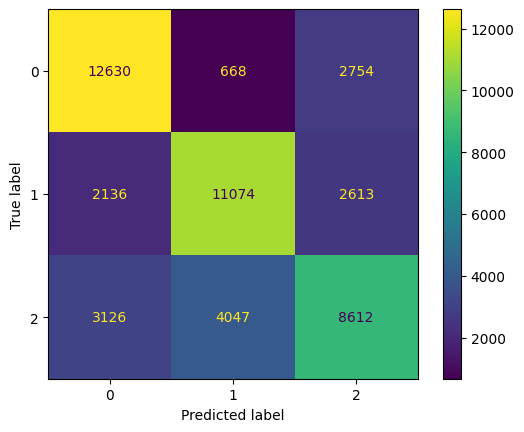

In [76]:
train_and_evaluate_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.76      0.89      0.82     16052
           1       0.77      0.81      0.79     15823
           2       0.75      0.59      0.66     15785

    accuracy                           0.76     47660
   macro avg       0.76      0.76      0.76     47660
weighted avg       0.76      0.76      0.76     47660



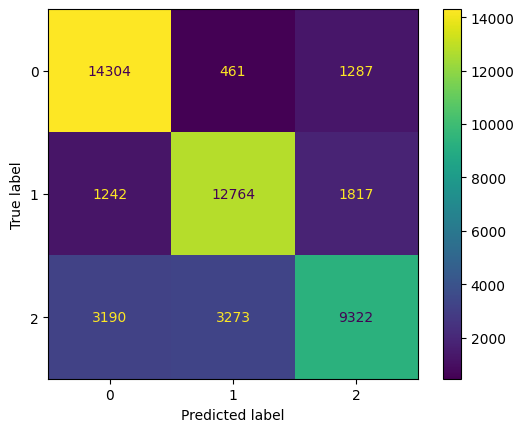

In [77]:
train_and_evaluate_model(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.63      0.88      0.73     16052
           1       0.63      0.78      0.70     15823
           2       0.70      0.24      0.36     15785

    accuracy                           0.64     47660
   macro avg       0.65      0.64      0.60     47660
weighted avg       0.65      0.64      0.60     47660



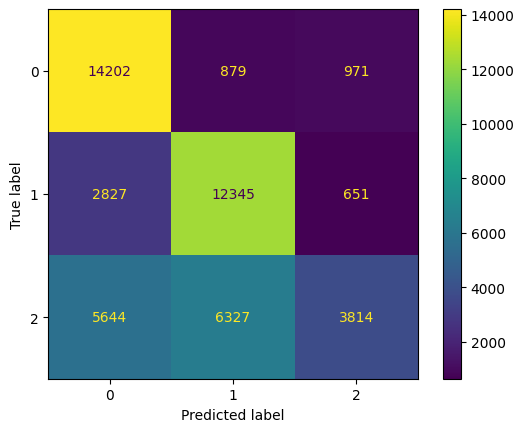

In [78]:
train_and_evaluate_model(GaussianNB())

              precision    recall  f1-score   support

           0       0.67      0.85      0.75     16052
           1       0.68      0.77      0.72     15823
           2       0.69      0.42      0.53     15785

    accuracy                           0.68     47660
   macro avg       0.68      0.68      0.67     47660
weighted avg       0.68      0.68      0.67     47660



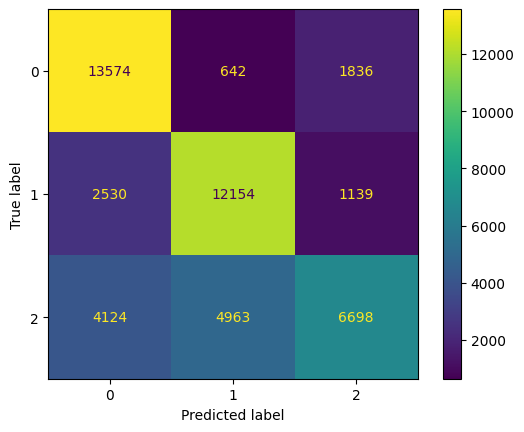

In [79]:
train_and_evaluate_model(BernoulliNB())

              precision    recall  f1-score   support

           0       0.64      0.56      0.60     16052
           1       0.40      0.55      0.46     15823
           2       0.40      0.30      0.34     15785

    accuracy                           0.47     47660
   macro avg       0.48      0.47      0.47     47660
weighted avg       0.48      0.47      0.47     47660



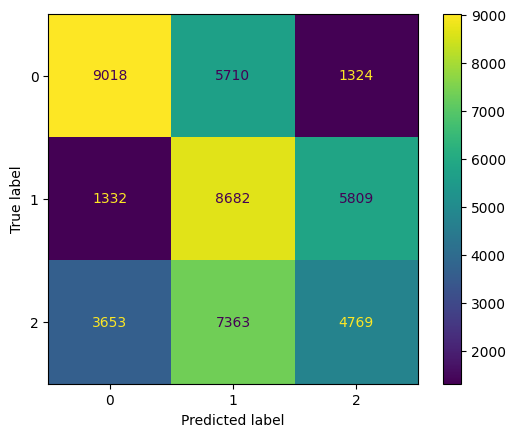

In [80]:
train_and_evaluate_model(PassiveAggressiveClassifier())

              precision    recall  f1-score   support

           0       0.67      0.83      0.74     16052
           1       0.69      0.72      0.71     15823
           2       0.65      0.47      0.54     15785

    accuracy                           0.67     47660
   macro avg       0.67      0.67      0.66     47660
weighted avg       0.67      0.67      0.66     47660



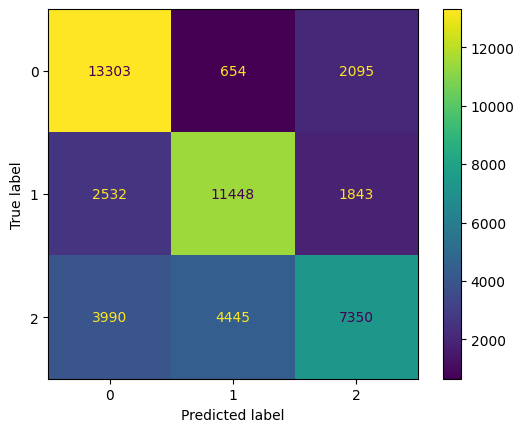

In [81]:
train_and_evaluate_model(RidgeClassifier())

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     16052
           1       0.64      0.79      0.70     15823
           2       0.71      0.37      0.48     15785

    accuracy                           0.67     47660
   macro avg       0.67      0.67      0.65     47660
weighted avg       0.67      0.67      0.65     47660



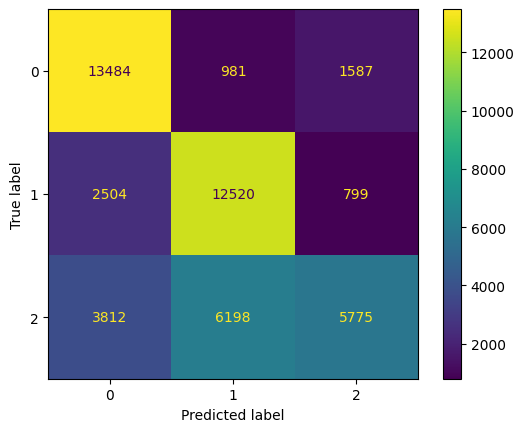

In [82]:
train_and_evaluate_model(SGDClassifier())

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     16052
           1       0.76      0.78      0.77     15823
           2       0.71      0.70      0.70     15785

    accuracy                           0.76     47660
   macro avg       0.76      0.76      0.76     47660
weighted avg       0.76      0.76      0.76     47660



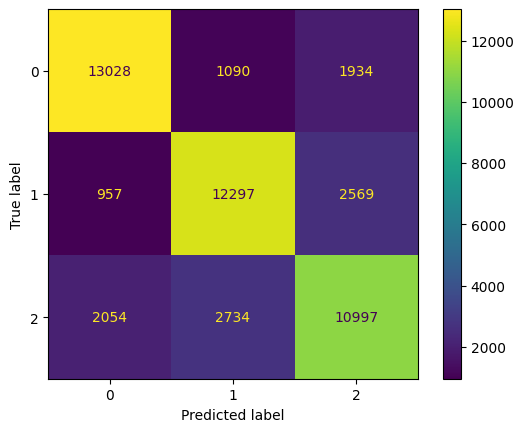

In [83]:
train_and_evaluate_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     16052
           1       0.86      0.86      0.86     15823
           2       0.83      0.76      0.79     15785

    accuracy                           0.85     47660
   macro avg       0.85      0.85      0.85     47660
weighted avg       0.85      0.85      0.85     47660



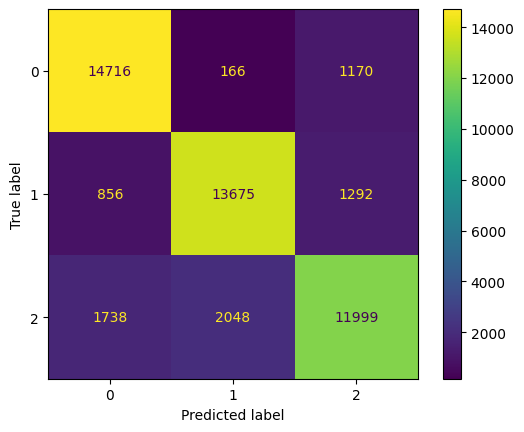

In [84]:
train_and_evaluate_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16052
           1       0.83      0.84      0.84     15823
           2       0.80      0.73      0.76     15785

    accuracy                           0.82     47660
   macro avg       0.82      0.82      0.82     47660
weighted avg       0.82      0.82      0.82     47660



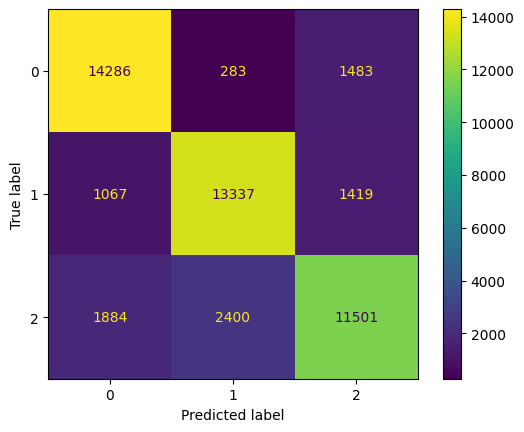

In [85]:
train_and_evaluate_model(BaggingClassifier())

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16052
           1       0.86      0.87      0.87     15823
           2       0.84      0.77      0.80     15785

    accuracy                           0.86     47660
   macro avg       0.85      0.86      0.85     47660
weighted avg       0.86      0.86      0.85     47660



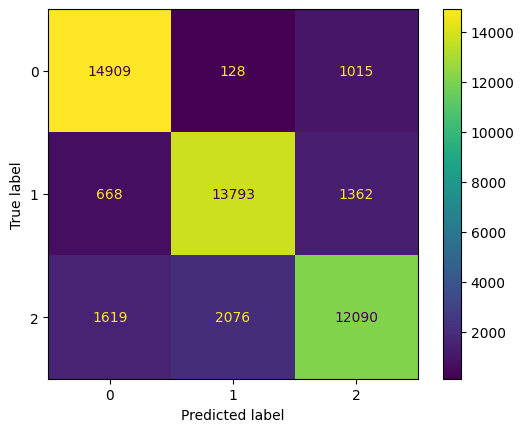

In [86]:
train_and_evaluate_model(ExtraTreesClassifier())

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     16052
           1       0.69      0.72      0.71     15823
           2       0.65      0.49      0.56     15785

    accuracy                           0.68     47660
   macro avg       0.67      0.68      0.67     47660
weighted avg       0.67      0.68      0.67     47660



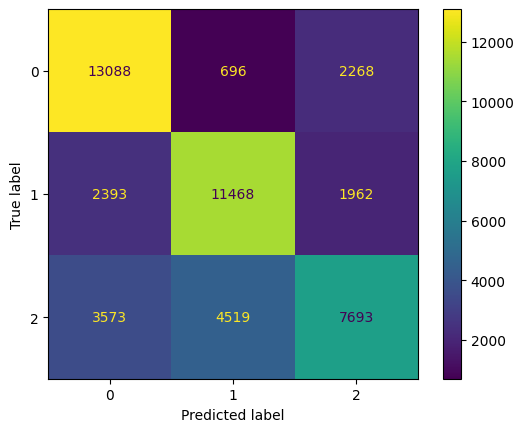

In [87]:
train_and_evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     16052
           1       0.80      0.74      0.77     15823
           2       0.73      0.70      0.72     15785

    accuracy                           0.77     47660
   macro avg       0.77      0.77      0.77     47660
weighted avg       0.77      0.77      0.77     47660



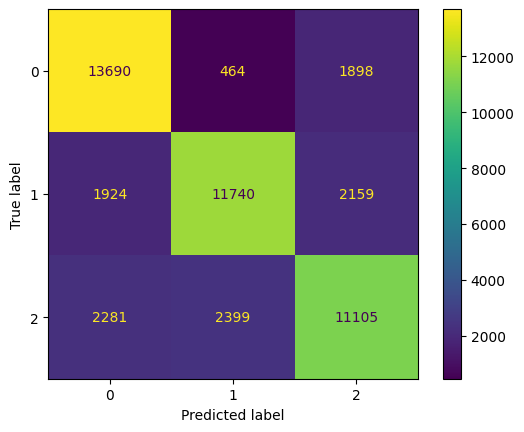

In [88]:
train_and_evaluate_model(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     16052
           1       0.83      0.78      0.81     15823
           2       0.77      0.74      0.75     15785

    accuracy                           0.80     47660
   macro avg       0.80      0.80      0.80     47660
weighted avg       0.80      0.80      0.80     47660



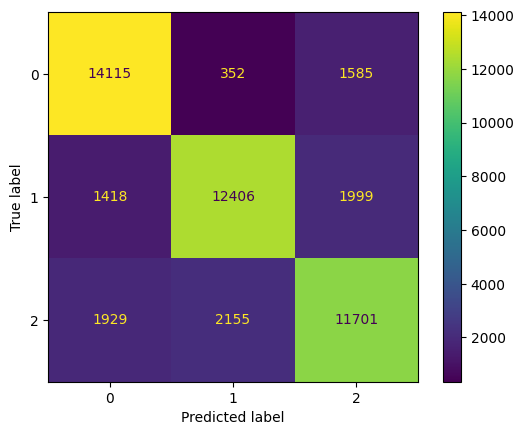

In [89]:
train_and_evaluate_model(HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.74      0.81      0.78     16052
           1       0.73      0.74      0.74     15823
           2       0.70      0.62      0.66     15785

    accuracy                           0.73     47660
   macro avg       0.73      0.73      0.72     47660
weighted avg       0.73      0.73      0.72     47660



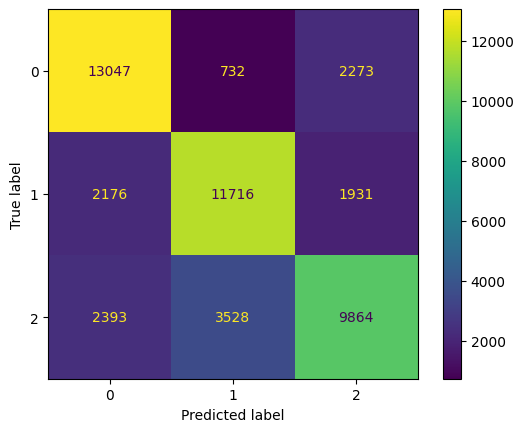

In [90]:
train_and_evaluate_model(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     16052
           1       0.84      0.80      0.82     15823
           2       0.77      0.76      0.76     15785

    accuracy                           0.81     47660
   macro avg       0.81      0.81      0.81     47660
weighted avg       0.81      0.81      0.81     47660



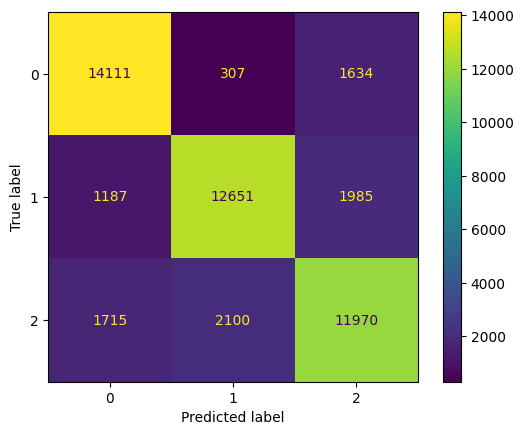

In [91]:
train_and_evaluate_model(XGBClassifier())

              precision    recall  f1-score   support

           0       0.74      0.83      0.79     16052
           1       0.76      0.78      0.77     15823
           2       0.72      0.61      0.66     15785

    accuracy                           0.74     47660
   macro avg       0.74      0.74      0.74     47660
weighted avg       0.74      0.74      0.74     47660



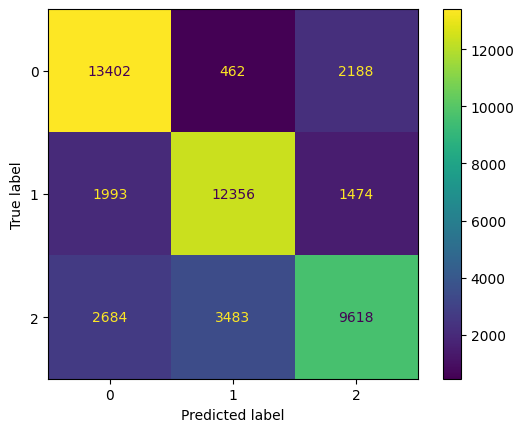

In [92]:
train_and_evaluate_model(XGBRFClassifier())

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     16052
           1       0.83      0.80      0.82     15823
           2       0.77      0.75      0.76     15785

    accuracy                           0.81     47660
   macro avg       0.81      0.81      0.81     47660
weighted avg       0.81      0.81      0.81     47660



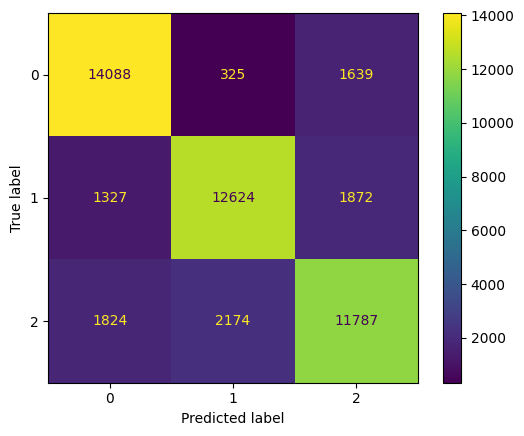

In [93]:
train_and_evaluate_model(CatBoostClassifier(silent=True))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     16052
           1       0.83      0.76      0.80     15823
           2       0.75      0.74      0.75     15785

    accuracy                           0.79     47660
   macro avg       0.79      0.79      0.79     47660
weighted avg       0.79      0.79      0.79     47660



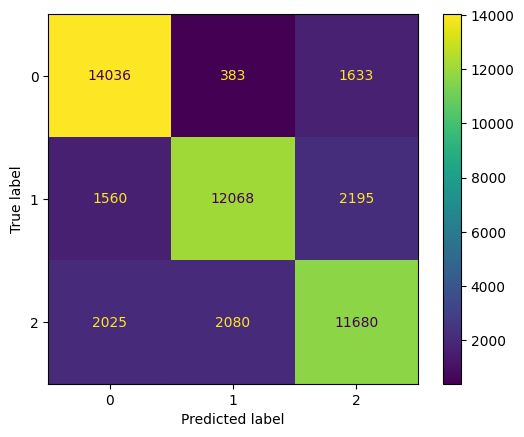

In [94]:
train_and_evaluate_model(LGBMClassifier())

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     16052
           1       0.77      0.75      0.76     15823
           2       0.72      0.64      0.68     15785

    accuracy                           0.75     47660
   macro avg       0.75      0.75      0.74     47660
weighted avg       0.75      0.75      0.74     47660



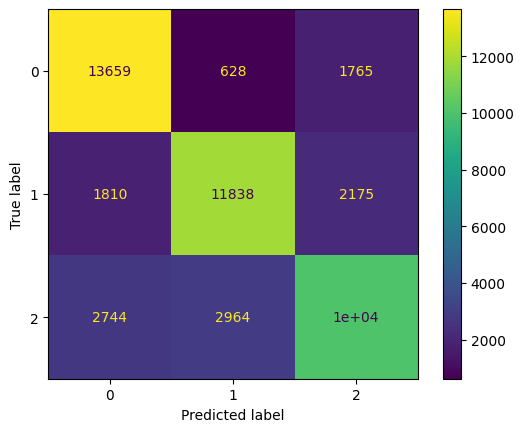

In [95]:
train_and_evaluate_model(MLPClassifier())

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     16052
           1       0.85      0.84      0.85     15823
           2       0.83      0.73      0.78     15785

    accuracy                           0.83     47660
   macro avg       0.83      0.83      0.83     47660
weighted avg       0.83      0.83      0.83     47660



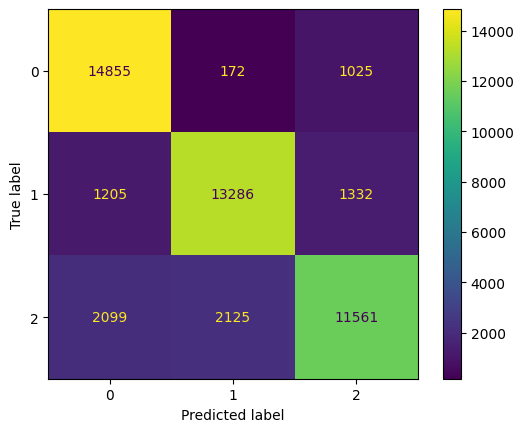

In [96]:
train_and_evaluate_model(VotingClassifier(estimators=[
    ('RF',RandomForestClassifier()),
    ('KNN',KNeighborsClassifier()),
    ('HIST',HistGradientBoostingClassifier())
],voting='hard'))

## Baseline Models Performance Comparison

In [97]:
model_perfs = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   (ExtraTreeClassifier(random_state=1333397631),...  0.855896   0.855896   
1   (DecisionTreeClassifier(max_features='sqrt', r...  0.847461   0.847461   
2   VotingClassifier(estimators=[('RF', RandomFore...  0.833026   0.833026   
3   (DecisionTreeClassifier(random_state=192039009...  0.820898   0.820898   
4   XGBClassifier(base_score=None, booster=None, c...  0.812673   0.812673   
5   <catboost.core.CatBoostClassifier object at 0x...  0.807784   0.807784   
6                    HistGradientBoostingClassifier()  0.801972   0.801972   
7                                    LGBMClassifier()  0.792782   0.792782   
8   ([DecisionTreeRegressor(criterion='friedman_ms...  0.766576   0.766576   
9                              KNeighborsClassifier()  0.763533   0.763533   
10                           DecisionTreeClassifier()  0.762107   0.762107   
11                                    MLPClassifier()  0.746412   0.746412   
12  XGBRFClassifier(base_score=None, booster=None,...  0.742258   0.742258   
13  (DecisionTreeClassifier(max_depth=1, random_st...  0.726542   0.726542   
14                                      BernoulliNB()  0.680361   0.680361   
15                               LogisticRegression()  0.678053   0.678053   
16                                        LinearSVC()  0.676647   0.676647   
17                                  RidgeClassifier()  0.673542   0.673542   
18                                    SGDClassifier()  0.666786   0.666786   
19                                       GaussianNB()  0.637033   0.637033   
20                      PassiveAggressiveClassifier()  0.471444   0.471444   

      Recall        F1  
0   0.855896  0.855896  
1   0.847461  0.847461  
2   0.833026  0.833026  
3   0.820898  0.820898  
4   0.812673  0.812673  
5   0.807784  0.807784  
6   0.801972  0.801972  
7   0.792782  0.792782  
8   0.766576  0.766576  
9   0.763533  0.763533  
10  0.762107  0.762107  
11  0.746412  0.746412  
12  0.742258  0.742258  
13  0.726542  0.726542  
14  0.680361  0.680361  
15  0.678053  0.678053  
16  0.676647  0.676647  
17  0.673542  0.673542  
18  0.666786  0.666786  
19  0.637033  0.637033  
20  0.471444  0.471444

Among the baseline models, the Extra Trees Classifier surpasses all other models by obtaining a superb accuracy score of almost 85.6% on the test set. 

## Hyperparameter Tuning using RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=1.0, loss=categorical_crossentropy; total time=   0.6s
[CV] END ...learning_rate=1.0, loss=categorical_crossentropy; total time=   1.1s
[CV] END ...learning_rate=1.0, loss=categorical_crossentropy; total time=   1.9s
[CV] END ...learning_rate=1.0, loss=categorical_crossentropy; total time=   1.4s
[CV] END ...learning_rate=1.0, loss=categorical_crossentropy; total time=   1.4s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.0s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.0s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.0s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.0s
[CV] END ........learning_rate=0.2, loss=binary_crossentropy; total time=   0.0s
[CV] END .......................learning_rate=0.4, loss=auto; total time=   7.6s
[CV] END .......................learning_rate=0.

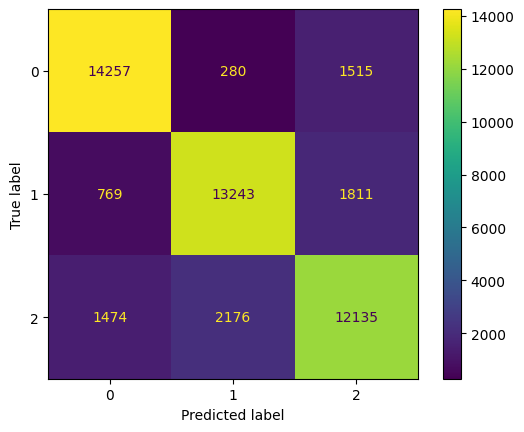

In [98]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy']}
grid_hgb = RandomizedSearchCV(HistGradientBoostingClassifier(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_hgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.5, l1_ratio=0.8, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elas

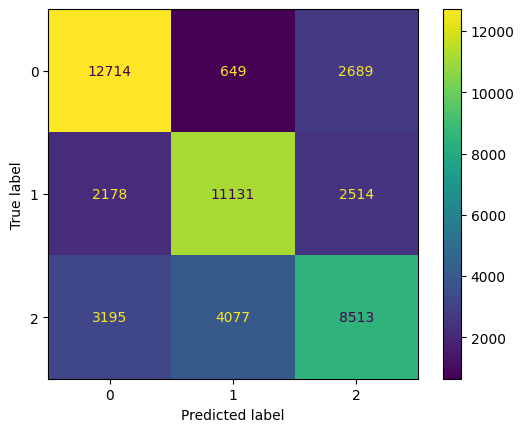

In [99]:
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

grid_lr = RandomizedSearchCV(LogisticRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2;, score=0.735 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2;, score=0.739 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2;, score=0.744 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2;, score=0.742 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2;, score=0.739 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt;, score=0.745 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt;, score=0.734 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt;, score=0.748 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt;, score=0.742 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt;, score=0.733 tot

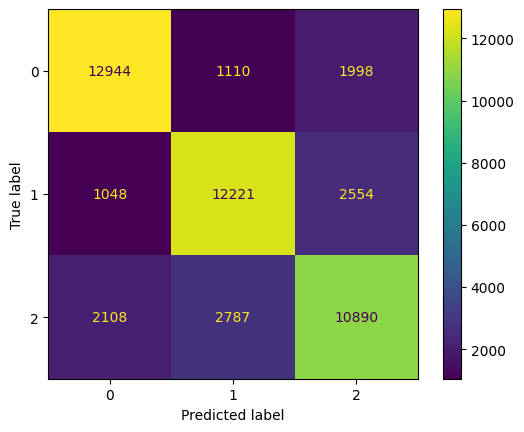

In [100]:
param_grid = {'criterion': ['gini','entropy'],
              'max_features': ['sqrt','log2'],
              'max_depth': [2,12,38,68,98,128,201]
             }

grid_dt = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,verbose=4,cv=5)
train_and_evaluate_model(grid_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=rf, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=200;, score=nan total time=   0.2s
[CV 2/5] END boosting_type=rf, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=200;, score=nan total time=   0.2s
[CV 3/5] END boosting_type=rf, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=200;, score=nan total time=   0.2s
[CV 4/5] END boosting_type=rf, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=200;, score=nan total time=   0.2s
[CV 5/5] END boosting_type=rf, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=1, n_estimators=200;, score=nan total time=   0.2s
[CV 1/5] END boosting_type=gbdt, importance_type=gain, learning_rate=0.4, min_split_gain=0.68, n_estimators=500;, score=0.814 total time=   7.1s
[CV 2/5] END boosting_type=gb

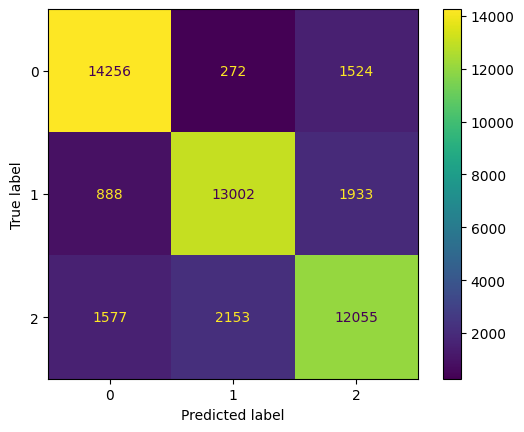

In [101]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
              'learning_rate': np.linspace(0,1,6)[1:],
              'n_estimators': [200,500,600,1000],
              'importance_type': ['split','gain'],
              'min_split_gain': [0.68,0.79,0.87,1]}

grid_lgbm = RandomizedSearchCV(LGBMClassifier(),param_grid,verbose=3)
train_and_evaluate_model(grid_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.2, binarize=0.5, fit_prior=False;, score=0.668 total time=   0.2s
[CV 2/5] END alpha=0.2, binarize=0.5, fit_prior=False;, score=0.670 total time=   0.0s
[CV 3/5] END alpha=0.2, binarize=0.5, fit_prior=False;, score=0.670 total time=   0.0s
[CV 4/5] END alpha=0.2, binarize=0.5, fit_prior=False;, score=0.670 total time=   0.0s
[CV 5/5] END alpha=0.2, binarize=0.5, fit_prior=False;, score=0.667 total time=   0.0s
[CV 1/5] END alpha=1.0, binarize=1.0, fit_prior=False;, score=0.642 total time=   0.0s
[CV 2/5] END alpha=1.0, binarize=1.0, fit_prior=False;, score=0.643 total time=   0.0s
[CV 3/5] END alpha=1.0, binarize=1.0, fit_prior=False;, score=0.641 total time=   0.0s
[CV 4/5] END alpha=1.0, binarize=1.0, fit_prior=False;, score=0.643 total time=   0.0s
[CV 5/5] END alpha=1.0, binarize=1.0, fit_prior=False;, score=0.639 total time=   0.0s
[CV 1/5] END alpha=1.0, binarize=0.5, fit_prior=True;, score=0.668 to

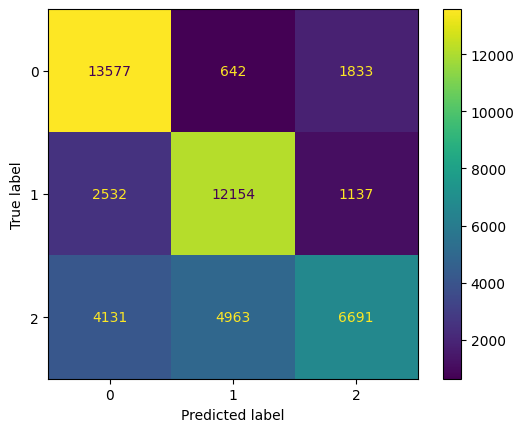

In [102]:
param_grid = {'alpha': np.linspace(0,1,6),
              'binarize': np.linspace(0,1,5),
              'fit_prior': [True,False]
             }

grid_bnb = RandomizedSearchCV(BernoulliNB(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_bnb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=lsqr; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=lsqr; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=lsqr; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=lsqr; total time=   0.0s
[CV] END alpha=0.75, fit_intercept=True, positive=True, solver=lsqr; total time=   0.0s
[CV] END alpha=0.5, fit_intercept=False, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.5, fit_intercept=False, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.5, fit_intercept=False, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.5, fit_intercept=False, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.5, fit_intercept=False, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.25, fit_intercept=False, positiv

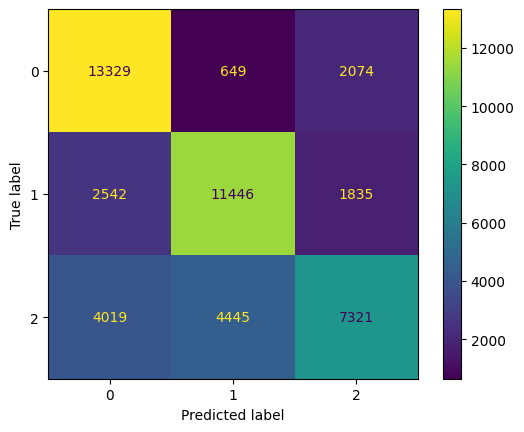

In [103]:
param_grid = {'alpha': np.linspace(0,1,5),
              'fit_intercept': [True,False],
              'positive': [True,False],
              'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid_ridge = RandomizedSearchCV(RidgeClassifier(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ridge)

## Optimized Models Performance Comparison

In [104]:
model_perfs = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   (ExtraTreeClassifier(random_state=1333397631),...  0.855896   0.855896   
1   (DecisionTreeClassifier(max_features='sqrt', r...  0.847461   0.847461   
2   VotingClassifier(estimators=[('RF', RandomFore...  0.833026   0.833026   
3   RandomizedSearchCV(cv=5, estimator=HistGradien...  0.831620   0.831620   
4   RandomizedSearchCV(estimator=LGBMClassifier(),...  0.824864   0.824864   
5   (DecisionTreeClassifier(random_state=192039009...  0.820898   0.820898   
6   XGBClassifier(base_score=None, booster=None, c...  0.812673   0.812673   
7   <catboost.core.CatBoostClassifier object at 0x...  0.807784   0.807784   
8                    HistGradientBoostingClassifier()  0.801972   0.801972   
9                                    LGBMClassifier()  0.792782   0.792782   
10  ([DecisionTreeRegressor(criterion='friedman_ms...  0.766576   0.766576   
11                             KNeighborsClassifier()  0.763533   0.763533   
12                           DecisionTreeClassifier()  0.762107   0.762107   
13  RandomizedSearchCV(cv=5, estimator=DecisionTre...  0.756504   0.756504   
14                                    MLPClassifier()  0.746412   0.746412   
15  XGBRFClassifier(base_score=None, booster=None,...  0.742258   0.742258   
16  (DecisionTreeClassifier(max_depth=1, random_st...  0.726542   0.726542   
17                                      BernoulliNB()  0.680361   0.680361   
18  RandomizedSearchCV(cv=5, estimator=BernoulliNB...  0.680277   0.680277   
19  RandomizedSearchCV(cv=5, estimator=LogisticReg...  0.678934   0.678934   
20                               LogisticRegression()  0.678053   0.678053   
21                                        LinearSVC()  0.676647   0.676647   
22                                  RidgeClassifier()  0.673542   0.673542   
23  RandomizedSearchCV(cv=5, estimator=RidgeClassi...  0.673437   0.673437   
24                                    SGDClassifier()  0.666786   0.666786   
25                                       GaussianNB()  0.637033   0.637033   
26                      PassiveAggressiveClassifier()  0.471444   0.471444   

      Recall        F1  
0   0.855896  0.855896  
1   0.847461  0.847461  
2   0.833026  0.833026  
3   0.831620  0.831620  
4   0.824864  0.824864  
5   0.820898  0.820898  
6   0.812673  0.812673  
7   0.807784  0.807784  
8   0.801972  0.801972  
9   0.792782  0.792782  
10  0.766576  0.766576  
11  0.763533  0.763533  
12  0.762107  0.762107  
13  0.756504  0.756504  
14  0.746412  0.746412  
15  0.742258  0.742258  
16  0.726542  0.726542  
17  0.680361  0.680361  
18  0.680277  0.680277  
19  0.678934  0.678934  
20  0.678053  0.678053  
21  0.676647  0.676647  
22  0.673542  0.673542  
23  0.673437  0.673437  
24  0.666786  0.666786  
25  0.637033  0.637033  
26  0.471444  0.471444

So, even after performing hyperparameter tuning, the baseline Extra Trees Classifier outperforms all other models by achieving a promising accuracy score of approximately 85.6%.

In [105]:
scores = cross_val_score(estimator=ExtraTreesClassifier(),X=X_test,y=y_test,scoring='accuracy',cv=5)
print("Average cross validation accuracy:", round(np.mean(scores),2))

Average cross validation accuracy: 0.81


In [106]:
et = ExtraTreesClassifier()
et.fit(final_X_train,y_train)

ExtraTreesClassifier()

In [107]:
print("Accuracy of Extra Trees Classifier:",accuracy_score(y_test,et.predict(final_X_test)))

Accuracy of Extra Trees Classifier: 0.8559798573227024


## Saving the best performing model for future use

In [108]:
joblib.dump(et,'model.pkl')

['model.pkl']

In [109]:
model = joblib.load('model.pkl')
model

ExtraTreesClassifier()

In [110]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [111]:
scaler = joblib.load('scaler.pkl')
scaler

StandardScaler()